# Progetto di Machine Learning 2023
Il presente notebook Python descrive si focalizza sull'applicazione di tecniche di **machine learning** per affrontare un **problema di regressione** sui **prezzi delle case**. Prima di procedere con l'implementazione dei modelli di regressione, sono state eseguite diverse fasi di **preprocessing** e **analisi dei dati** al fine di ottenere un dataset coerente e di qualità.

Successivamente, sono stati implementati vari **modelli di regressione** al fine di predire i prezzi delle case. L'obiettivo principale è identificare il modello più accurato e performante per questo specifico problema. A tal fine, sono stati adottati approcci di **feature selection** per selezionare le caratteristiche più rilevanti e ridurre la dimensionalità del dataset. Inoltre, è stata utilizzata la tecnica della **Principal Component Analysis (PCA)** per ridurre ulteriormente la complessità dei dati, mantenendo al contempo la maggior parte delle informazioni rilevanti. Infine, vengono analizzati i risultati dei diversi modelli.


Inizialmente, sono state importate delle librerie necessarie per lo svolgimento del progetto; tra i più importanti:
- **sklearn**: fornisce un ampio set di strumenti e algoritmi per la creazione, la valutazione e la messa in produzione di modelli di machine learning;
- **pandas**: utilizzata per la manipolazione e l'analisi dei dati;
- **seaborn**: utilizzata per la visualizzazione dei dati in grafici.

In [1]:
from pprint import pprint
from typing import List, Tuple, Dict, Any

import numpy as np
import pandas as pd
import seaborn as sns
import sm as sm
from sklearn.model_selection import train_test_split
from pandas import DataFrame, Series
from matplotlib import pyplot as plt

initial_training_set = pd.read_csv('../dataset/train.csv')
print(initial_training_set.shape)
print(initial_training_set.columns)

(1460, 81)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 

Osserviamo che il dataset originale ha un **numero di colonne** (features) pari a **81** e un **numero di righe** pari **1460**.
Analizzando il dataset e il file [data_description](../dataset/data_description.txt) notiamo che alcune colonne, anche se corrispondono ad un valore numerico, in realtà corrispondono ad una descrizione di quella specifica colonna; quindi, è stato necessario cambiare il tipo di queste colonne da **int** a **object**:

In [2]:
columns_to_convert = ['MSSubClass', 'YrSold', 'GarageYrBlt', 'YearRemodAdd', 'YearBuilt', 'OverallCond', 'OverallQual']
initial_training_set[columns_to_convert] = initial_training_set[columns_to_convert].astype('object')

Consideriamo solo le colonne numeriche:

In [3]:
numerical_cols = initial_training_set.select_dtypes(include='number').columns.to_list()
numerical_train = initial_training_set[numerical_cols]
print(numerical_cols)
print("Numero di colonne numeriche: ", numerical_train.columns.shape[0])

['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice']
Numero di colonne numeriche:  31


Consideriamo solo le colonne categoriche:

In [4]:
categorical_cols = initial_training_set.select_dtypes(include='object').columns.to_list()
categorical_train = initial_training_set[categorical_cols]
print(categorical_cols)
print("Numero di colonne categoriche: ", categorical_train.columns.shape[0])

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'YrSold', 'SaleType', 'SaleCondition']
Numero di colonne categoriche:  50


Osserviamo che **31 colonne** sono **numeriche** e **50 colonne** sono **categoriche**.

# 1. Data Exploration
La fase iniziale del progetto consiste nel **preprocessare** i dati raccolti, che includono informazioni sulle caratteristiche delle case e i relativi prezzi. Durante questa fase, sono state adottate diverse strategie per gestire i **dati mancanti**, **ridurre il rumore** e **standardizzare** le caratteristiche. Inoltre, sono state esplorate le **correlazioni* tra le variabili e valutata l'**importanza** di ciascuna caratteristica rispetto al target.

Sui file [valutazioneFeatures](valutazioneFeatures.ipynb) e [csv](./dataset/valutazioneFeatures.csv) si ha una visione più completa delle diverse relazioni tra tutte le features.

## 1.1 Matrice di correlazione
Una matrice di correlazione è un'importante strumento statistico utilizzato per analizzare le relazioni tra le variabili e identificare eventuali pattern o dipendenze.
La matrice di correlazione è utile nel machine learning per diverse ragioni:
- **Identificazione delle relazioni**: è utile per comprendere quali variabili sono correlate tra loro e e per fornire informazioni su come una variabile può essere influenzata dalle altre;
- **Selezione delle feature**: è utile per identificare le variabili che sono altamente correlate tra loro, e di conseguenza, ridurre la ridondanza delle feature, evitando di includere nel modello variabili che offrono informazioni simili;
- **Gestione del multicollinearità**: si verifica quando due o più variabili sono altamente correlate tra loro e potrebbero causare problemi durante la modellazione, ad esempio, aumentando la complessità del modello o rendendo i coefficienti delle variabili poco interpretabili. Quindi, è utile per identificare le variabili coinvolte nella multicollinearità e adottare le opportune strategie per gestirla, ad esempio, rimuovendo una delle variabili correlate o utilizzando tecniche di riduzione della dimensionalità come l'analisi delle componenti principali (PCA).


Dato che il numero di features è elevato, risulta difficile osservare tutta la matrice di correlazione, quindi, consideriamo solo le feature che hanno un'alta correlazione con un'altra al di sopra di una certo soglia.


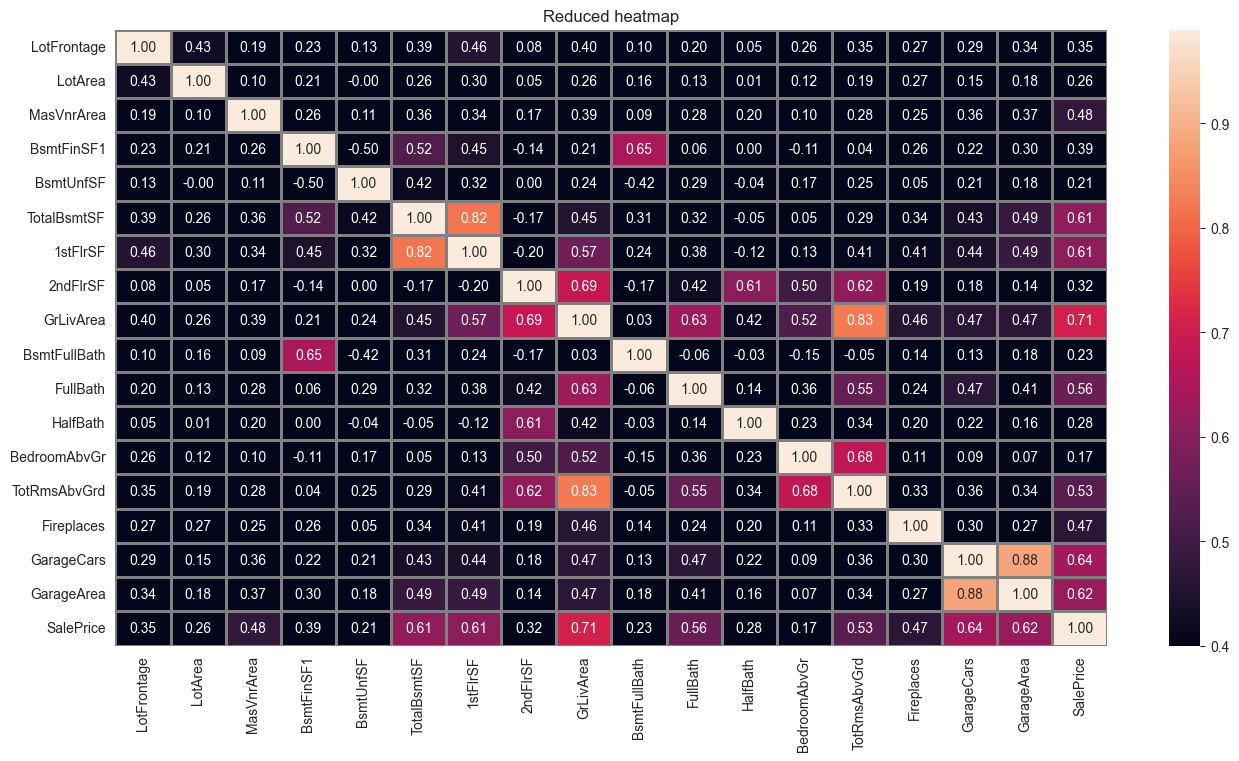

In [5]:
def correlazione_matrice(df_train: DataFrame, threshold: float, val_max: float):
    """Calcola la matrice di correlazione (ndarray) a partire da un dataframe di feature tutte numeriche"""
    corr = df_train.corr().to_numpy()
    # seleziona gli elementi che sono compresi tra il threshold e un valore massimo
    ind_x, = np.where(np.all(np.logical_or(corr < threshold, corr > val_max), axis=0))
    corr = np.delete(corr, ind_x, 1)  # si eliminano

    # stessa cosa per le righe
    ind_y, = np.where(np.all(np.logical_or(corr < threshold, corr > val_max), axis=1))
    corr = np.delete(corr, ind_y, 0)
    # si aggiornano le colonne selezionando solamente quelle filtrate

    return corr, ind_x, ind_y


def correlation_matrix_filtered_plot(df_train: DataFrame, threshold=0.6):
    # threshold: valore minimo di correlazione da considerare
    val_max = 0.99
    # si selezionano le colonne
    labels = df_train.columns
    corr, ind_x, ind_y = correlazione_matrice(df_train, threshold, val_max)
    # si aggiornano le colonne selezionando solamente quelle filtrate
    map_labels_x = [item for i, item in enumerate(labels) if i not in ind_x]
    map_labels_y = [item for i, item in enumerate(labels) if i not in ind_y]
    # plot heatmap
    plt.figure(figsize=(16, 8))
    heatmap = sns.heatmap(corr, annot=True, fmt='.2f',
                          xticklabels=map_labels_x,
                          yticklabels=map_labels_y,
                          vmin=threshold,
                          vmax=val_max,
                          linewidths=1.0,
                          linecolor="grey")

    heatmap.set_title("Reduced heatmap")
    plt.show()


correlation_matrix_filtered_plot(numerical_train, 0.4)

Analizzando la matrice di correlazone, osserviamo che le feature che hanno maggiore correlazione con un'altra sono:
- **1stFlrSF** correlata con **TotalBsmtSF** con un valore pari a 0.82;
- **TotRmsAbvGrd** correlata con **GrLivArea** con un valore pari a 0.83;
- **Garage Cars** correlata con **Garage Area** con un valori pari a 0.88.


Definiamo una classe di Correlazione per stabilire quali feature hanno un'alta correlazione sia con un'altra e sia con il target **SalePrice**. Dopo un'attenta analisi, si è deciso di considerare una correlazione **>0.6**.

In [6]:
def correlazione_dataframe(df_train, threshold, val_max):
    # si selezionano le colonne
    labels = df_train.columns

    corr, ind_x, ind_y = correlazione_matrice(df_train, threshold, val_max)
    map_labels_x = [item for i, item in enumerate(labels) if i not in ind_x]
    map_labels_y = [item for i, item in enumerate(labels) if i not in ind_y]

    return pd.DataFrame(corr, columns=map_labels_x, index=map_labels_y)


class Correlazione:
    def __init__(self, feature1, feature2, correlazione, correlazione_f1_target, correlazione_f2_target):
        self.feature1 = feature1
        self.feature2 = feature2
        self.correlazione = correlazione
        self.correlazione_f1_target = correlazione_f1_target
        self.correlazione_f2_target = correlazione_f2_target

    def __str__(self):
        return f"({self.feature1, self.feature2, self.correlazione, self.correlazione_f1_target, self.correlazione_f2_target})"

    def __repr__(self):
        return f"({self.feature1, self.feature2, self.correlazione, self.correlazione_f1_target, self.correlazione_f2_target})"

    def __gt__(self, other):
        return self.correlazione > other.correlazione

    def __lt__(self, other):
        return self.correlazione < other.correlazione


def feature_in_correlazione(corr: DataFrame, thresh: float) -> List[Correlazione]:
    colonne = corr.columns
    corr_list = []
    target_index = len(colonne) - 1
    # per ogni riga del dataframe della matrice di correlazione
    for (i, r) in enumerate(corr):
        # e per ogni colonna
        for (j, c) in enumerate(corr[r]):
            # se una coppia di feature diverse ha correlazione elevata, la aggiungiamo alla lista
            if c > thresh and i != j and colonne[i] != "SalePrice" and colonne[j] != "SalePrice":
                # calcoliamo la correlazione delle due feature con la colonna target
                corr_f1_target = corr.iloc[i, target_index]
                corr_f2_target = corr.iloc[j, target_index]
                corr_list.append(Correlazione(colonne[i], colonne[j], c, corr_f1_target, corr_f2_target))

    corr_list.sort()
    return corr_list


min_correlation = 0.6
# trasformo la matrice di correlazione di tutto il dataset in un dataframe
corr = correlazione_dataframe(numerical_train, min_correlation, 0.99)
# poi stampo la lista di feature in correlazione
feature_correlate = feature_in_correlazione(corr, min_correlation)
pprint(feature_correlate)

[(('2ndFlrSF', 'HalfBath', 0.6097073002717436, 0.31933380283206736, 0.28410767559478256)),
 (('HalfBath', '2ndFlrSF', 0.6097073002717436, 0.28410767559478256, 0.31933380283206736)),
 (('2ndFlrSF', 'TotRmsAbvGrd', 0.6164226354915431, 0.31933380283206736, 0.5337231555820284)),
 (('TotRmsAbvGrd', '2ndFlrSF', 0.6164226354915431, 0.5337231555820284, 0.31933380283206736)),
 (('GrLivArea', 'FullBath', 0.6300116462511148, 0.7086244776126515, 0.5606637627484453)),
 (('FullBath', 'GrLivArea', 0.6300116462511148, 0.5606637627484453, 0.7086244776126515)),
 (('BsmtFinSF1', 'BsmtFullBath', 0.6492117535742649, 0.3864198062421535, 0.22712223313149427)),
 (('BsmtFullBath', 'BsmtFinSF1', 0.6492117535742649, 0.22712223313149427, 0.3864198062421535)),
 (('BedroomAbvGr', 'TotRmsAbvGrd', 0.676619935742649, 0.16821315430073963, 0.5337231555820284)),
 (('TotRmsAbvGrd', 'BedroomAbvGr', 0.676619935742649, 0.5337231555820284, 0.16821315430073963)),
 (('2ndFlrSF', 'GrLivArea', 0.6875010641666033, 0.31933380283206

Analizziamo queste feature con un **diagramma di dispersione** (scatterplot) che rappresenta il metodo grafico più utilizzato in statistica descrittiva per valutare la possibile relazione tra due variabili quantitative.

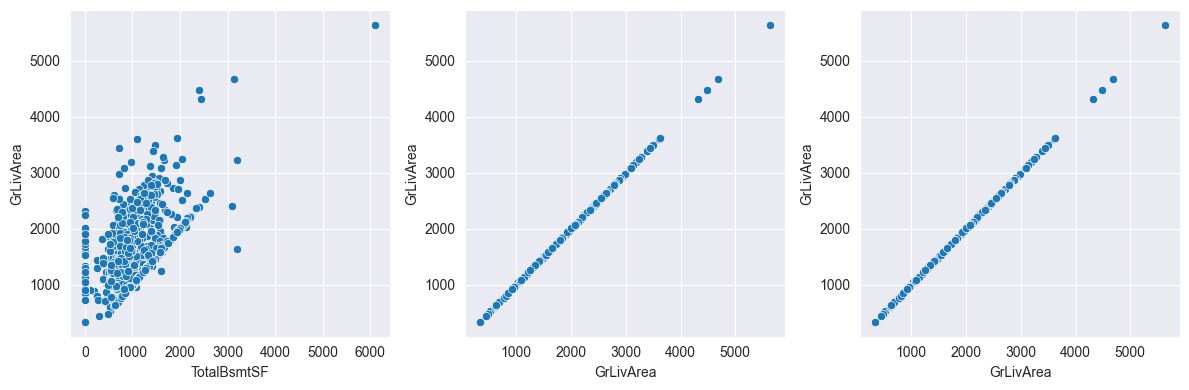

In [7]:
def scatter_plot(feature1, feature2):
    sns.scatterplot(x=feature1, y=feature2)
    plt.xlabel(feature1.name)
    plt.ylabel(feature2.name)


plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
scatter_plot(numerical_train["TotalBsmtSF"], numerical_train["GrLivArea"])
plt.subplot(1, 3, 2)
scatter_plot(numerical_train["GrLivArea"], numerical_train["GrLivArea"])
plt.subplot(1, 3, 3)
scatter_plot(numerical_train["GrLivArea"], numerical_train["GrLivArea"])
plt.tight_layout()

Tra le due feature correlate, consideriamo quella che ha una correlazione maggiore con il SalePrice, mentree l'altra verrà successivamente eliminata.

In [8]:
best_features = set()
worst_features = set()
for c in feature_correlate:
    c: Correlazione = c
    if c.correlazione_f1_target > c.correlazione_f2_target:
        best_features.add((c.feature1, c.correlazione_f1_target))
        worst_features.add(c.feature2)
    else:
        best_features.add((c.feature2, c.correlazione_f2_target))
        worst_features.add(c.feature1)

best_features_list = list(best_features)
worst_features_list = list(worst_features)
best_features_list.sort(key=lambda x: x[1], reverse=True)
pprint(best_features_list)
print("feature correlate con altre: ", worst_features_list)

[('GrLivArea', 0.7086244776126515),
 ('GarageCars', 0.6404091972583519),
 ('TotalBsmtSF', 0.6135805515591943),
 ('TotRmsAbvGrd', 0.5337231555820284),
 ('BsmtFinSF1', 0.3864198062421535),
 ('2ndFlrSF', 0.31933380283206736)]
feature correlate con altre:  ['GarageArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'FullBath', 'HalfBath', '2ndFlrSF', '1stFlrSF', 'BsmtFullBath']


Analizziamo queste feature con un **diagramma di dispersione** (scatterplot) per valutare la possibile relazione tra la feature più importanti con il valore target **SalePrice**. Consideriamo prima le colonne numeriche:


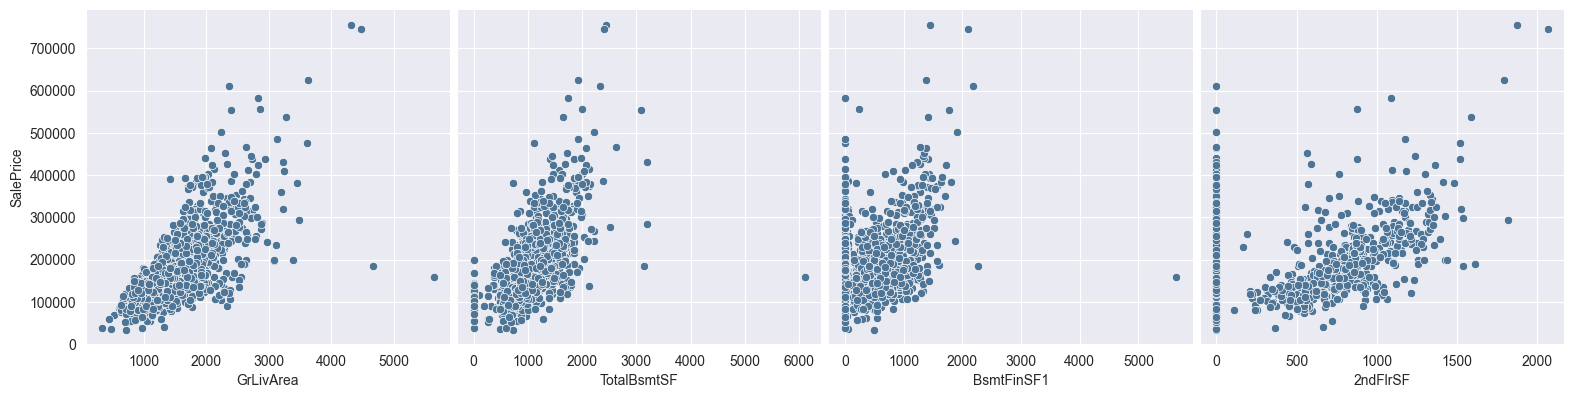

In [9]:
features_pair_plot = ['GrLivArea', 'TotalBsmtSF', 'BsmtFinSF1', '2ndFlrSF']
sns.pairplot(initial_training_set, x_vars=features_pair_plot, y_vars="SalePrice", height=4, diag_kind='kde',
             plot_kws=dict(color='xkcd:cadet blue'),
             diag_kws=dict(fill=True, alpha=.7, color='xkcd:pale orange'))

Da questi grafici, notiamo un andamento lineare; infatti, all'aumentare delle feature aumenta anche il relatio target. Inoltre, in ogni caso è possibile notare che nonostante gli elementi tengono a crescere in relazione con il target ci sono degli outliers che si comportano in modo anomalo. In seguito, per risolvere questo problemaè stata utilizzata una tecnica di normalizzazione.

Visualizziamo le colonne categoriche rispetto al valore target **SalePrice**:

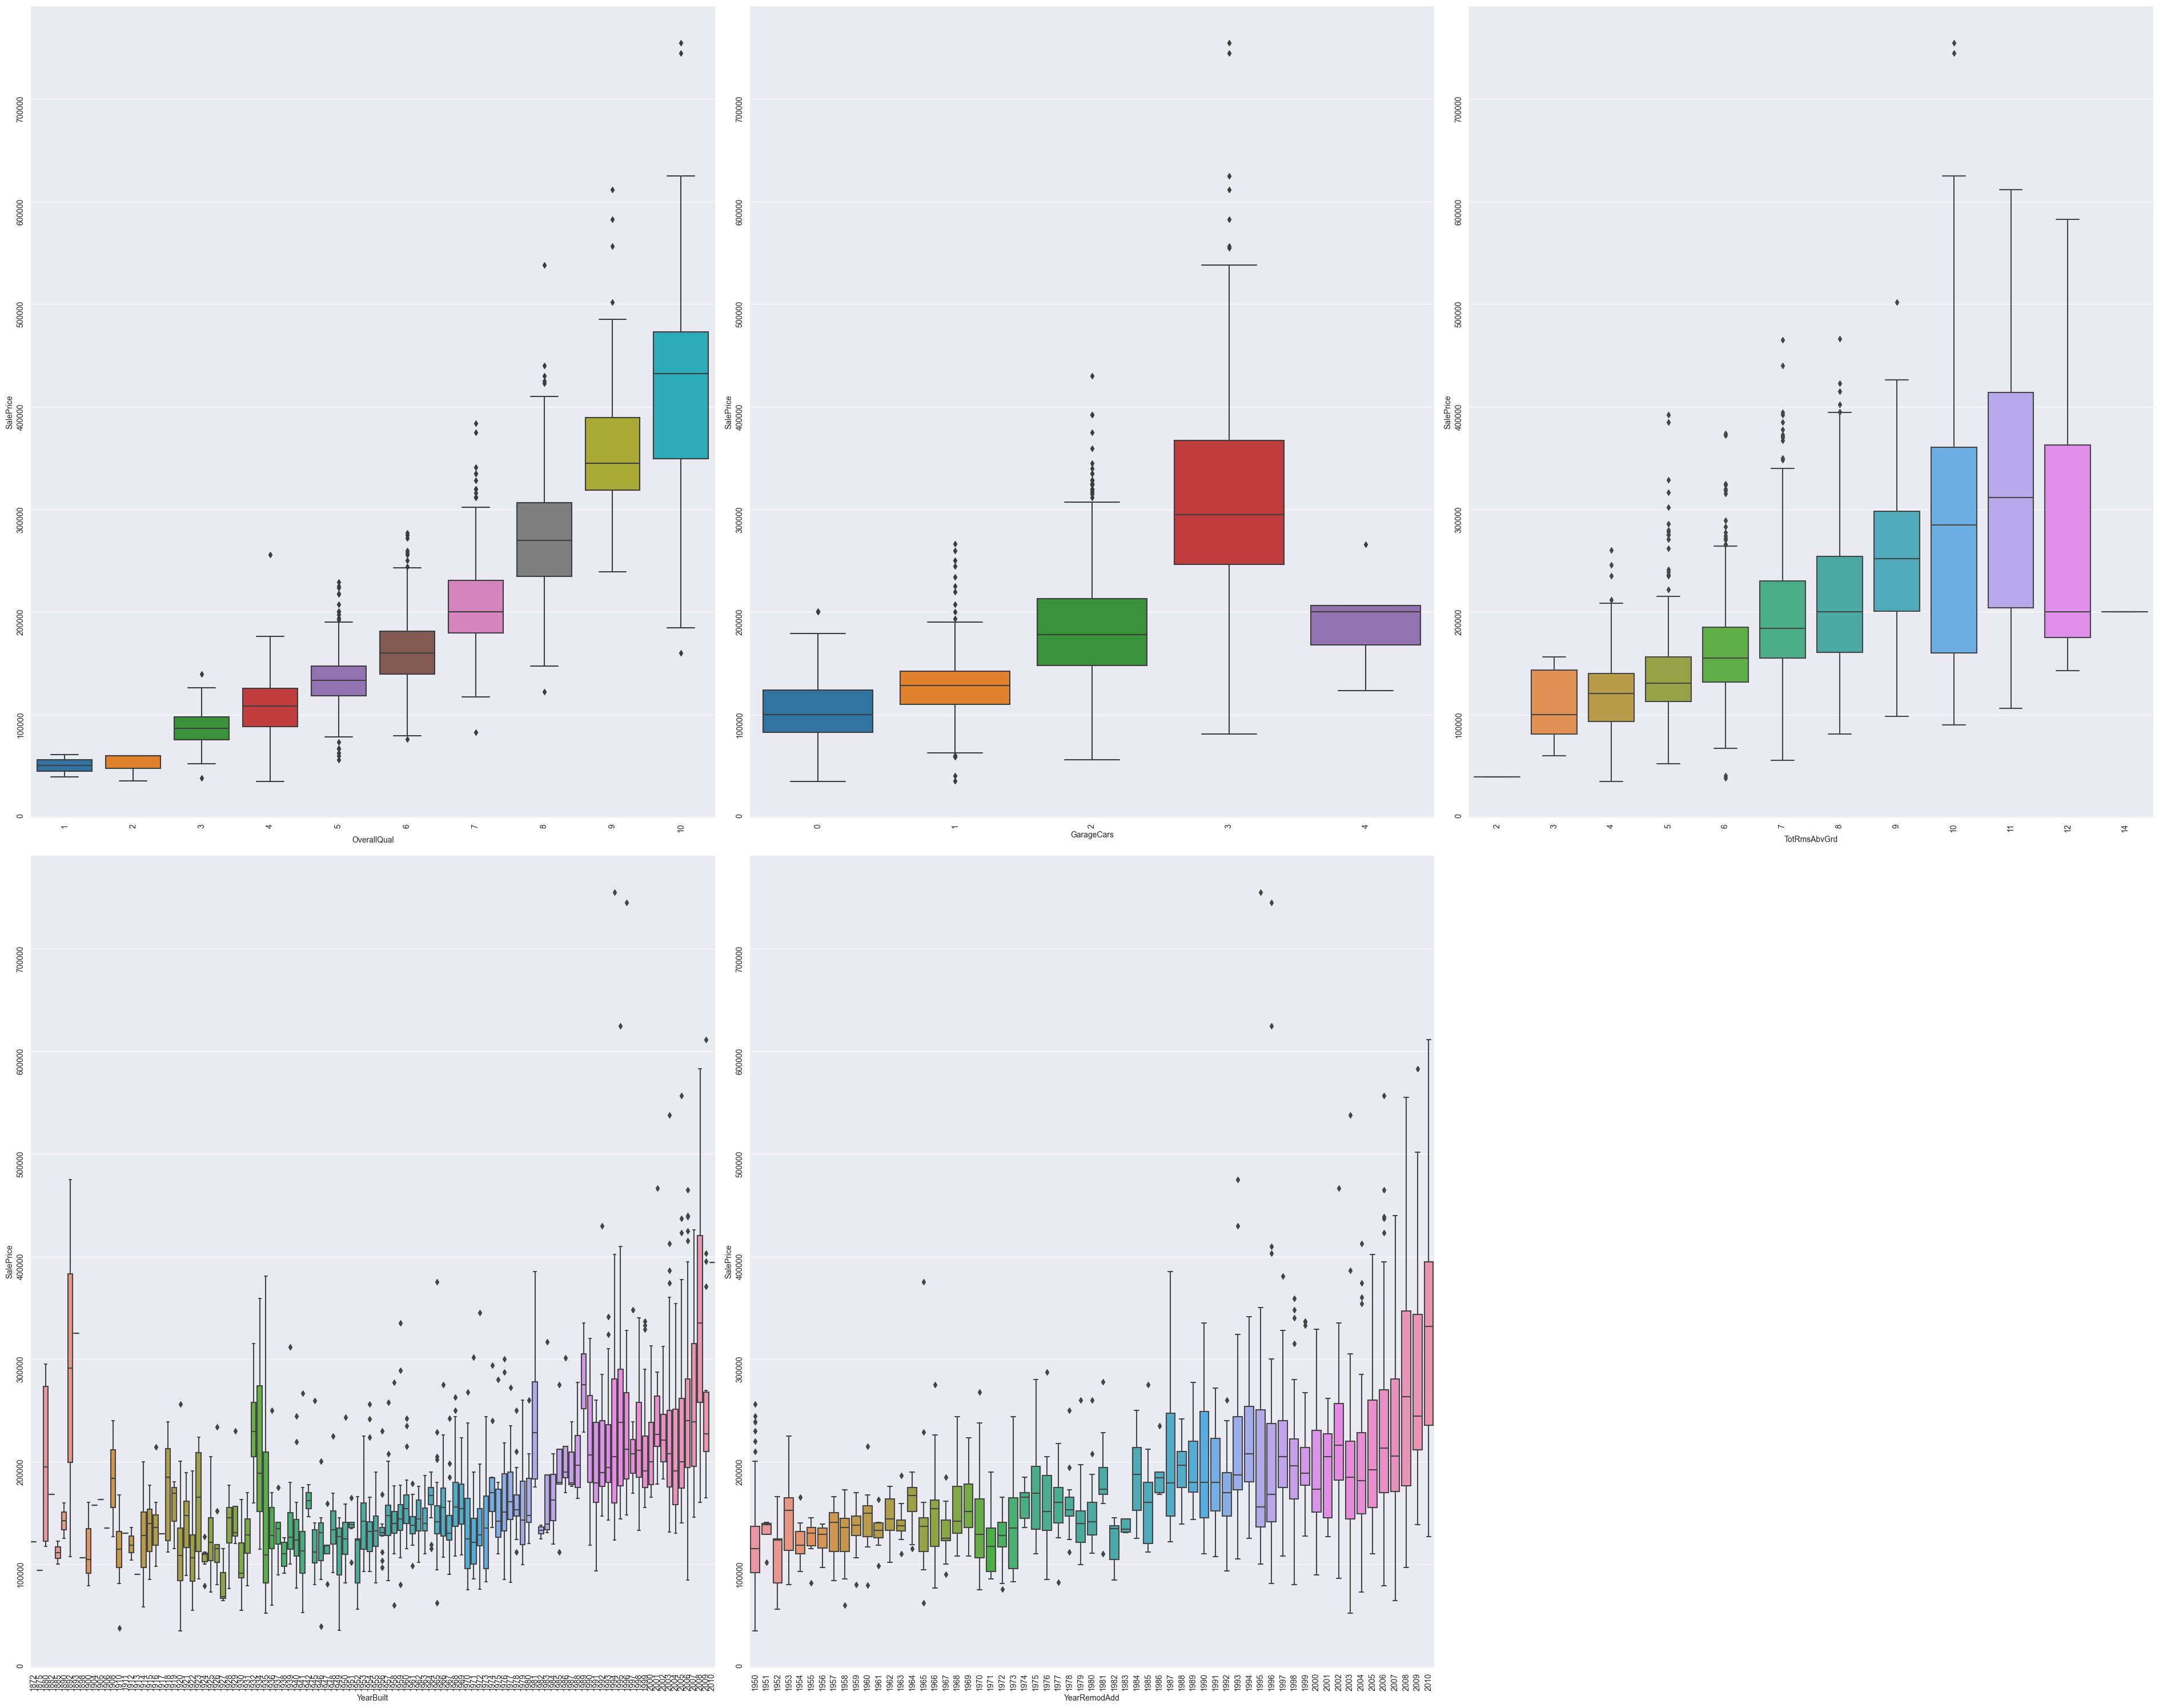

In [10]:
features_box_plot = ['OverallQual', 'GarageCars', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']

axis_x = 0
axis_y = 0
fig, axes = plt.subplots(2, 3, figsize=(38, 30))
for fbp in features_box_plot:
    f = sns.boxplot(ax=axes[axis_x, axis_y], data=initial_training_set, x=fbp, y='SalePrice')
    f.axis(ymin=0, ymax=800000)
    axes[axis_x, axis_y].tick_params(rotation=90)
    axes[axis_x, axis_y].autoscale(enable=True)
    fig.tight_layout()
    if axis_y == 2:
        axis_x = 1
        axis_y = 0
    else:
        axis_y += 1

fig.delaxes(axes[axis_x][2])

Possiamo notare che *OverallQual* influisce molto sul prezzo, infatti all'aumentare della qualità aumenta anche il valore target; infatti, la mediana di ogni plot tende ad aumentare. Sulle altre feature, la mediana non segue un andamento completamente crescente.
In ogni caso, come per le feature numeriche, si notano degli outliers per ogni feature.

## 1.2 Distribuzione normale
La **distribuzione normale**, detta anche curva Gaussiana, è senza dubbio la distribuzione più usata in statistica.
La distribuzione normale si distingue dalle altre distribuzioni di probabilità in quanto possiede le seguenti caratteristiche:
- **Simmetria**: è simmetrica o centrata rispetto al valore medio;
- **Valori centrali**: media, moda e mediana coincidono;
- **Probabilità**: dipende da due parametri: media (µ) e varianza (σ2);
- **Forma**: dipende dalla deviazione standard (σ).


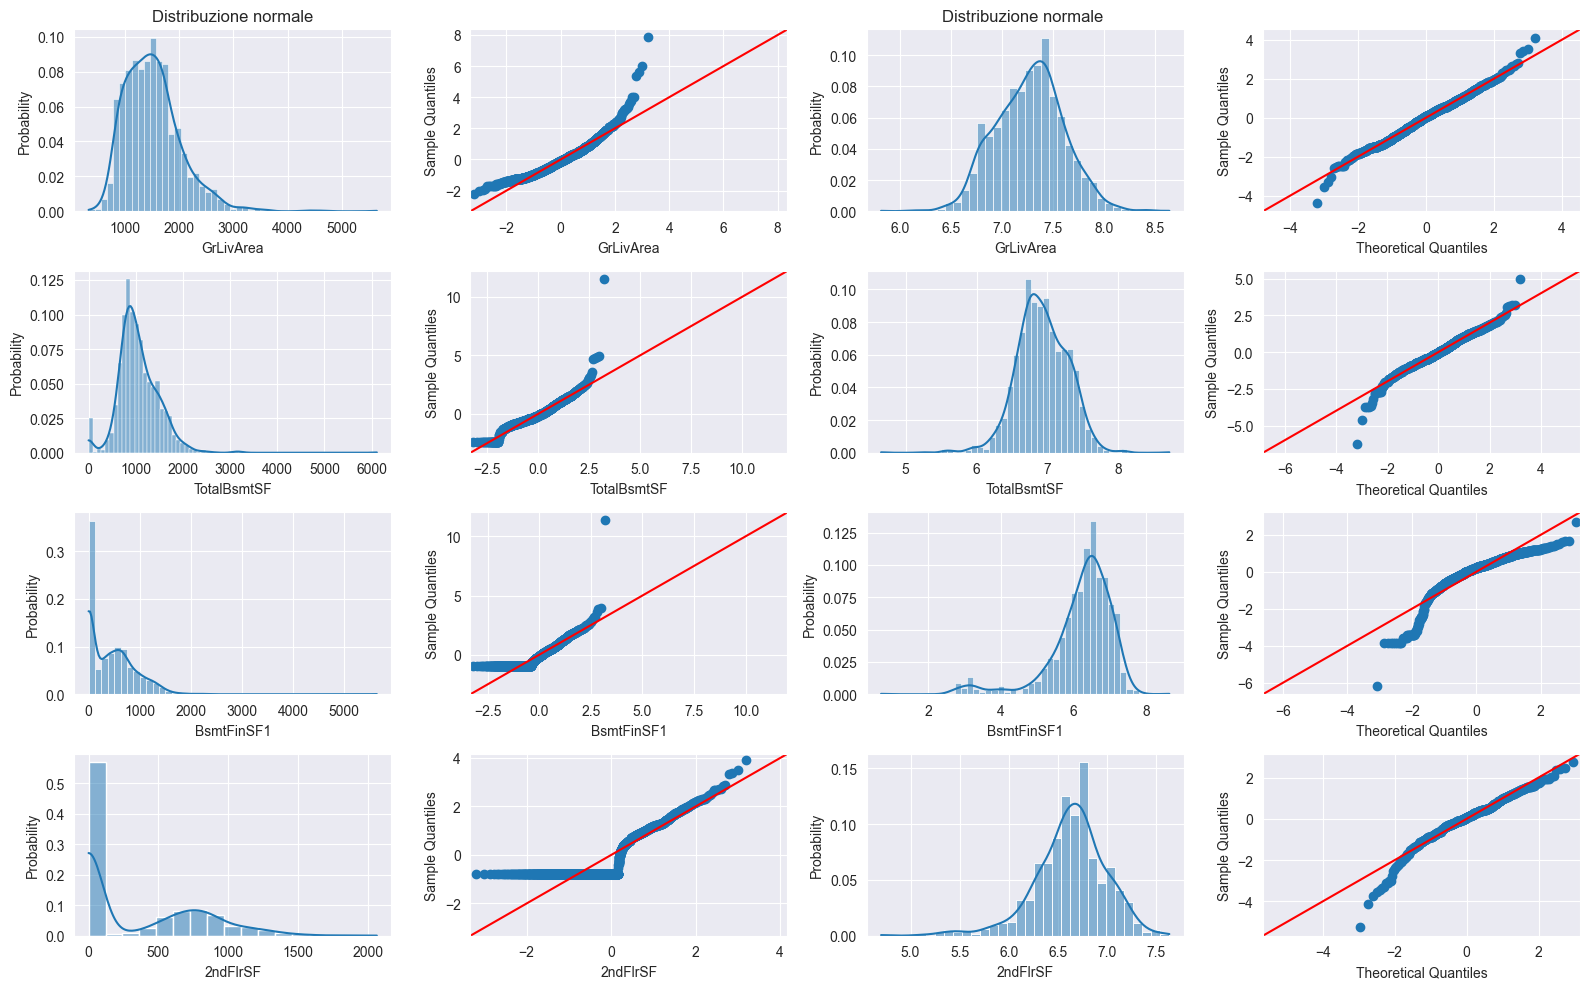

In [11]:
import statsmodels.api as sm


def distribution_plot(train_df: DataFrame, features: str):
    fig, axes = plt.subplots(features.__len__(), 4, figsize=(16, 10))
    axis = 0
    for feature in features:
        sns.histplot(ax=axes[axis, 0], data=train_df, x=feature, kde=True, stat="probability")
        sm.qqplot(ax=axes[axis, 1], data=train_df[feature], line='45', fit=True)
        # in questo caso si considerano valori > 0
        sns.histplot(ax=axes[axis, 2], data=np.log(train_df[train_df[feature] > 0][feature]),
                     kde=True, stat="probability")
        sm.qqplot(ax=axes[axis, 3], data=np.log(train_df[train_df[feature] > 0][feature]), line='45', fit=True)
        axes[0, 0].set_title("Distribuzione normale")
        axes[0, 2].set_title("Distribuzione normale ")
        axes[axis, 0].set_xlabel(feature)
        axes[axis, 1].set_xlabel(feature)
        plt.tight_layout()
        axis += 1


distribution_plot(initial_training_set, features_pair_plot)

Nelle prime figure, solo **GrLivArea** sembra avere una distribuzione normale ma non viene confermata dalla seconda figura. Mentre, dopo aver applicato la normalizzazione dei dati si nota che in tutte le feature si ottiene una distribuzione normale, infatti, possiamo notare una curva a campana e i punti tendono a seguire la retta rossa.

# 2. Data cleaning
L'obiettivo principale di questa analisi è identificare e adottare strategie efficaci per gestire i valori nulli presenti nel dataset. Inizialmente, verrà eseguita un'accurata esplorazione dei dati per individuare la presenza di valori mancanti; questa fase di esplorazione fornirà una panoramica iniziale della quantità e della natura dei valori nulli nel dataset.
Successivamente, saranno prese in considerazione diverse strategie per gestire i valori nulli.

Primo passo è individuare la **percentuale** di **valori mancanti** e provvedere alla loro **eliminazione** se sono maggiori rispetto ad una certa soglia; questa conclusione è dovuta al fatto che sostituire i valori mancanti se questi costituiscono con un'alta percentuale del dataset per una feature, potrebbe compromettere significativamente il dataset.

Il secondo passo è sostituire i valori delle colonne che hanno una piccola percentuale di valori mancanti. Questo processo, è stato realizzato in diverse modalità:
  - utilizzo della **media** per **colonne numeriche**;
  - utilizzo della **moda** per **colonne categorice**;

Una gestione adeguata dei valori mancanti contribuisce a garantire l'affidabilità e l'accuratezza dei modelli, evitando distorsioni e fornendo una base solida per le analisi successive.

Questo passaggio è necessario per il corretto funzionamento dei metodi di feature selection, feature extraction e per i modelli di machine learning che utilizzeremo.


## 2.1 Rimozione delle colonne con molti valori nulli
Visualizziamo in un grafico le feature che hanno almeno un valore nullo.

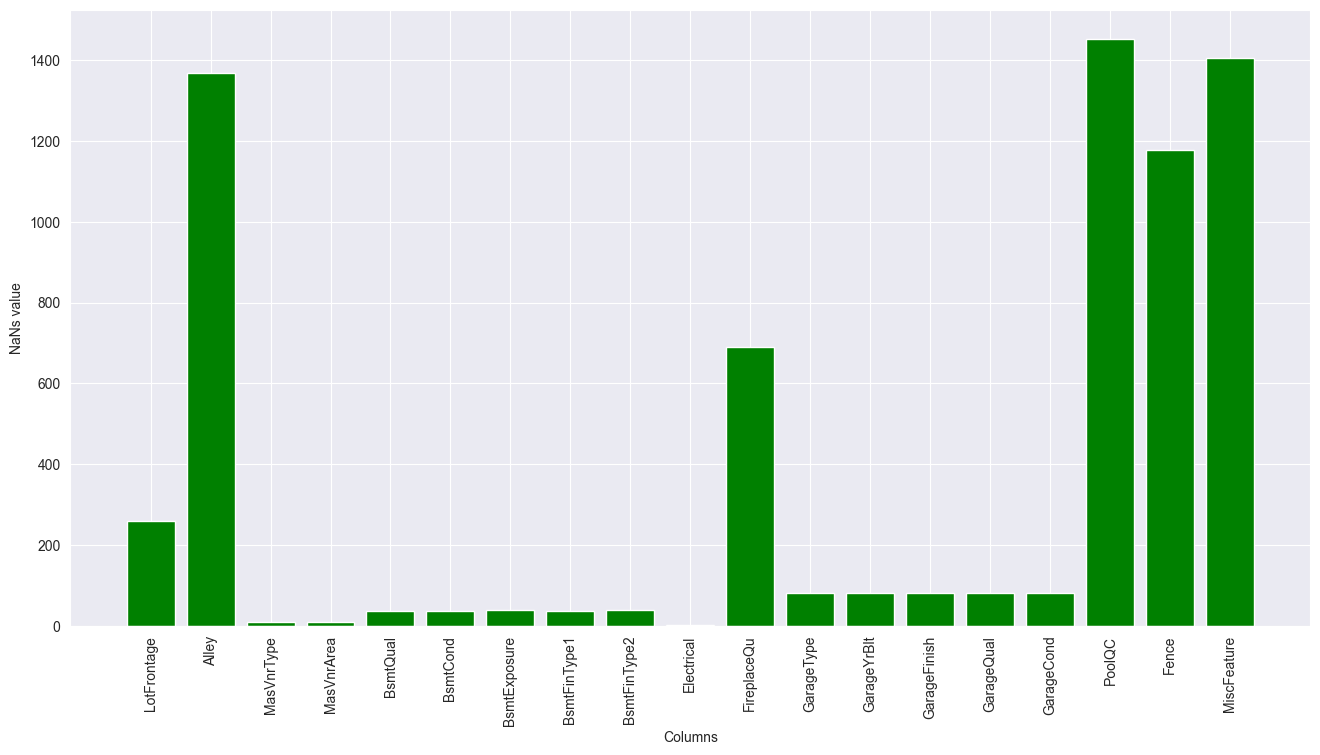

Colonne con valori nulli:  19


In [12]:
def get_nan_cols(dataset: pd.DataFrame) -> Tuple[pd.DataFrame, pd.Index]:
    """ Restituisce:
        0: un dataframe con nome colonna, numero null
        1: una lista (Index) con i nomi delle colonne che hanno valori nulli
    """
    count_nan = dataset.isnull().sum(axis=0)
    columns_with_nan_df = count_nan.loc[count_nan != 0]
    nan_cols_names = dataset.columns[dataset.isna().any()]
    return columns_with_nan_df, nan_cols_names


def get_cols_with_nan_number(dataset: pd.DataFrame):
    print("Colonne con valori nulli: ", len(get_nan_cols(dataset)[1].to_list()))


def check_nan_value(dataset):
    # Verifichiamo se ci sono valori NaN
    columns_with_nan_df, nan_cols_names = get_nan_cols(dataset)
    pd.DataFrame(data=nan_cols_names)
    plt.figure(figsize=(16, 8))
    plt.bar(nan_cols_names, columns_with_nan_df, color="green")
    plt.xlabel("Columns")
    plt.xticks(rotation=90)
    plt.ylabel("NaNs value")
    plt.show()


check_nan_value(initial_training_set)
get_cols_with_nan_number(initial_training_set)

Notiamo che ci sono 19 colonne che hanno almeno un valore nullo. In particolare, **Alley**, **PoolQC**, **Fence** e **MiscFeature** hanno più dell'85% di valori nulli, quindi provvediamo alla loro **eliminazione**.

Numero di valori non nulli minimo:  1169


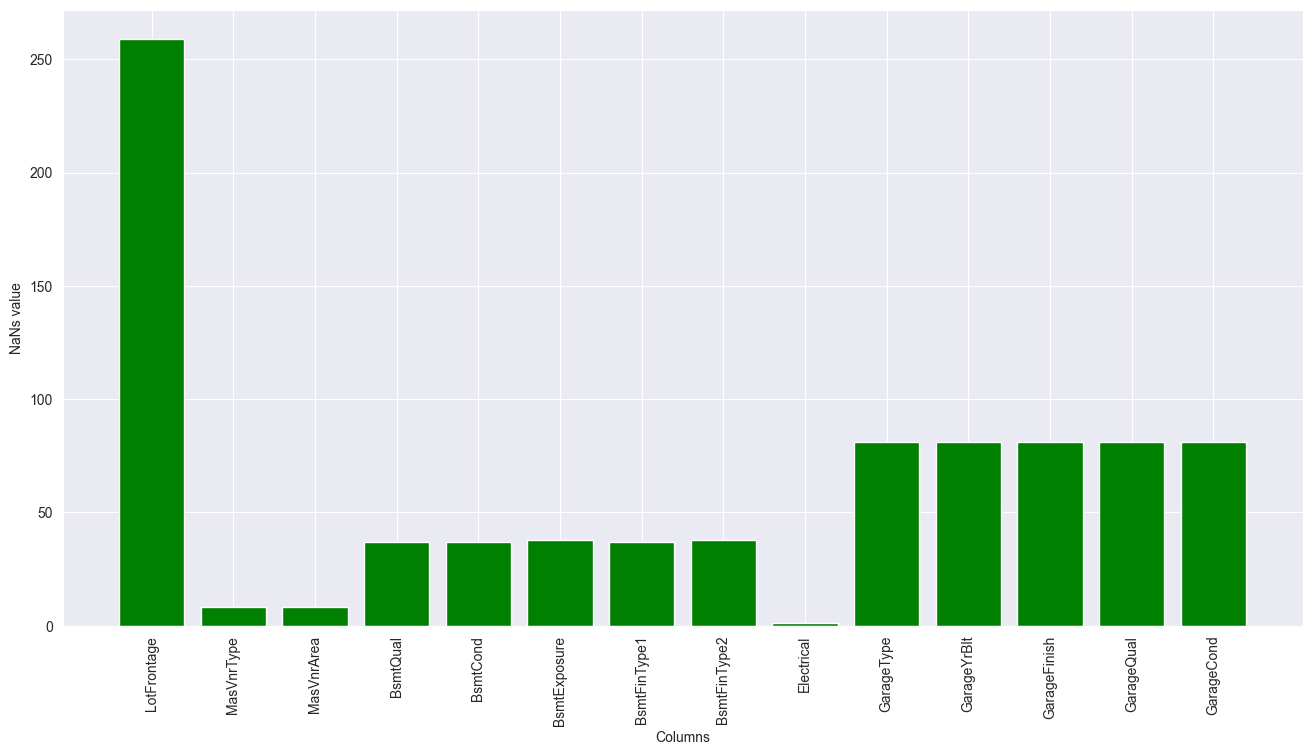

Colonne con valori nulli:  14


In [13]:
def remove_nan_columns(dataset: DataFrame, threshold=80) -> DataFrame:
    """Elimina colonne con valori NaN quando i valori Nan sono superiori a [threshold]%"""
    thresh = int((len(dataset) * threshold) / 100) + 1
    print("Numero di valori non nulli minimo: ", thresh)
    # axis: specifichiamo di eliminare solo le colonne; thresh: numero minimo per eliminare
    dataset.dropna(axis='columns', thresh=thresh, inplace=True)
    return dataset


initial_training_set2 = remove_nan_columns(initial_training_set)
check_nan_value(initial_training_set2)  # senza troppi valori nulli
get_cols_with_nan_number(initial_training_set2)

Da un numero di feature iniziali con valori mancanti pari a **19**, con l'eliminazione delle feature che hanno più dell'80% di valori nulli, si ottiene un numero di feature pari a **14**.

## 2.2 Sostituzione dei valori nulli nelle feature numeriche

Le feature numeriche sono le seguenti:


In [14]:
numerical_cols = initial_training_set2.select_dtypes(include='number').columns.to_list()
numerical_train = initial_training_set2[numerical_cols]
print(numerical_cols)

['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice']


La colonna **Id** non è necessaria, quindi la eliminiamo dal dataset.

In [15]:
if len(numerical_cols) > 0 and numerical_cols[0] == 'Id':
    del numerical_cols[0]
numerical_train = numerical_train.drop(['Id'], axis=1, errors='ignore')
initial_training_set2 = initial_training_set2.drop(['Id'], axis=1, errors='ignore')

Una volta identificate le colonne numeriche con valori mancanti, il prossimo passo consiste nel calcolare la **media** dei valori esistenti in ciascuna colonna.

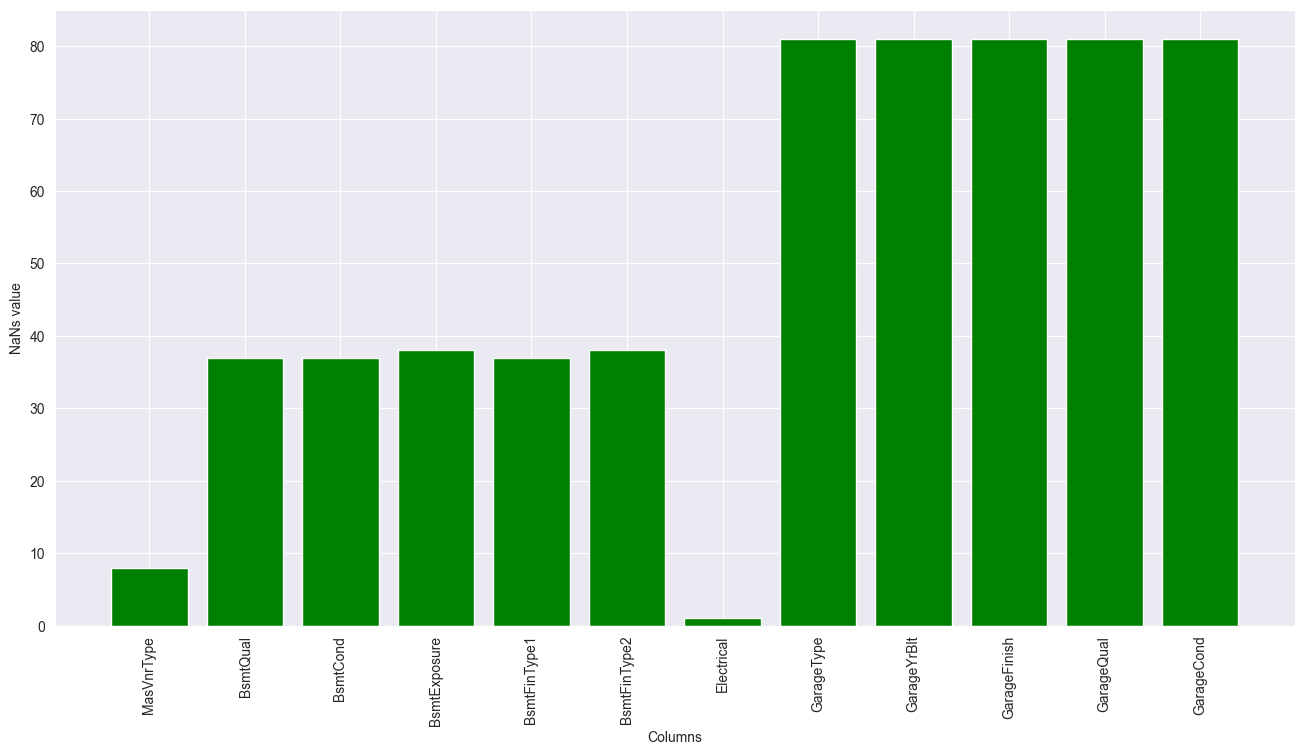

Colonne con valori nulli:  12


In [16]:
initial_training_set2 = initial_training_set2.fillna(initial_training_set2[numerical_cols].mean())
check_nan_value(initial_training_set2)  # senza troppi valori nulli
get_cols_with_nan_number(initial_training_set2)
#print(initial_training_set2)

Dopo la sostituzione dei valori mancanti sulle colonne numeriche, rimangono solo **12** colonne con valori mancanti.
Inoltre, bisogna avere per le colonne numeriche tutti lo stesso tipo; infatti, ci sono delle colonne che hanno tipo **int64** e li convertiamo in **float64**:

In [17]:
columns_float = initial_training_set2[numerical_cols].astype('int64').columns
initial_training_set2[columns_float] = initial_training_set2[columns_float].astype('float64')
print(initial_training_set2[numerical_cols].dtypes)

LotFrontage      float64
LotArea          float64
MasVnrArea       float64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
1stFlrSF         float64
2ndFlrSF         float64
LowQualFinSF     float64
GrLivArea        float64
BsmtFullBath     float64
BsmtHalfBath     float64
FullBath         float64
HalfBath         float64
BedroomAbvGr     float64
KitchenAbvGr     float64
TotRmsAbvGrd     float64
Fireplaces       float64
GarageCars       float64
GarageArea       float64
WoodDeckSF       float64
OpenPorchSF      float64
EnclosedPorch    float64
3SsnPorch        float64
ScreenPorch      float64
PoolArea         float64
MiscVal          float64
MoSold           float64
SalePrice        float64
dtype: object


## 2.3 Sostituzione dei valori nulli nelle feature categoriche

Le feature categoriche sono le seguenti:

In [18]:
categorical_cols = initial_training_set2.select_dtypes(include='object').columns.to_list()
categorical_train = initial_training_set2[categorical_cols]
print(categorical_cols)

['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'YrSold', 'SaleType', 'SaleCondition']


Una volta identificate le colonne categoriche con valori mancanti, il primo passo consiste nel calcolare la **moda** dei valori esistenti in ciascuna colonna.

In [19]:
mode = categorical_train.mode()
print(f"Valori più frequenti\n{mode.iloc[0]}\n\n")
initial_training_set2 = initial_training_set2.fillna(mode.iloc[0])
get_cols_with_nan_number(initial_training_set2)

Valori più frequenti
MSSubClass            20
MSZoning              RL
Street              Pave
LotShape             Reg
LandContour          Lvl
Utilities         AllPub
LotConfig         Inside
LandSlope            Gtl
Neighborhood       NAmes
Condition1          Norm
Condition2          Norm
BldgType            1Fam
HouseStyle        1Story
OverallQual            5
OverallCond            5
YearBuilt           2006
YearRemodAdd        1950
RoofStyle          Gable
RoofMatl         CompShg
Exterior1st      VinylSd
Exterior2nd      VinylSd
MasVnrType          None
ExterQual             TA
ExterCond             TA
Foundation         PConc
BsmtQual              TA
BsmtCond              TA
BsmtExposure          No
BsmtFinType1         Unf
BsmtFinType2         Unf
Heating             GasA
HeatingQC             Ex
CentralAir             Y
Electrical         SBrkr
KitchenQual           TA
Functional           Typ
GarageType        Attchd
GarageYrBlt       2005.0
GarageFinish         Unf
Gara

## 2.4 Rimozione delle colonne correlate
Dall'analisi effettuata precedentemente, nella matrice di correlazione ci sono coppie di feature che sono altamente correlate tra loro; quindi, per ogni coppia, eliminiamo dal dataset la feature che impatta di meno sul target rispetto all'altra.

In [20]:
print(len(initial_training_set2.columns))
initial_training_set3 = initial_training_set2.drop(columns=worst_features_list, axis=1)
print(len(initial_training_set3.columns))

75
67


Nella fase di *cleaning* del dataset, dopo aver:
   - rimosso le feature che hanno una percentuale di valori mancanti superiore all'80%;
   - sostituito i valori mancanti con la media e la moda;
   - rimosso le feature correlate,

 si ottiene un dataset con un numero di feature pari a 67.

# 2. Preprocessing
Durante la fase di **preprocessing** dei dati, è comune incontrare variabili categoriche nel dataset, ovvero variabili che rappresentano categorie o classi anziché valori numerici continui. Per utilizzare queste variabili in modelli di machine learning, è necessario convertirle in forma numerica.
Due tecniche comuni per eseguire questa trasformazione sono l'**encoding one-hot** e l'**encoding ordinale**.

La scelta tra encoding one-hot e encoding ordinale dipende dalla natura delle variabili categoriche e dal contesto del problema. Se le categorie non presentano un ordine intrinseco, è consigliabile utilizzare l'encoding one-hot per evitare di introdurre un ordine artificiale. Tuttavia, se esiste un ordine o una gerarchia tra le categorie, l'encoding ordinale può essere una scelta appropriata per catturare tali relazioni.


Inoltre, poiché diverse feature corrispondono ad anni (e.g. di costruzione, ristrutturazione, ...), si è pensato di trasformare le date in feature categoriche divise in due categorie: gli anni antecedenti al 2000 e quelli successivi. Dopodiché includiamo queste feature tra quelle di cui fare one-hot encoding, in quanto non è possibile dire con certezza se un anno di vendita o ristrutturazione è migliore rispetto a un altro in base a un ordine.

In [21]:
features_year = [
    'YrSold',
    'GarageYrBlt',
    'YearRemodAdd',
    'YearBuilt'
]

Le features che corrispondo ad **anni** sono state trasformate in range di anni, per ridurre il numero di feature dopo OneHotEncoder.

In [22]:
def trasforma_range_anni(dataset: DataFrame, features: List[str], start_year, end_year_inclusive, range_step):
    # start_range = range(1900, 2041, 20)
    # end_range = range(1920, 2041, 20)
    start_range = range(start_year, end_year_inclusive + 1, range_step)
    end_range = range(start_year + range_step, end_year_inclusive + 1, range_step)
    range_labels = []
    for i in range((end_year_inclusive - start_year) // range_step):
        range_labels.append(str(start_range[i]) + "-" + str(end_range[i]))

    for f in features:
        dataset[f] = pd.cut(dataset[f], bins=list(start_range), labels=range_labels)
    return dataset


initial_training_set4 = trasforma_range_anni(initial_training_set3, features_year, 1900, 2100, 100)
# TypeError: '<' not supported between instances of 'int' and 'str' -> Eseguire la cella prima che inizializza initial_training_set3


Successivamente, stabiliamo le colonne categoriche che vanno trasformate con l'**ordinal encoding** e quelle che vanno trasformate con l'one hot encoding, a partire dal file `valutazioneFeature.csv`.

In [23]:
# Ex,Gd,TA,Fa,Po,NA
ordinal_enc_cols = [
    #'OverallCond',
    #'OverallQual',
    "ExterQual",
    "KitchenQual",
    "ExterCond",
    "HeatingQC",
    "BsmtCond",
    "GarageCond",
    "GarageQual",
    "BsmtQual",
]

# Gd,Av,Mn,No,NA
ordinal_enc_cols1 = [
    "BsmtExposure",
]

# GLQ,ALQ,BLQ,Rec,LwQ,Unf,NA
ordinal_enc_cols2 = [
    "BsmtFinType1",
    "BsmtFinType2",
]

onehot_enc_cols = [
    'YrSold',
    'GarageYrBlt',
    'YearRemodAdd',
    'YearBuilt',
    'MSSubClass',
    "MSZoning",
    "Condition1",
    "Electrical",
    "Functional",
    "Utilities",
    "Condition2",
    "Exterior1st",
    "BldgType",
    "CentralAir",
    "Exterior2nd",
    "Heating",
    "HouseStyle",
    "RoofMatl",
    "Street",
    "LotConfig",
    "Neighborhood",
    "LandSlope",
    "Foundation",
    "LandContour",
    "MasVnrType",
    "PavedDrive",
    "RoofStyle",
    "SaleType",
    "GarageFinish",
    "GarageType",
    "LotShape",
    "SaleCondition"
]


## 3.1 Ordinal encoding
L'**encoding ordinale**  viene utilizzato quando le categorie presentano un ordine o una gerarchia intrinseca.


In [24]:
def ordinal_encoding(dataset: DataFrame, ord_enc_cols: List[str], val) -> DataFrame:
    # applica l'ordinal Encoding alle colonne categoriche che rappresentano una valutazione
    copy = dataset.copy()
    for cat in ord_enc_cols:
        if cat in dataset.columns:
            #copy[cat], _ = pd.factorize(dataset[cat])
            copy[cat] = copy[cat].map(val)

    return copy


val = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
initial_training_set5 = ordinal_encoding(initial_training_set4, ordinal_enc_cols, val)
val = {"Gd": 4, "Av": 3, "Mn": 2, "No": 1, "NA": 0}
initial_training_set5 = ordinal_encoding(initial_training_set5, ordinal_enc_cols1, val)
val = {"GLQ": 6, "ALQ": 5, "BLQ": 4, "Rec": 3, "LwQ": 2, "Unf": 1, "NA": 0}
initial_training_set5 = ordinal_encoding(initial_training_set5, ordinal_enc_cols2, val)

print("Alcune delle colonne prima e dopo l'ordinal encoding")
print(initial_training_set4[ordinal_enc_cols[:5]])
print(initial_training_set5[ordinal_enc_cols[:5]])


Alcune delle colonne prima e dopo l'ordinal encoding
     ExterQual KitchenQual ExterCond HeatingQC BsmtCond
0           Gd          Gd        TA        Ex       TA
1           TA          TA        TA        Ex       TA
2           Gd          Gd        TA        Ex       TA
3           TA          Gd        TA        Gd       Gd
4           Gd          Gd        TA        Ex       TA
...        ...         ...       ...       ...      ...
1455        TA          TA        TA        Ex       TA
1456        TA          TA        TA        TA       TA
1457        Ex          Gd        Gd        Ex       Gd
1458        TA          Gd        TA        Gd       TA
1459        Gd          TA        TA        Gd       TA

[1460 rows x 5 columns]
      ExterQual  KitchenQual  ExterCond  HeatingQC  BsmtCond
0             4            4          3          5         3
1             3            3          3          5         3
2             4            4          3          5         3
3     

## 3.2 One hot encoding
L'**encoding one-hot** è una tecnica di trasformazione che crea variabili dummy per ogni categoria presente nella variabile categorica. Queste variabili assumeranno il valore 1 se l'osservazione corrisponde alla categoria corrispondente e 0 altrimenti. Questo tipo di encoding viene utilizzato quando non esiste un'ordine intrinseco tra le categorie.

In [25]:
initial_training_set5.shape[1]

67

In [26]:
from sklearn.preprocessing import OneHotEncoder


def one_hot_encoding(dataset: DataFrame, one_hot_cols: List[str]) -> DataFrame:
    """
    Mappa le features categoriche in nuove colonne in formato one-hot
    :param dataset: self.train o self.test
    :return: il DataFrame di train o test con le stringhe trasformate in ulteriori colonne one-hot (con i nomi)
    """

    copy = dataset.copy()

    # applica il One Hot Encoding alle colonne categoriche
    onehot_encoder = OneHotEncoder(sparse_output=False)
    encoded_features = onehot_encoder.fit_transform(dataset[one_hot_cols])
    encoded_df = pd.DataFrame(encoded_features, columns=onehot_encoder.get_feature_names_out())

    #encoded_df = pd.get_dummies(dataset[one_hot_cols])
    # aggiunge il prefisso al nome delle colonne
    #prefix_dict = {col: f"{col}_{val}" for col in one_hot_cols for val in dataset[col].unique()}

    #encoded_df.add_prefix('').rename(columns=prefix_dict)

    only_non_one_hot = copy.drop(columns=one_hot_cols, axis=1)
    result_df = pd.concat([only_non_one_hot, encoded_df], axis=1)

    return result_df


initial_training_set6 = one_hot_encoding(initial_training_set5, one_hot_cols=onehot_enc_cols)
initial_training_set6.to_csv("../dataset/train_encoded.csv", index=False)
print(initial_training_set6.shape[1])

241


Notiamo che il numero di colonne è passato da 68 a 241 dopo aver effettuato ordinal encoding e one hot encoding. Quindi in seguito, sarà necessario determinare quali colonne sono più informative rispetto alla variabile target SalePrice.

# 3. Shuffle e suddivisione training - testing set
Lo **shuffle** dei dati e la **suddivisione in training e test set** sono due procedure importanti durante la fase di preparazione dei dati per l'addestramento e la valutazione di modelli di machine learning.

Quando lavoriamo con un dataset, è importante che i dati siano ordinati in modo casuale. Lo **shuffle** dei dati è importante per evitare qualsiasi tipo di ordine o struttura nei dati che potrebbe influenzare negativamente la performance del modello.

La **suddivisione dei dati in training set e test set** è essenziale per valutare l'efficacia del modello sulle nuove osservazioni non ancora viste. Il training set viene utilizzato per addestrare il modello, mentre il test set viene utilizzato per valutare le sue prestazioni su dati indipendenti. Questa suddivisione consente di stimare quanto bene il modello generalizza su dati non visti in precedenza.

In [27]:
# shuffle
initial_training_shuffle = initial_training_set6.sample(frac=1, random_state=42).reset_index(drop=True)
# split
initial_X = initial_training_shuffle.iloc[:,
            initial_training_shuffle.columns != 'SalePrice']  # tutte le colonne tranne il target
initial_y = pd.Series(initial_training_shuffle["SalePrice"], name="SalePrice")  # solo target
X_train, X_test, y_train, y_test = train_test_split(initial_X, initial_y, test_size=0.2, random_state=42)

print(f"shape train X: {X_train.shape}")
print(f"shape train y: {y_train.shape}")
print(f"shape test X: {X_test.shape}")
print(f"shape test y: {y_test.shape}")

#print(X_train)

shape train X: (1168, 240)
shape train y: (1168,)
shape test X: (292, 240)
shape test y: (292,)


Di seguito, definiamo una funzione che permette di normalizzare i dati per migliorare l'accuratezza dei modelli.

In [28]:
from sklearn.preprocessing import StandardScaler


def scale_features(X_df, y_train=None, scaler=StandardScaler()):
    if y_train is not None:
        res = scaler.fit_transform(X_df, y_train)
    else:
        res = scaler.transform(X_df)
    return pd.DataFrame(res, columns=X_df.columns)

Di seguito, definiamo una classe **Dataset** che permette di selezionare diversi dataset (e.g. normalizzato/non normalizzato, con/senza feature selection) in base alle proprie esigenze:

In [29]:
class Dataset:
    """
    Classe che definisce il nostro dataset, separato in training e testing set, 
    normalizzato o meno e con o senza feature selection. Va inizializzato con un solo fold (es. 80/20)
    """

    def __init__(self, X_train: DataFrame, y_train: Series, X_test: DataFrame, y_test: Series,
                 scaler=StandardScaler()):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.X_train_normalized = None
        self.X_test_normalized = None
        self.X_train_fs = None
        self.X_test_fs = None
        self.scaler = scaler
        self.scale_features()

    def check_ok(self, initial_size):
        return self.X_train.shape[0] + self.X_test.shape[0] == initial_size

    def scale_features(self):
        self.X_train_normalized = scale_features(self.X_train, self.scaler)
        self.X_test_normalized = scale_features(self.X_test, self.scaler)

    def num_features(self) -> int:
        return self.X_train.shape[1]


dataset = Dataset(X_train, y_train, X_test, y_test)

Di seguito, definiamo una classe **Fold** che permette di addestrare e testare su diversi split del dataset.

In [30]:
class Fold:
    def __init__(self, fold_id: int, X_train: DataFrame, y_train: Series, X_test: DataFrame, y_test: DataFrame,
                 scaler=StandardScaler()):
        self.fold_id = fold_id
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.X_train_normalized = None
        self.X_test_normalized = None
        self.X_train_normalized_fs = None
        self.X_test_normalized_fs = None
        self.scaler = scaler
        self.scale_features()

    def check_ok(self, initial_size):
        return self.X_train.shape[0] + self.X_test.shape[0] == initial_size

    def print_shapes(self):
        print(f"{self.fold_id} shape x train: {self.X_train.shape} " +
              f"{self.fold_id} shape y train: {self.y_train.shape} " +
              f"{self.fold_id} shape x test : {self.X_test.shape} " +
              f"{self.fold_id} shape y test : {self.y_test.shape}")

    def scale_features(self):
        self.X_train_normalized = scale_features(self.X_train, self.scaler)
        self.X_test_normalized = scale_features(self.X_test, self.scaler)


def split_dataset(initial_dataset_x, initial_y, splits=10) -> List[Fold]:
    lista: List[Fold] = []
    n_elements = len(initial_dataset_x)
    for split in range(splits):
        # dataset: |-1-|-2-|...|-10-|
        if split == 0:  # training: |-2-10| testing: |-1-|
            f = Fold(fold_id=split,
                     X_train=initial_dataset_x.iloc[(n_elements // splits):, :],
                     y_train=initial_y[(n_elements // splits):],
                     X_test=initial_dataset_x.iloc[:(n_elements // splits), :],
                     y_test=initial_y[:(n_elements // splits)])
            lista.append(f)
        elif split == n_elements - 1:  # training: |-1-9| testing: |-10-|
            f = Fold(fold_id=split,
                     X_train=initial_dataset_x.iloc[:split * (n_elements // splits), :],
                     y_train=initial_y[:split * (n_elements // splits)],
                     X_test=initial_dataset_x.iloc[split * (n_elements // splits):, :],
                     y_test=initial_y[split * (n_elements // splits):])
            lista.append(f)
        else:  # training: |-1-i||(i+1)-10| testing: |-i-(i+1)-|
            before_test_x = initial_dataset_x.iloc[:split * (n_elements // splits), :]
            after_test_x = initial_dataset_x.iloc[(split + 1) * (n_elements // splits):, :]

            x_train_appended: DataFrame = pd.concat([before_test_x, after_test_x])
            before_test_y = initial_y[:split * (n_elements // splits)]
            after_test_y = initial_y[(split + 1) * (n_elements // splits):]
            y_train_appended = pd.concat([before_test_y, after_test_y])

            lista.append(Fold(fold_id=split,
                              X_train=x_train_appended,
                              y_train=y_train_appended,
                              X_test=initial_dataset_x.iloc[
                                     split * (n_elements // splits):(split + 1) * (n_elements // splits), :],
                              y_test=initial_y[split * (n_elements // splits):(split + 1) * (n_elements // splits)]
                              )
                         )
    return lista


# IMPORTANTE questa variabile folds deve essere usata nel seguito al posto di X_train / y_train / X_test / y_test
folds = split_dataset(initial_X, initial_y, splits=10)

Verifichiamo la corretta suddivisione del train e split in diversi fold:

In [31]:
for i, f in enumerate(folds):
    f.print_shapes()
    # print(f.X_train)
    if not f.check_ok(len(initial_X)):
        raise "ERROR la somma delle lunghezze di train X / y e test X / y non coincide con la lunghezza iniziale"

0 shape x train: (1314, 240) 0 shape y train: (1314,) 0 shape x test : (146, 240) 0 shape y test : (146,)
1 shape x train: (1314, 240) 1 shape y train: (1314,) 1 shape x test : (146, 240) 1 shape y test : (146,)
2 shape x train: (1314, 240) 2 shape y train: (1314,) 2 shape x test : (146, 240) 2 shape y test : (146,)
3 shape x train: (1314, 240) 3 shape y train: (1314,) 3 shape x test : (146, 240) 3 shape y test : (146,)
4 shape x train: (1314, 240) 4 shape y train: (1314,) 4 shape x test : (146, 240) 4 shape y test : (146,)
5 shape x train: (1314, 240) 5 shape y train: (1314,) 5 shape x test : (146, 240) 5 shape y test : (146,)
6 shape x train: (1314, 240) 6 shape y train: (1314,) 6 shape x test : (146, 240) 6 shape y test : (146,)
7 shape x train: (1314, 240) 7 shape y train: (1314,) 7 shape x test : (146, 240) 7 shape y test : (146,)
8 shape x train: (1314, 240) 8 shape y train: (1314,) 8 shape x test : (146, 240) 8 shape y test : (146,)
9 shape x train: (1314, 240) 9 shape y train: 

# 5. Feature Selection
La **feature selection** è un'importante fase nel processo di sviluppo di un modello di machine learning. Consiste nell'identificazione e nella scelta delle caratteristiche rilevanti nel dataset che contribuiscono maggiormente alla previsione del target o all'obiettivo del modello.
- **Riduzione della complessità**: molte volte i dataset contengono un gran numero di caratteristiche o variabili che potrebbero non essere tutte informative o utili per il modello aumentando la complessità del modello e causare overfitting;
- **Miglior interpretazione**: utilizzando un numero limitato di caratteristiche significative, diventa più facile comprendere il processo di decisione del modello e interpretare i risultati;
- **Miglioramento delle prestazioni**: la selezione delle caratteristiche può contribuire a migliorare le prestazioni del modello;
- **Riduzione dei tempi di addestramento**: riducendo il numero di caratteristiche utilizzate per l'addestramento, la feature selection può anche contribuire a ridurre i tempi di addestramento del modello.

Due tecniche comuni utilizzate per la selezione delle caratteristiche sono **SelectKBest** e la **mutua informazione**. Esploriamo l'utilizzo di entrambe le tecniche:
- La tecnica **SelectKBest** si basa su misure univariate per selezionare le k caratteristiche più significative nel dataset. La selezione viene eseguita calcolando una metrica specifica per ogni caratteristica rispetto al target e le caratteristiche con i punteggi più alti vengono considerate le più informative e vengono selezionate per l'uso nel modello di machine learning;
- La **mutua informazione** è una misura statistica che valuta la dipendenza tra due variabili e viene utilizzata per misurare la relazione tra ciascuna caratteristica e il target. Maggiore è la mutua informazione tra una caratteristica e il target, maggiore è l'informazione fornita da quella caratteristica per la previsione del target; quindi, si possono identificare le variabili che contribuiscono maggiormente alla previsione del target.

L'utilizzo congiunto di SelectKBest e la mutua informazione permette di ridurre il rischio de selezionare le caratteristiche non significative e può contribuire alla riduzione del rischio di overfitting.


In [32]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression


def mutual_info_feature_selection(x_train: DataFrame, y_train: Series, k: int) -> DataFrame:
    selector = SelectKBest(mutual_info_regression, k=k)
    x_new = selector.fit_transform(x_train, y_train)
    return pd.DataFrame(x_new, columns=selector.get_feature_names_out())


def mutual_info_feature_selection_train_test(x_train: DataFrame, y_train: Series, X_test: DataFrame, k: int) -> Tuple[
    DataFrame, DataFrame]:
    x_train_fs = mutual_info_feature_selection(x_train, y_train, k)
    x_test_fs = X_test[x_train_fs.columns]
    return x_train_fs, x_test_fs


# Esempio di FS Senza normalizzazione
fs_X_train, fs_X_test = mutual_info_feature_selection_train_test(dataset.X_train, dataset.y_train, dataset.X_test, 4)
print(f"old shape = {dataset.X_train.shape} - new shape = {fs_X_train.shape}")
print("Most important feature with no normalization", fs_X_train.columns)

# Esempio di FS Con normalizzazione
fs_X_train_normalized, fs_X_test_normalized = mutual_info_feature_selection_train_test(dataset.X_train_normalized,
                                                                                       dataset.y_train, dataset.X_test,
                                                                                       4)
print(f"old shape = {dataset.X_train_normalized.shape} - new shape = {fs_X_train_normalized.shape}")
print("Most important feature with normalization", fs_X_train_normalized.columns)

old shape = (1168, 240) - new shape = (1168, 4)
Most important feature with no normalization Index(['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars'], dtype='object')
old shape = (1168, 240) - new shape = (1168, 4)
Most important feature with normalization Index(['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars'], dtype='object')


Nel considerare sia il dataset normalizzato e non, si ottengono le stesse feature che corrispondono alle feature della matrice di correlazione.

I metodi seguenti eseguono la feature selection per ogni fold, se non è stata già eseguita, e la feature selection solo su un singolo fold:

In [33]:
def do_fs_for_each_fold(folds: List[Fold], k_features, scaled=True):
    """ Esegue feature selection per ogni fold"""
    # eseguiamo la feature selection su tutti i fold e manteniamola in memoria, per ridurre il tempo di esecuzione totale
    for f in folds:
        x_train = f.X_train_normalized if scaled else f.X_train

        if f.X_train_normalized_fs is None:
            f.X_train_normalized_fs = mutual_info_feature_selection(x_train, f.y_train, k_features)
        if f.X_test_normalized_fs is None:
            f.X_test_normalized_fs = f.X_test_normalized[f.X_train_normalized_fs.columns]
    print("Feature selection... Done")
    return folds


def do_feature_selection(dataset: Dataset, k_features=129):
    """ Esegue feature selection su un singolo fold iniziale """
    if dataset.X_train_fs is None:
        dataset.X_train_fs = mutual_info_feature_selection(dataset.X_train, dataset.y_train, k_features)
    if dataset.X_test_fs is None:
        dataset.X_test_fs = dataset.X_test[dataset.X_train_fs.columns]
    print("Feature selection... Done")
    return dataset

## 5.1. Analisi delle Componenti Principali (PCA)
L'**Analisi delle Componenti Principali** (**PCA**) è una tecnica che permette di rappresentare i dati complessi in uno spazio di dimensioni inferiori, preservando al contempo la maggior parte delle informazioni rilevanti.

PCA permette la:
- **Riduzione della dimensionalità**: permette di ridurre il numero di variabili all'interno di un dataset mantenendo comunque la massima variazione possibile;
- **Identificazione delle caratteristiche principali**: fornisce una visualizzazione compatta dei dati e aiuta a identificare le caratteristiche principali o i pattern nascosti presenti nel dataset;
- **Eliminazione della correlazione tra variabili**: permette di individuare e rimuovere la correlazione tra variabili all'interno di un dataset, semplificando l'interpretazione dei dati e riducendo la possibilità di problemi legati alla multicollinearità.

Di seguito, definiamo una funzione che permette di eseguire PCA sia sul training set che sul testing set:

In [34]:
from sklearn.decomposition import PCA


def pca_reduction(x_train, y_train, x_test, n_components=4) -> Tuple[DataFrame, DataFrame]:
    """
    Esegue la feature extraction Principal Component Analysis sia sul training set che sul testing set
    n_components deve essere minore del len(x_train)
    """
    if x_train.shape[1] <= n_components:
        raise IndexError(
            "Il numero di componenti da estrarre deve essere strettamente minore del numero iniziale di features")

    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(x_train, y_train)
    X_test_pca = pca.transform(x_test)
    return pd.DataFrame(X_train_pca), pd.DataFrame(X_test_pca)

# 6. Valutazione modelli
Dopo aver preparato i dati, eseguito il preprocessing, implementato diversi modelli e applicato tecniche come la feature selection e la riduzione della dimensionalità con PCA, è arrivato il momento di valutare l'efficacia dei nostri modelli. La **valutazione dei modelli** è una fase fondamentale di ogni progetto di machine learning, in quanto ci permette di misurare le prestazioni dei nostri algoritmi e comprendere la loro capacità di generalizzazione.

Ci concentreremo sulla valutazione dei modelli di regressione utilizzati per predire i prezzi delle case. Esploreremo diverse metriche di valutazione comuni utilizzate in questo contesto e analizzeremo i risultati ottenuti dai nostri modelli. In particolare, ci concentreremo su due metriche fondamentali: l'**errore quadratico medio** (RMSE) e il **coefficiente di determinazione** (R²).

L'**errore quadratico medio** (RMSE) è una misura della discrepanza tra i valori predetti dal modello e i valori effettivi nel nostro set di dati. Un valore di RMSE più basso indica una migliore aderenza del modello ai dati osservati. Questa metrica ci permetterà di valutare la bontà di adattamento del nostro modello e confrontarlo con altri modelli implementati.

Il **coefficiente di determinazione** (R²) ci fornisce una stima dell'adattabilità del nostro modello rispetto alla variazione dei dati. Un valore di R² più vicino a 1 indica una maggiore capacità del modello di spiegare la variazione nei dati. Questa metrica ci aiuterà a valutare l'efficacia generale del nostro modello nella predizione dei prezzi delle case.

Oltre alle metriche di valutazione, esploreremo anche altre tecniche di valutazione come la **cross-validazione** e il **valore dei residui**. La **cross-validazione** ci consente di valutare le prestazioni del modello su più partizioni del nostro set di dati, fornendo una stima più affidabile delle sue capacità di generalizzazione. Il **valore dei residui** è una misura dell'errore o della discrepanza tra i valori predetti dal modello e i valori effettivi nel set di dati e rappresentano la differenza tra il valore osservato e il valore predetto per ciascuna osservazione nel set di dati.

In conclusione, la valutazione dei modelli ci fornirà una panoramica completa delle prestazioni dei nostri modelli di regressione aiutandoci a comprendere quale modello è il più adatto per il nostro problema e come possiamo migliorare ulteriormente le prestazioni del nostro sistema di predizione dei prezzi delle case.


Definiamo una classe che mantiene i parametri migliori di un modello:

In [35]:
class BestParameters:
    def __init__(self, model: str, k_feature: int, parameters: Dict[str, float], r2: float, rms: float,
                 scores: List):
        self.model = model
        self.k_feature = k_feature
        self.other = parameters
        self.r2 = r2
        self.rms = rms
        self.scores = scores
        #self.scores = list(zip(*filter(lambda s: s[1] > 0, scores)))

    def print_parameters(self):
        print(f"Model: {self.model} " +
              f"k feature: {self.k_feature} " +
              f"other: {self.other} " +
              f"r2: {self.r2} " +
              f"mse: {self.rms}")


parameters: List[BestParameters] = []

Di seguito, definiamo:
- una funzione che esegue una **cross validation sul training set**, restituendo $R^2$ e $E_{rms}$ per il training set; useremo questa funzione per i modelli semplici come la regressione lineare.
- una funzione con **GridSearch** che permette di trovare i migliori parametri di un modello. Useremo questa funzione per i modelli con diversi parametri, per trovarne la combinazione migliore
- una funzione per valutare le **prestazioni sul testing set**; utilizzeremo questa funzione per tutti i modelli, valutando le performance del miglior modello trovato finora;
- una funzione **RandomizedSearch** è una tecnica di ricerca dei parametri che viene utilizzata per trovare la combinazione ottimale di parametri per un modello di apprendimento automatico. A differenza della ricerca dei parametri convenzionale (GridSearchCV), che esamina tutte le possibili combinazioni di parametri specificate, RandomizedSearchCV esegue una ricerca casuale selezionando casualmente un sottoinsieme di combinazioni di parametri per l'addestramento e la valutazione del modello.

In [36]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# tipo alias per i modelli
Model = LinearRegression | Lasso | Ridge | ElasticNet | SVR | KNeighborsRegressor | DecisionTreeRegressor | RandomForestRegressor


def _performance_cross_validation(model: Model, x_train: DataFrame, y_train: Series) -> Tuple[float, float]:
    scores = cross_validate(model, x_train, y_train, cv=10, scoring=("r2", "neg_root_mean_squared_error"),
                            return_train_score=True)
    # r2_train = scores['train_r2'].mean()
    r2_validation_set = scores['test_r2'].mean()
    # rms_train = - scores['train_neg_root_mean_squared_error'].mean()
    rms_validation_set = - scores['test_neg_root_mean_squared_error'].mean()
    return r2_validation_set, rms_validation_set


def performance_cross_validation(model: Model, dataset: Dataset, x_train_new=None, scaled=False) -> Tuple[float, float]:
    """Esegue la cross validation del modello già istanziato (ma non fittato) sull'intero training set
    Se x_train_new non è None, scaled viene ignorato.
    returns: (r2, rms) """
    if x_train_new is not None:
        return _performance_cross_validation(model, x_train_new, dataset.y_train)
    if scaled:
        return _performance_cross_validation(model, dataset.X_train_normalized, dataset.y_train)
    else:
        return _performance_cross_validation(model, dataset.X_train, dataset.y_train)


def _performance_train(model: Model, x_train: DataFrame, y_train: Series) -> Tuple[float, float, Any]:
    """Addestra il modello sul train ed esegue la predizione su train. 
        Questo può essere utile come confronto col testing set, 
        per verificare che non ci sia overfitting o underfitting """
    model.fit(x_train, y_train)
    y_pred = model.predict(x_train)  # Attenzione, qui stiamo usando il train!!!
    r2 = r2_score(y_true=y_train, y_pred=y_pred)
    rms = np.sqrt(mean_squared_error(y_true=y_train, y_pred=y_pred))
    return r2, rms, y_pred


def performance_train(model: Model, dataset: Dataset, x_train_new=None, x_test_new=None, scaled=False) -> Tuple[
    float, float, Any]:
    if x_train_new is not None and x_test_new is not None:
        return _performance_train(model, x_train_new, dataset.y_train)
    if scaled:
        return _performance_train(model, dataset.X_train_normalized, dataset.y_train)
    else:
        return _performance_train(model, dataset.X_train, dataset.y_train)


def _performance_test(model: Model, x_train: DataFrame, x_test: DataFrame, y_train: Series, y_test: Series) -> Tuple[
    float, float, float, float, Any]:
    """Addestra il modello sul training set e poi eseguiamo la predizione su test set."""
    model.fit(x_train, y_train)  # necessario fittare il model
    y_pred_train = model.predict(x_train)
    y_pred = model.predict(x_test)
    r2_train = r2_score(y_true=y_train, y_pred=y_pred_train)
    rms_train = np.sqrt(mean_squared_error(y_true=y_train, y_pred=y_pred_train))
    r2 = r2_score(y_true=y_test, y_pred=y_pred)
    rms = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred))
    return r2_train, rms_train, r2, rms, y_pred


def performance_test(model: Model, dataset: Dataset, x_train_new=None, x_test_new=None, scaled=False) -> Tuple[
    float, float, float, float, Any]:
    """Esegue il fit del modello già istanziato (ma non fittato) sull'intero training set e 
    poi predice sul testing set, valutandone r2 e rms.
    returns: (r2, rms) """
    if x_train_new is not None and x_test_new is not None:
        return _performance_test(model, x_train_new, x_test_new, dataset.y_train, dataset.y_test)
    elif (x_train_new is not None and x_test_new is None) or (x_train_new is None and x_test_new is not None):
        raise "Impossibile eseguire performance_test senza entrambi i parametri x_train_new e x_test_new. O li passi entrambi o nessuno dei due."
    if scaled:
        return _performance_test(model, dataset.X_train_normalized, dataset.X_test_normalized, dataset.y_train,
                                 dataset.y_test)
    else:
        return _performance_test(model, dataset.X_train, dataset.X_test, dataset.y_train, dataset.y_test)


def _grid_search(model: Model, x_train: DataFrame, y_train: Series, param_grid: Dict):
    # max_features = int(dataset.X_train.shape[1] / 2)
    grid_search = GridSearchCV(model, param_grid, scoring='r2', cv=10)
    grid_search.fit(x_train, y_train)

    return grid_search.best_score_, grid_search.best_params_


def grid_search(model: Model, dataset: Dataset, param_grid: Dict, scaled=True):
    if scaled:
        return _grid_search(model, dataset.X_train_normalized, dataset.y_train, param_grid)
    else:
        return _grid_search(model, dataset.X_train, dataset.y_train, param_grid)


def _randomized_searchcv(model: Model, x_train: DataFrame, y_train: Series, params):
    random_search = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=10, cv=10)
    random_search.fit(x_train, dataset.y_train)
    return random_search.best_score_, random_search.best_params_


def randomized_searchcv(model: Model, dataset: Dataset, param_grid: Dict, scaled=True):
    if scaled:
        return _randomized_searchcv(model, dataset.X_train_normalized, dataset.y_train, param_grid)
    else:
        return _randomized_searchcv(model, dataset.X_train, dataset.y_train, param_grid)

Definiamo:
- una funzione che applica la feature selection al dataset;
- una funzione che applica la pca al dataset;
- una funzione che applica sia la feature selection che pca al dataset;
- una funzione che applica sia la cross validation sul training set e la valutazione sul testing set, dopo aver applicato feature selection e/o pca.

In [37]:
def apply_fs_and_pca(dataset: Dataset, k_fs, k_pca, scaled=False) -> Tuple[DataFrame, DataFrame]:
    X_train = dataset.X_train if not scaled else dataset.X_train_normalized
    X_test = dataset.X_test if not scaled else dataset.X_test_normalized

    # Eseguo una feature selection
    X_train_fs, X_test_fs = mutual_info_feature_selection_train_test(X_train, dataset.y_train, X_test, k_fs)
    print("Feature selezionate: ", X_train_fs.shape)

    # Applico la riduzione PCA dopo la feature selection
    X_train_fs_pca, X_test_fs_pca = pca_reduction(X_train_fs, dataset.y_train, X_test_fs, k_pca)
    print("Feature ridotte da 104 con MI e PCA: ", X_train_fs_pca.shape)
    return X_train_fs_pca, X_test_fs_pca


def apply_pca(dataset: Dataset, k_pca, scaled=False) -> Tuple[DataFrame, DataFrame]:
    X_train = dataset.X_train if not scaled else dataset.X_train_normalized
    X_test = dataset.X_test if not scaled else dataset.X_test_normalized
    X_train_pca, X_test_pca = pca_reduction(X_train, dataset.y_train, X_test, k_pca)
    print(f"Feature ridotte da {X_train.shape} con PCA: {X_train_pca.shape}")
    return X_train_pca, X_test_pca


def apply_fs(dataset: Dataset, k_fs, scaled=False) -> Tuple[DataFrame, DataFrame]:
    X_train = dataset.X_train if not scaled else dataset.X_train_normalized
    X_test = dataset.X_test if not scaled else dataset.X_test_normalized

    # Eseguo una feature selection
    X_train_fs, X_test_fs = mutual_info_feature_selection_train_test(X_train, dataset.y_train, X_test, k_fs)
    print("Feature selezionate: ", X_train_fs.shape)
    return X_train_fs, X_test_fs


def apply_fs_and_or_pca(dataset: Dataset, k_fs, k_pca, scaled=False) -> Tuple[
    DataFrame, DataFrame, DataFrame, DataFrame]:
    """Applica FS e PCA oppure solo PCA."""
    X_train_pca, X_test_pca = apply_pca(dataset, k_pca, scaled=scaled)
    X_train_fs_pca, X_test_fs_pca = apply_fs_and_pca(dataset, k_fs=k_fs, k_pca=k_pca, scaled=scaled)
    return X_train_pca, X_test_pca, X_train_fs_pca, X_test_fs_pca


def run_regression_train_test(msg, model: LinearRegression(), dataset, X_train_pca, X_test_pca, scaled=True):
    """Esegue addestramento sul train, predice sul train e sul test, stampando i risultati delle metriche e poi restituisce i valori di r2 e rms ottenuti su test"""
    r2_cv_poly_reg_d2, rms_cv_poly_reg_d2, r2_cv_poly_reg_d2_test, rms_cv_poly_reg_d2_test, y_pred = performance_test(
        model, dataset, x_train_new=X_train_pca,
        x_test_new=X_test_pca, scaled=scaled)
    print(
        f"{msg} - r2: {r2_cv_poly_reg_d2} - rms: {rms_cv_poly_reg_d2} - r2 test: {r2_cv_poly_reg_d2_test} - rms test: {rms_cv_poly_reg_d2_test}")
    return r2_cv_poly_reg_d2_test, rms_cv_poly_reg_d2_test, y_pred

Infine, definiamo:
  - una funzione che visualizzi gli score in un plot;
  - una funzione che visualizzi i residui, o **residual plot**.

In [38]:
def simple_plot_scores(x, y, label, title):
    sns.lineplot(x=x, y=y, marker='s', markersize=3.5, linewidth=1, label=label).set_title(title)


def residual_plot(y_pred: Series, y_test: Series, title: str):
    """E' un grafico che mostra la differenza tra i valori previsti dal modello e i valori reali del dataset di test. In questo modo è possibile verificare se il modello ha una buona capacità predittiva e se ci sono eventuali pattern nei dati che non sono stati catturati dal modello"""
    mm = min(y_pred)
    mx = max(y_pred)
    fig = plt.figure(figsize=(16, 8))
    fig.gca()
    plt.scatter(y_pred, (y_pred - y_test), c='xkcd:goldenrod', edgecolor='white', label='Train')
    plt.xlabel(r'Valori predetti ($y_i$)')
    plt.ylabel(r'Residui ($y_i-t_i$)')
    plt.hlines(y=0, xmin=(int(mm) / 10) * 10, xmax=(int(mx) / 10) * 10 + 10, color='xkcd:sea blue', lw=2)
    plt.tight_layout()
    plt.title('Grafico dei Residui - ' + title)
    plt.show()


## 6.1 Regressione Lineare
L'obiettivo della **regressione lineare** è quello di trovare il miglior iperpiano lineare che rappresenti la relazione tra le feature e il target. Questo iperpiano viene poi utilizzato per prevedere o stimare il valore del target dato un nuovo vettore di features.

La regressione lineare consiste nel fare una **combinazione lineare** delle feature di input $\bold{x}$ con i parametri che definiscono l'iperpiano:

$$y(\bold{x},\bold{w})=w_0+w_1x_1+...+w_dx_d = \sum_{j=0}^d w_j\bar{x}_j=\bold{w}^T \bold{\bar{x}}$$

con $\bold{\bar{x}}=(1,x_1,...,x_n)$.

Per ricavare i migliori coefficienti della regressione lineare, viene utilizzato il metodo dei minimi quadrati, che consiste nel minimizzare la somma delle funzioni Loss quadratica. La funzione **Loss quadratica** è la seguente:

$$ L(\bold{w}, \bold{x}_i,t_i) = (y(x_i,\bold{w}) - t_i)^2$$

La **somma dei minimi quadrati** è data da:

$$ E(\bold{w}) = \frac{1}{2} \sum_{i=1}^n L(\bold{w}, \bold{x}_i,t_i) $$

Esiste una formula in forma chiusa che fornisce la soluzione al metodo dei quadrati, ovvero i coefficienti migliori per la retta di regressione (senza considerare le funzioni base):

$$ \bold{w}^* = (X^TX)^{-1}X^T\bold{t}$$

È importante notare che la regressione lineare assume una relazione lineare tra le variabili coinvolte, ma ciò potrebbe non essere sufficiente per rappresentare in modo appropriato il nostro dataset.

### 6.1.1 Performance regressione lineare

Valutiamo le perfomance sul testing set:

In [39]:
r2_train, rms_train, r2_linear_regression, rms_linear_regression, y_pred = performance_test(LinearRegression(), dataset)
print(
    f"Linear Regression (no normalization) -> r2 train: {r2_train}, rms train: {rms_train}, r2 mean: {r2_linear_regression} - rms mean: {rms_linear_regression} ")

r2_train_norm, rms_train_norm, r2_linear_regression_norm, rms_linear_regression_norm, y_pred_linear = performance_test(
    LinearRegression(), dataset, scaled=True)
print(
    f"Linear Regression (with normalization) -> r2 train: {r2_train_norm}, rms train: {rms_train_norm}, r2 mean: {r2_linear_regression_norm} - rms mean: {rms_linear_regression_norm} ")

res_linear_regression = BestParameters("Linear Regression (no normalization) ", 220, None, r2_linear_regression,
                                       rms_linear_regression, [])
parameters.append(res_linear_regression)
res_linear_regression_norm = BestParameters("Linear Regression (with normalization)", 220, None,
                                            r2_linear_regression_norm, rms_linear_regression_norm, [])
parameters.append(res_linear_regression_norm)


Linear Regression (no normalization) -> r2 train: 0.9205838944915007, rms train: 22804.683066512825, r2 mean: 0.8527010493858294 - rms mean: 28032.25172584567 
Linear Regression (with normalization) -> r2 train: 0.9205838920233675, rms train: 22804.683420880443, r2 mean: -6.303629370391284e+19 - rms mean: 579900513294899.5 


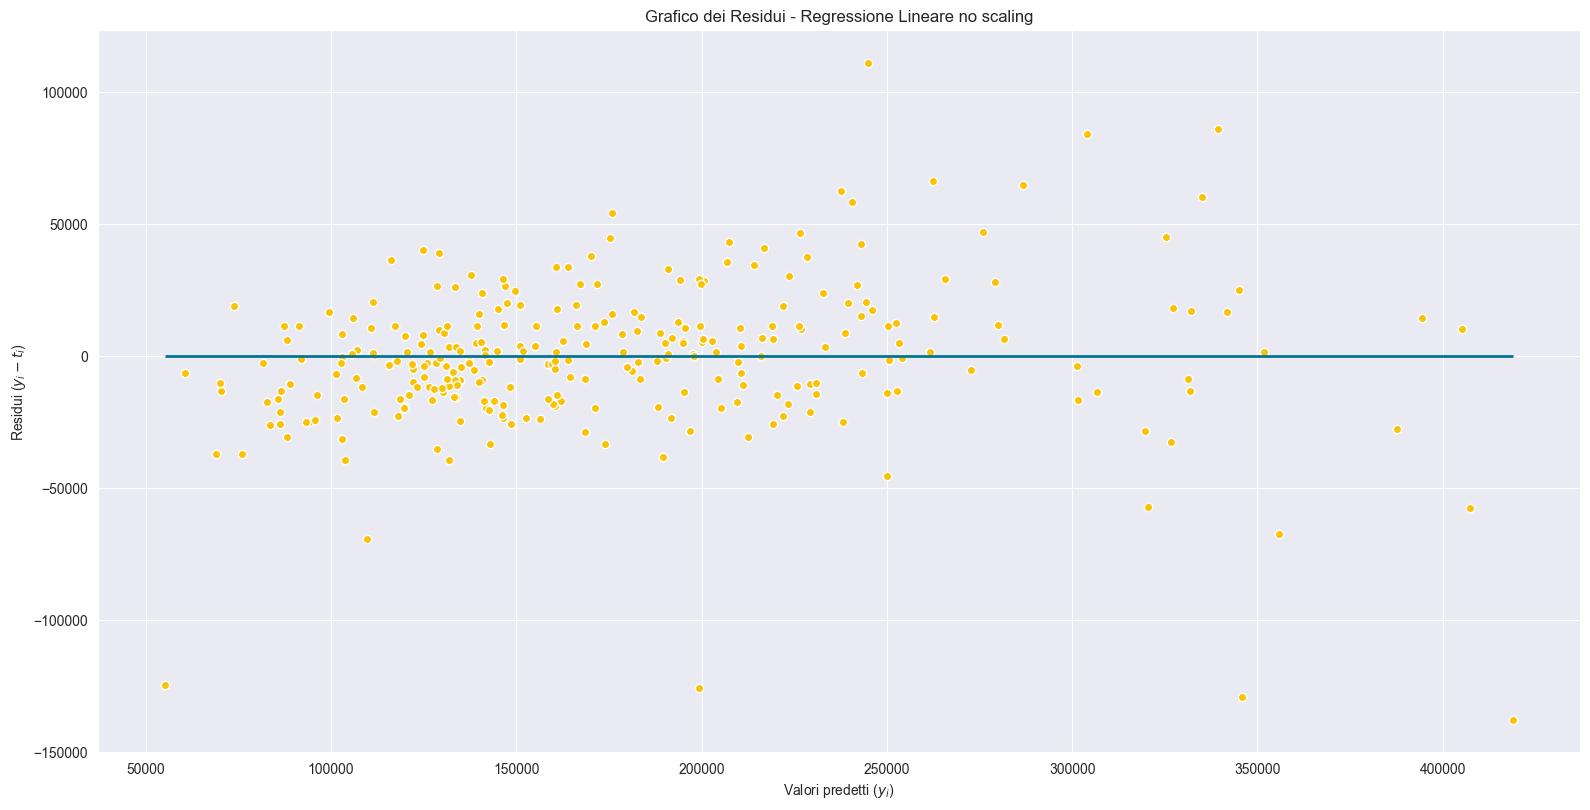

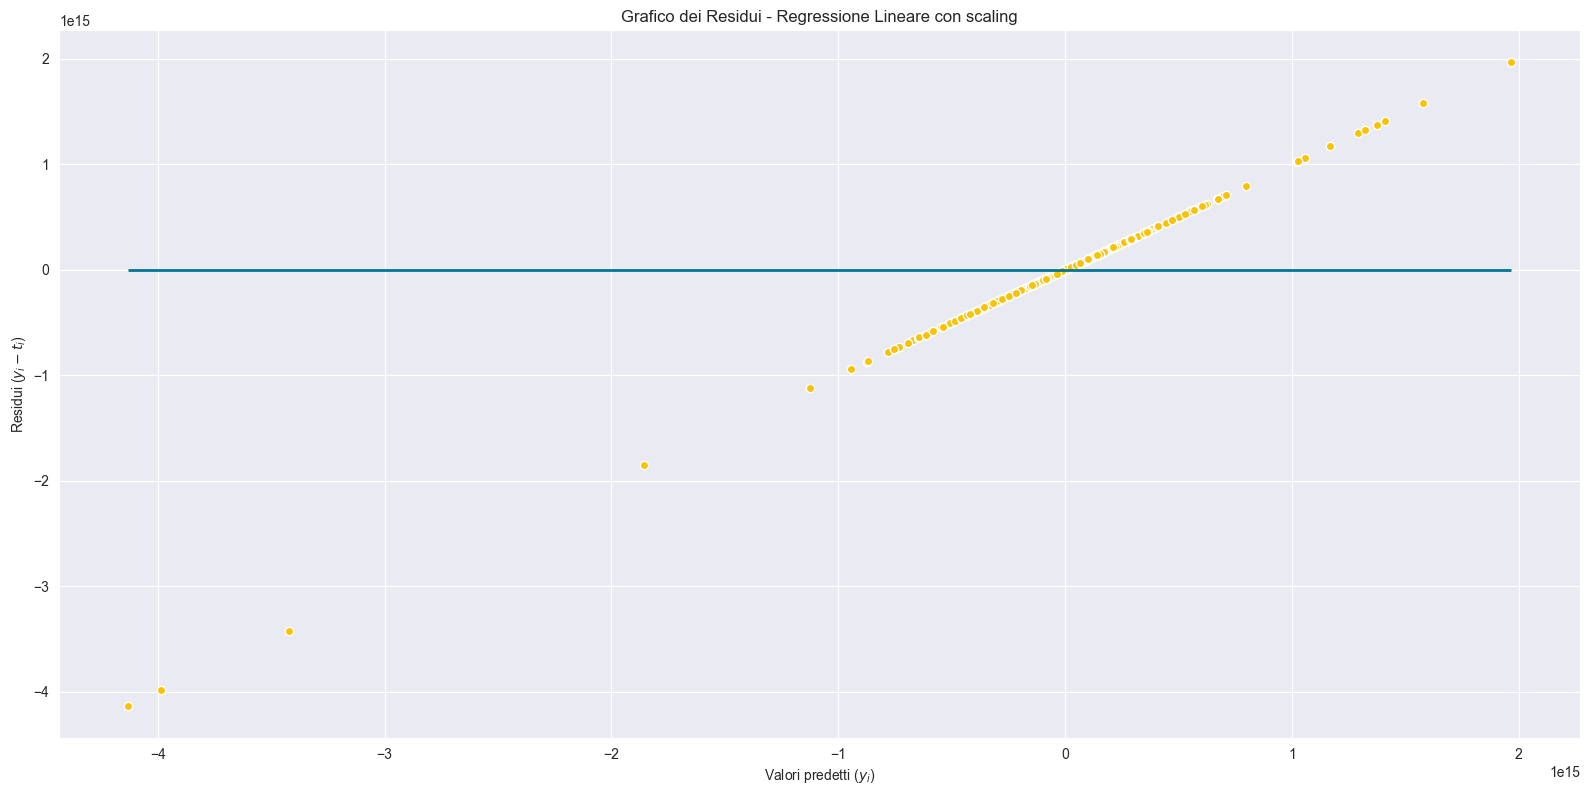

In [40]:
residual_plot(y_pred, dataset.y_test, 'Regressione Lineare no scaling')
residual_plot(y_pred_linear, dataset.y_test, 'Regressione Lineare con scaling')

### 6.1.3 Performance test con scaling, PCA e con/senza FS
Valutiamo il modello effettuando prima **PCA** e con/senza **feature selection**.
Valutiamo prima con n dataset non normalizzatto:

In [41]:
scaled = False

X_train_pca, X_test_pca, X_train_fs_pca, X_test_fs_pca = apply_fs_and_or_pca(dataset, k_fs=40, k_pca=10, scaled=scaled)
score1, rms1, y_pred_pca_linear = run_regression_train_test("linear normalized with PCA", LinearRegression(), dataset,
                                                            X_train_pca, X_test_pca,
                                                            scaled=scaled)
score2, rms2, y_pred_fs_pca_linear = run_regression_train_test("linear normalized with FS and PCA", LinearRegression(),
                                                               dataset, X_train_fs_pca,
                                                               X_test_fs_pca, scaled=scaled)

# migliore score2
res_linear_regression = BestParameters("Linear with PCA", 220, None, score1, rms1, [])
parameters.append(res_linear_regression)
res_linear_regression_fs_pca = BestParameters("Linear with FS and PCA", 220, None, score2, rms2, [])
parameters.append(res_linear_regression_fs_pca)


Feature ridotte da (1168, 240) con PCA: (1168, 10)
Feature selezionate:  (1168, 40)
Feature ridotte da 104 con MI e PCA:  (1168, 10)
linear normalized with PCA - r2: 0.6510543951300043 - rms: 47802.28031261882 - r2 test: 0.6753141819902245 - rms test: 41618.82527188563
linear normalized with FS and PCA - r2: 0.763816744454674 - rms: 39327.3153189775 - r2 test: 0.7738466359320026 - rms test: 34734.39063053949


Per la regressione lineare si ottengono risultati migliori se non si utilizza la normalizzazione dei dati e si considerano tutte le feature sel training set (r2=0.86).

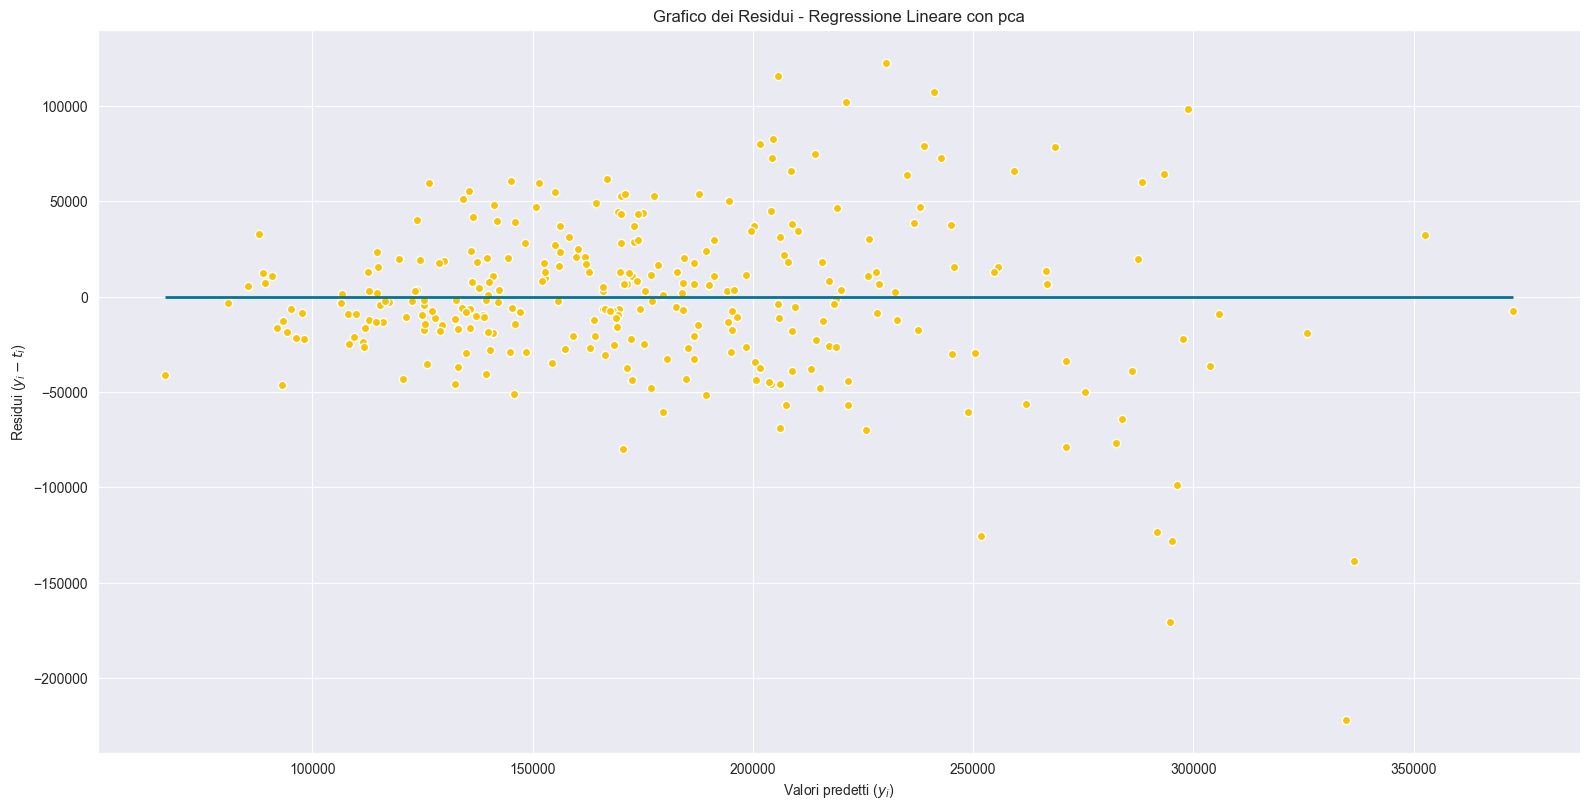

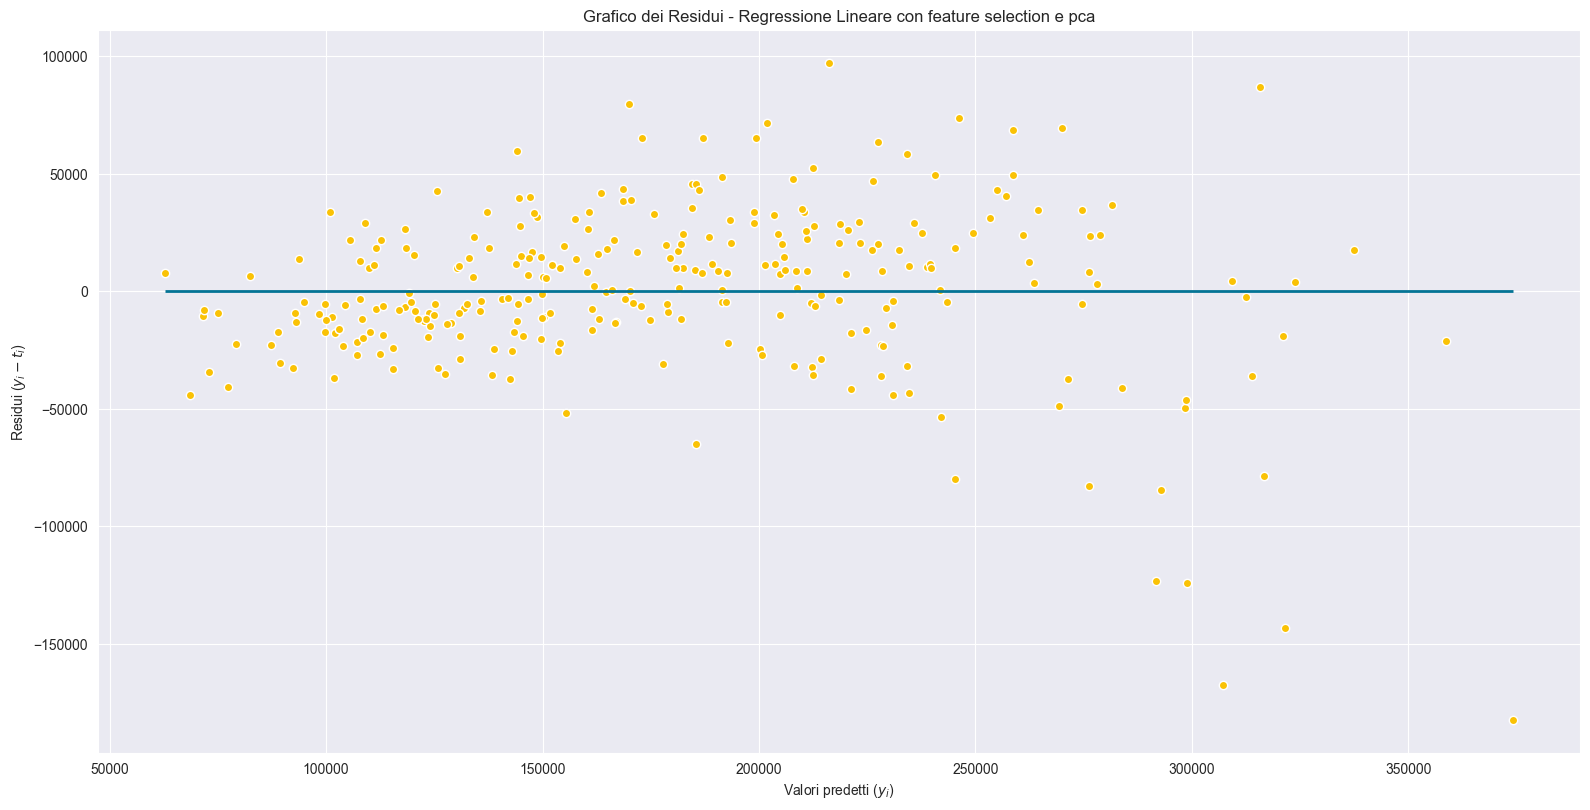

In [42]:
residual_plot(y_pred_pca_linear, dataset.y_test, 'Regressione Lineare con pca')
residual_plot(y_pred_fs_pca_linear, dataset.y_test, 'Regressione Lineare con feature selection e pca')

Valutiamo con un dataset normalizzato:

In [43]:
scaled = True

X_train_pca, X_test_pca, X_train_fs_pca, X_test_fs_pca = apply_fs_and_or_pca(dataset, k_fs=40, k_pca=10, scaled=scaled)
score1, rms1, y_pred_pca_linear = run_regression_train_test("linear normalized with PCA", LinearRegression(), dataset,
                                                            X_train_pca, X_test_pca,
                                                            scaled=scaled)
score2, rms2, y_pred_fs_pca_linear = run_regression_train_test("linear normalized with FS and PCA", LinearRegression(),
                                                               dataset, X_train_fs_pca,
                                                               X_test_fs_pca, scaled=scaled)

# migliore score2
res_linear_regression = BestParameters("Linear normalized with PCA", 220, None, score1, rms1, [])
parameters.append(res_linear_regression)
res_linear_regression_fs_pca = BestParameters("Linear normalized with FS and PCA", 220, None, score2, rms2, [])
parameters.append(res_linear_regression_fs_pca)

Feature ridotte da (1168, 240) con PCA: (1168, 10)
Feature selezionate:  (1168, 40)
Feature ridotte da 104 con MI e PCA:  (1168, 10)
linear normalized with PCA - r2: 0.7498973986891795 - rms: 40469.59445908364 - r2 test: 0.7890941523124609 - rms test: 33543.04375267293
linear normalized with FS and PCA - r2: 0.7769158658294226 - rms: 38221.17993007405 - r2 test: 0.8224827718040364 - rms test: 30773.607621847732


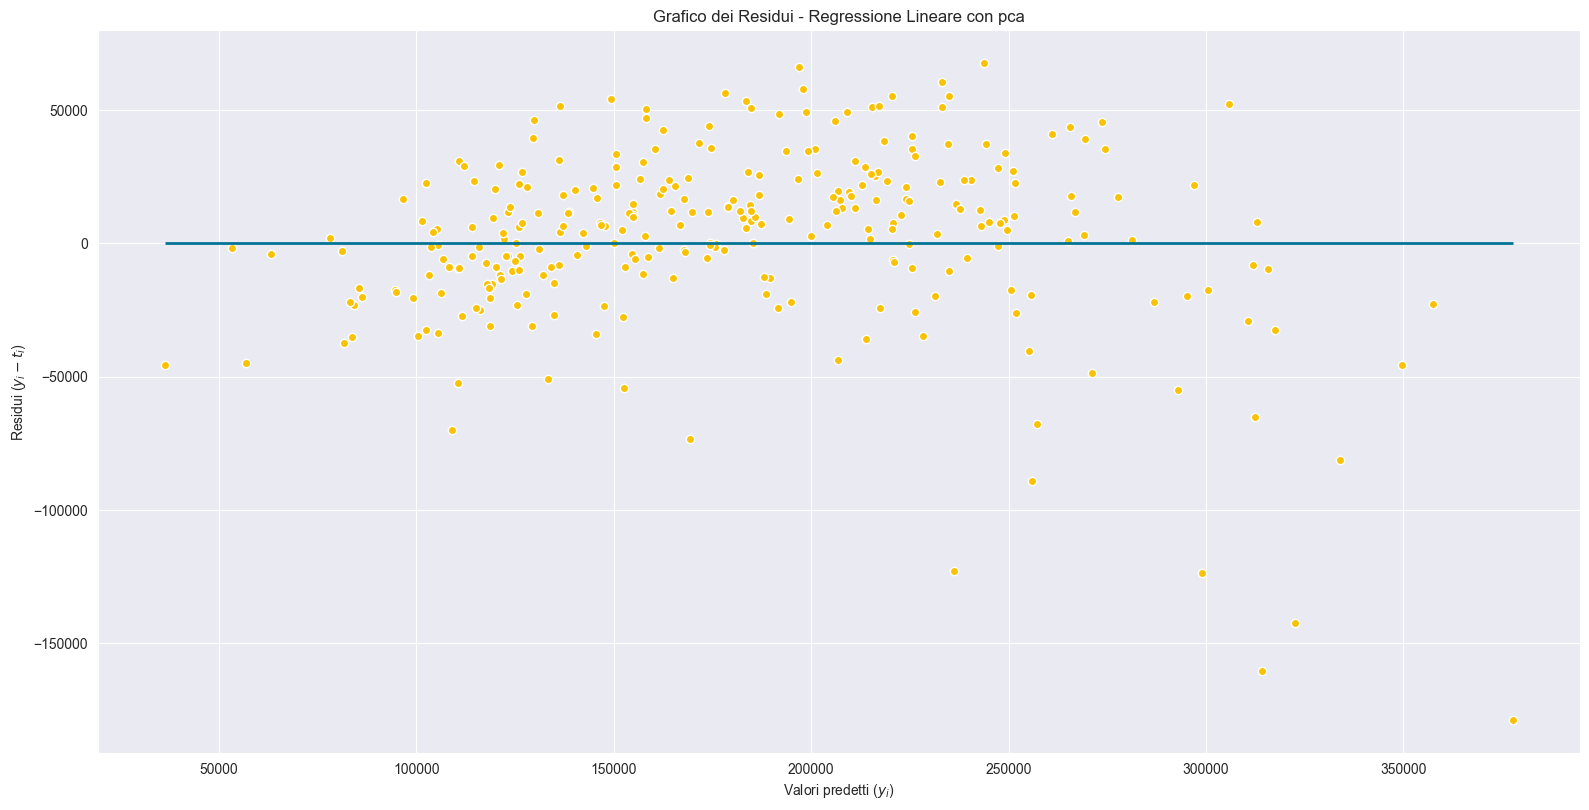

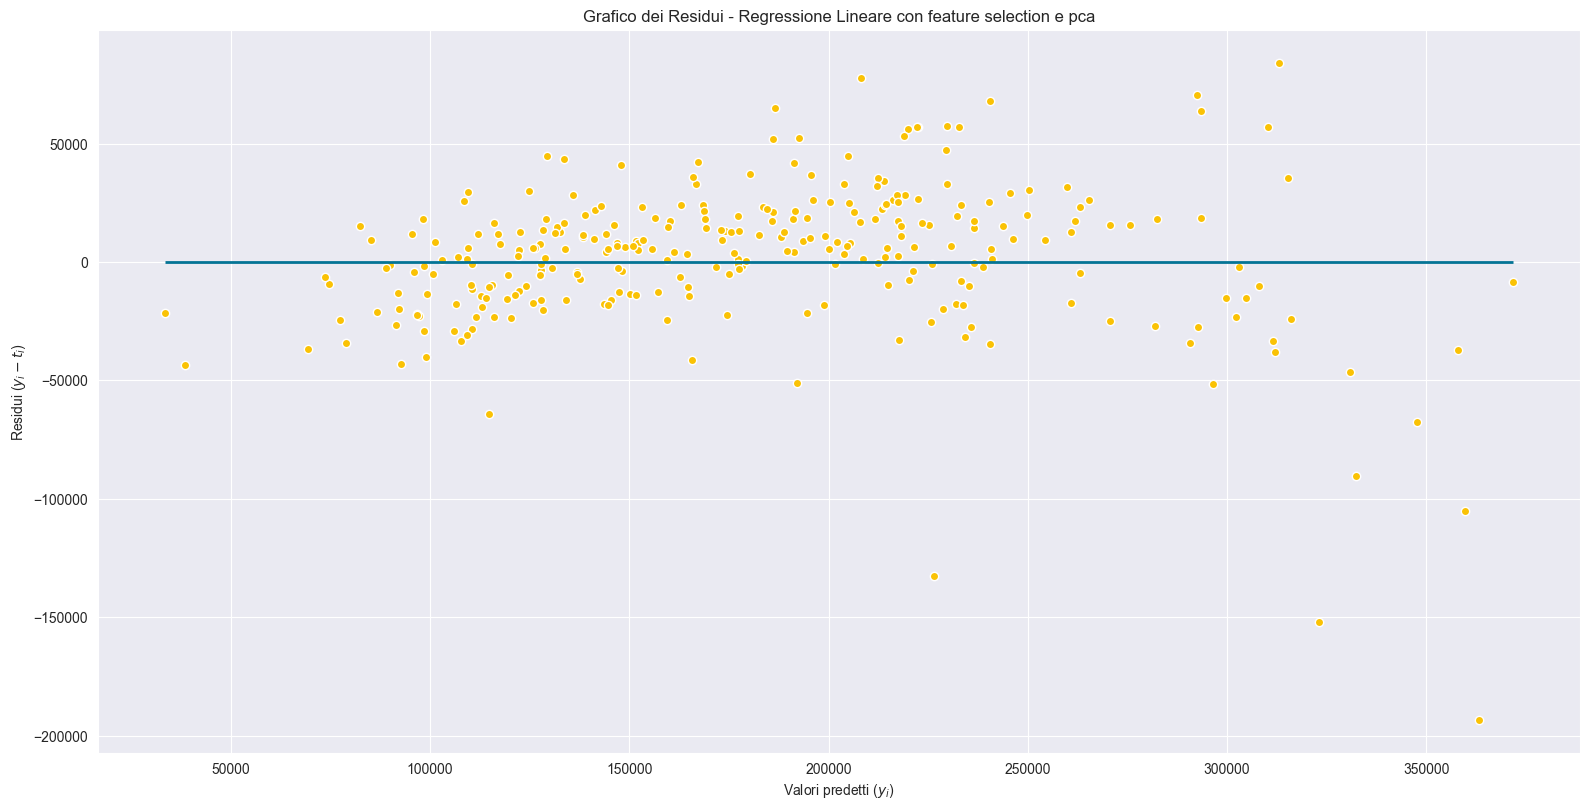

In [44]:
residual_plot(y_pred_pca_linear, dataset.y_test, 'Regressione Lineare con pca')
residual_plot(y_pred_fs_pca_linear, dataset.y_test, 'Regressione Lineare con feature selection e pca')

## 6.2 Regressione Polinomiale
La **regressione polinomiale** è una tecnica di modellazione che estende la semplice regressione lineare introducendo termini polinomiali come variabili esplicative. Questo tipo di regressione è utile quando la relazione tra la variabile di input (o le variabili) e la variabile di output non è lineare, ma può essere approssimata in modo più accurato da una funzione polinomiale.
L'ordine o il grado polinomiale dipende dalla complessità della relazione che si desidera modellare. Un ordine più alto può fornire una migliore adattabilità ai dati, ma può anche aumentare il rischio di overfitting. Pertanto, è importante trovare un equilibrio tra la complessità del modello e la sua capacità di generalizzare su nuovi dati.

Per applicare la regressione polinomiale, occorre definire $m$ funzioni base polinomiali $\phi_j(\bold{x})=x^j$ con cui trasformare il dataset e successivamente applicare il modello LinearRegression. Il grado massimo del polinomio è $m-1$. L'obiettivo della regressione polinomiale è trovare il miglior grado del polinomio che massimizza $R^2$.

In [45]:
from sklearn.preprocessing import PolynomialFeatures


def polynomial_transformation(x_train: DataFrame, x_test: DataFrame, d=2, only_interactions=False) -> Tuple[
    DataFrame, DataFrame]:
    """
    Trasforma il dataset di training e testing di partenza con n feature a dei dataset con m >> n feature.
    Ad esempio con 4 feature un polinomio di grado 2 produrrebbe 15 features:
    1, x1, x2, x3, x4, x1x2, x1x3, x1x4, x2x3, x2x4, x3x4, x1^2, x2^2, x3^2, x4^2
    d: grado del polinomio di regressione
    only_interactions: non mette le potenze ma solo le coppie (o tuple di dimensione massima d) di features
    returns: training set trasformato e testing set trasformato
    """
    # include_bias=False significa che non si forza l'intercetta y=0
    poly = PolynomialFeatures(degree=d, include_bias=False, interaction_only=only_interactions)
    # usiamo le funzioni base per trasformare il dataset (in questo caso aumenta d*(d-1)/2 il numero di features)
    x_train_poly = poly.fit_transform(x_train)
    # print(f"old train shape = {x_train.shape}, new train shape = {x_train_poly.shape}")
    x_test_poly = poly.transform(x_test)
    # print(f"old test shape = {x_test.shape}, new test shape = {x_test_poly.shape}")
    return pd.DataFrame(x_train_poly), pd.DataFrame(x_test_poly)


Il numero di feature ottenute è proporzionale al coefficiente binomiale delle feature iniziali e del grado del polinomio:

In [46]:
from scipy.special import binom

deg = 2
new_features = binom(220, deg)
print(f"Con 220 features, il polinomio di regressione di grado {deg} avrà {new_features} termini al più")

deg = 2
new_features = binom(40, deg)
print(f"Con 40 features, il polinomio di regressione di grado {deg} avrà {new_features} termini al più")

Con 220 features, il polinomio di regressione di grado 2 avrà 24090.0 termini al più
Con 40 features, il polinomio di regressione di grado 2 avrà 780.0 termini al più


Però poiché le feature iniziali sono 220, anche un polinomio di grado 2 produrrebbe ben 24090 features con PolynomialFeature, che sono decisamente troppe. Per ridurre la dimensionalità a 40 features, usiamo feature selection e PCA.

In [47]:
X_train_pca, X_test_pca, X_train_pca, X_test_pca = apply_fs_and_or_pca(dataset, k_fs=10, k_pca=4, scaled=True)

Feature ridotte da (1168, 240) con PCA: (1168, 4)
Feature selezionate:  (1168, 10)
Feature ridotte da 104 con MI e PCA:  (1168, 4)


### 6.2.1 Con polynomial regression grado 3 con e senza `only_interactions`
Ora applichiamo le funzioni base polinomiali, con un polinomio di grado 3, con tutte le potenze delle features:

In [48]:
poly_degree = 3  # grado del polinomio (non aumentarlo troppo!)
X_poly_train_pca, X_poly_test_pca = polynomial_transformation(X_train_pca, X_test_pca, d=poly_degree)
X_poly_train_pca_fs, X_poly_test_pca_fs = polynomial_transformation(X_train_pca, X_test_pca, d=poly_degree)
score3, rms3, y_pred_poly3 = run_regression_train_test(f"poly (deg {poly_degree}) normalized with PCA",
                                                       LinearRegression(),
                                                       dataset,
                                                       X_poly_train_pca,
                                                       X_poly_test_pca, scaled=True)
score4, rms4, y_pred_poly4 = run_regression_train_test(f"poly (deg {poly_degree}) normalized with FS and PCA",
                                                       LinearRegression(), dataset,
                                                       X_poly_train_pca_fs,
                                                       X_poly_test_pca_fs, scaled=True)

# migliore score 4 > score 2
res_poly = BestParameters(f"Poly (deg {poly_degree}) normalized with PCA, only_interactior=False", 220, None, score3,
                          rms3, [])
parameters.append(res_poly)
res_poly = BestParameters(f"Poly (deg {poly_degree}) normalized with FS and PCA, only_interactior=False", 220, None,
                          score4, rms4, [])
parameters.append(res_poly)

poly (deg 3) normalized with PCA - r2: 0.8587787341044585 - rms: 30410.236527937606 - r2 test: 0.8541786402661976 - rms test: 27891.29825133607
poly (deg 3) normalized with FS and PCA - r2: 0.8587787341044585 - rms: 30410.236527937606 - r2 test: 0.8541786402661976 - rms test: 27891.29825133607


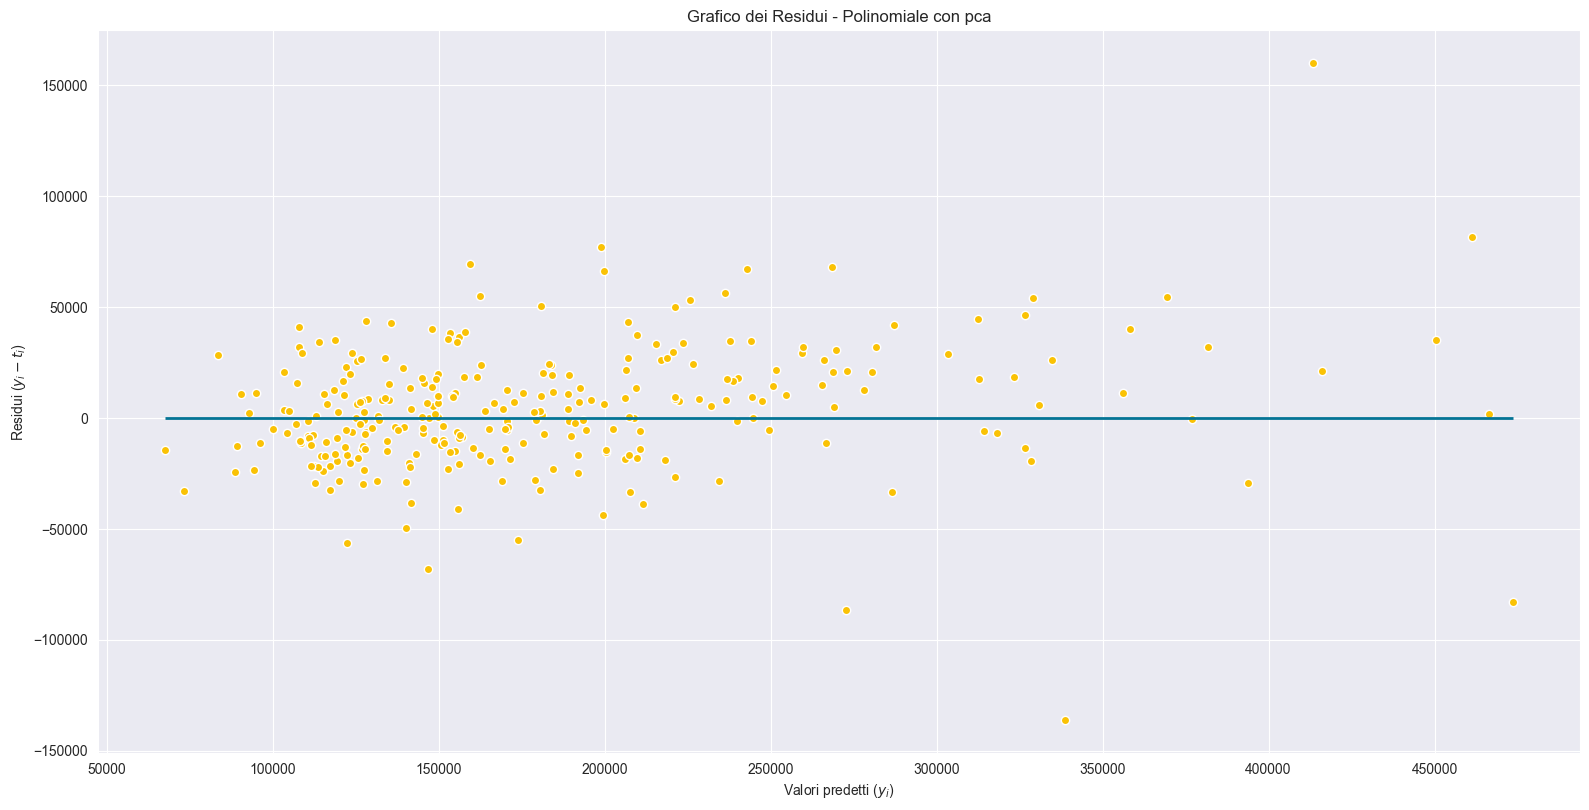

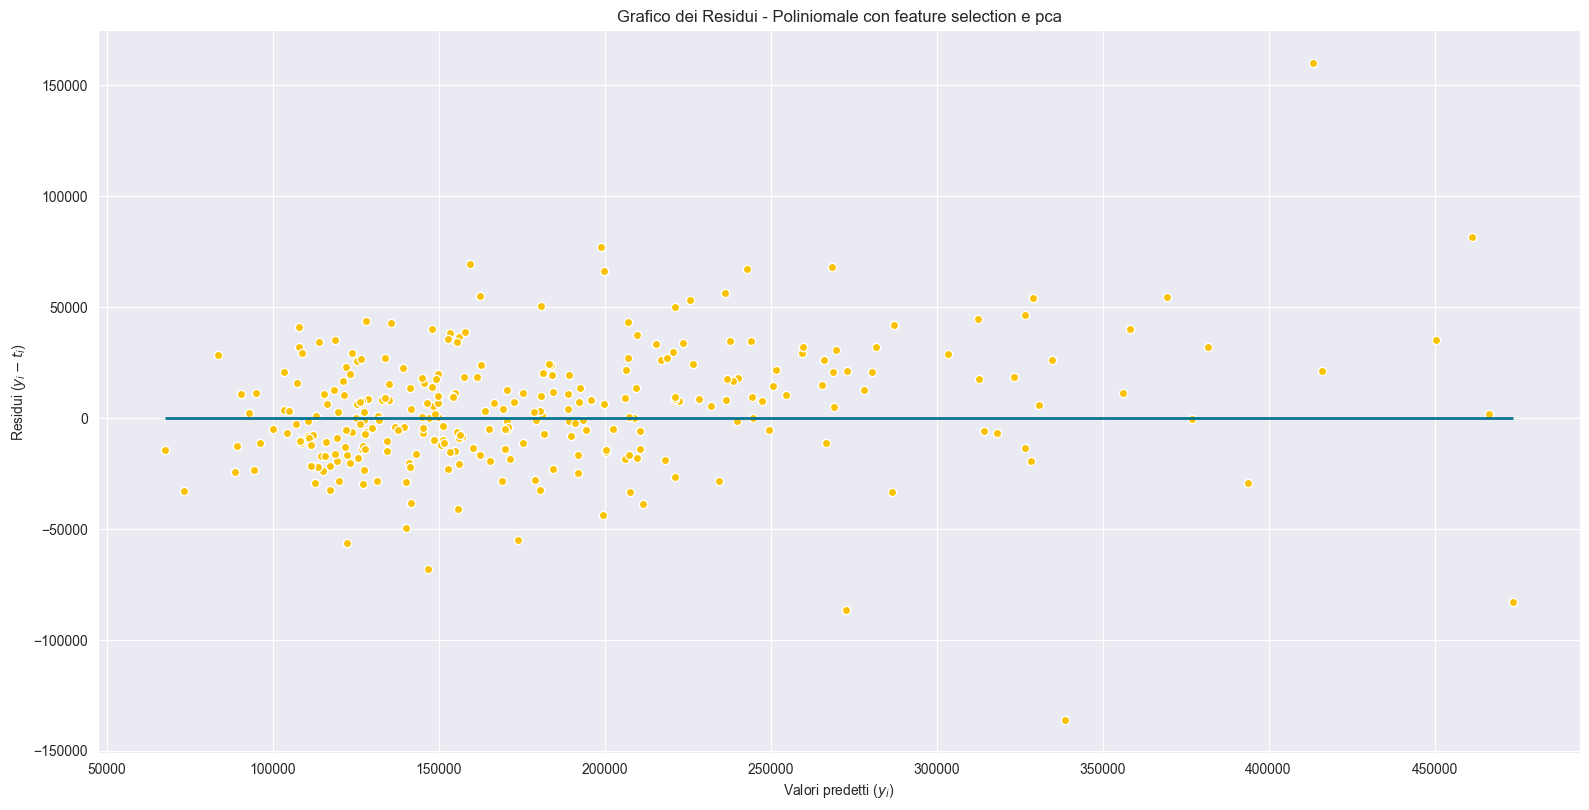

In [49]:
residual_plot(y_pred_poly3, dataset.y_test, 'Polinomiale con pca')
residual_plot(y_pred_poly4, dataset.y_test, 'Poliniomale con feature selection e pca')

Invece se manteniamo solo le interazioni tra le features, escludendo le potenze i risultati, come ci si poteva aspettare, peggiorano:

In [50]:
poly_degree = 3
X_poly_train_pca2, X_poly_test_pca2 = polynomial_transformation(X_train_pca, X_test_pca, d=poly_degree,
                                                                only_interactions=True)
X_poly_train_pca_fs2, X_poly_test_pca_fs2 = polynomial_transformation(X_train_pca, X_test_pca, d=poly_degree,
                                                                      only_interactions=True)

score5, rms5, y_pred_poly5 = run_regression_train_test(f"poly (deg {poly_degree}) normalized with PCA",
                                                       LinearRegression(),
                                                       dataset,
                                                       X_poly_train_pca2,
                                                       X_poly_test_pca2, scaled=True)
score6, rms6, y_pred_poly6 = run_regression_train_test(f"poly (deg {poly_degree}) normalized with PCA",
                                                       LinearRegression(),
                                                       dataset,
                                                       X_poly_train_pca_fs2,
                                                       X_poly_test_pca_fs2, scaled=True)

# meglio score 4

res_poly = BestParameters(f"Poly (deg {poly_degree}) normalized with PCA, only_interactior=True", 220, None, score5,
                          rms5, [])
parameters.append(res_poly)
res_poly = BestParameters(f"Poly (deg {poly_degree}) normalized with FS and PCA, only_interactior=True", 220, None,
                          score6, rms6, [])
parameters.append(res_poly)

poly (deg 3) normalized with PCA - r2: 0.8469442402689984 - rms: 31658.810017709256 - r2 test: 0.8609819322990535 - rms test: 27232.893134078182
poly (deg 3) normalized with PCA - r2: 0.8469442402689984 - rms: 31658.810017709256 - r2 test: 0.8609819322990535 - rms test: 27232.893134078182


Meglio usare `only_interactions=False`

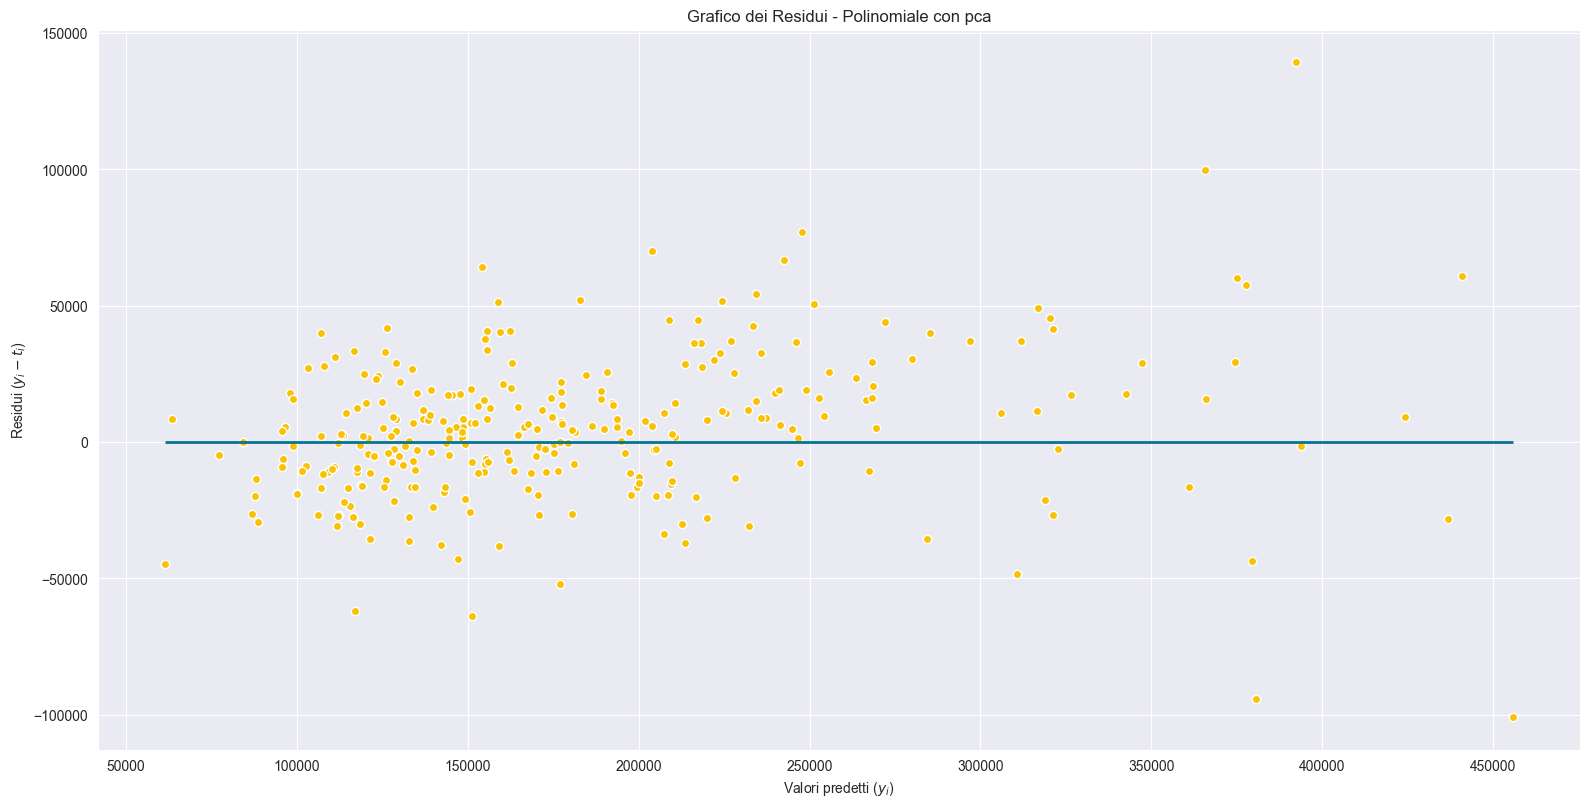

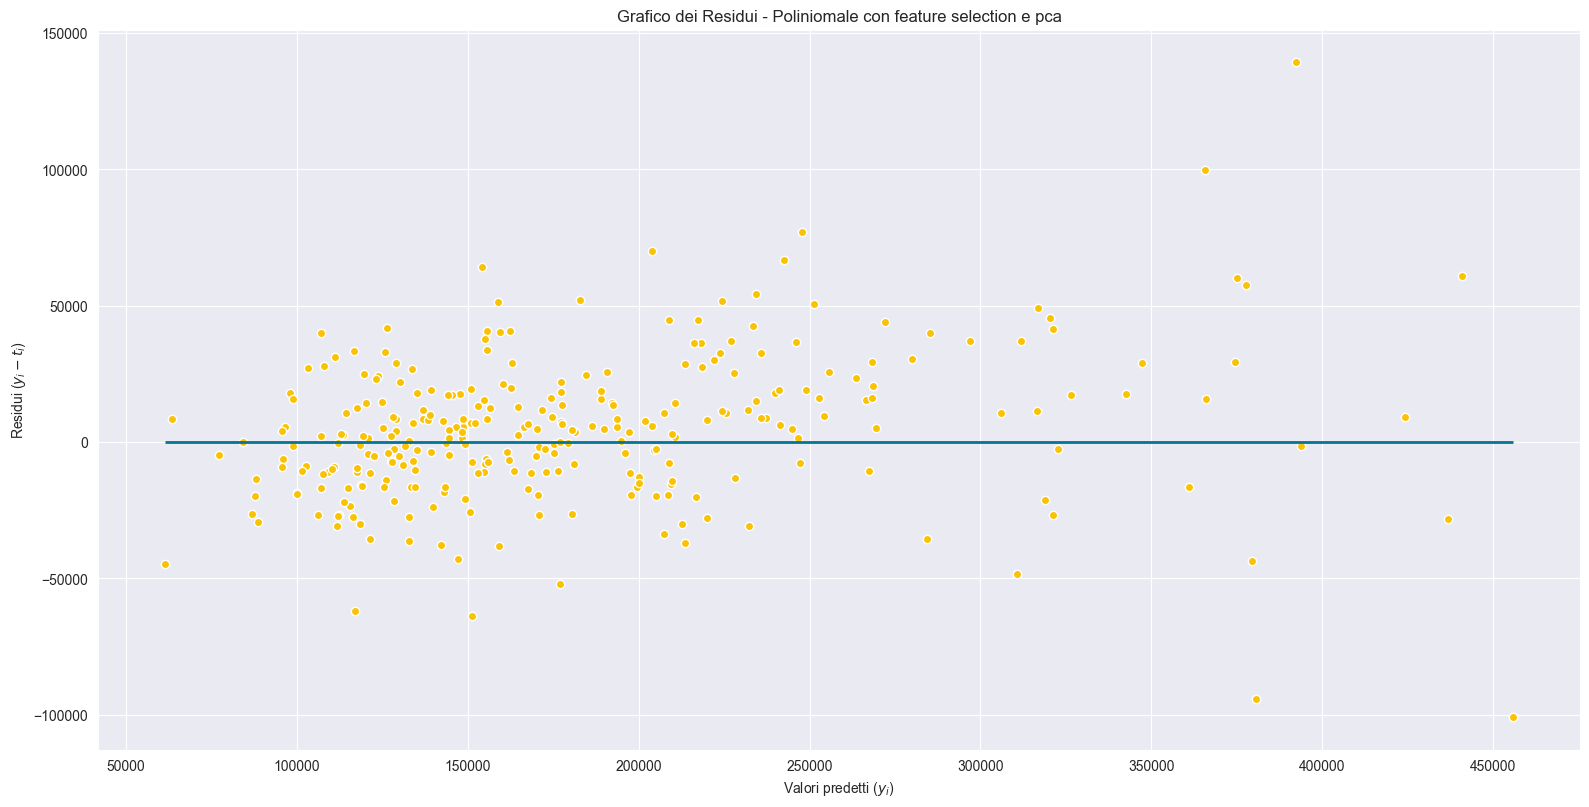

In [51]:
residual_plot(y_pred_poly5, dataset.y_test, 'Polinomiale con pca')
residual_plot(y_pred_poly6, dataset.y_test, 'Poliniomale con feature selection e pca')

### 6.2.2 Regressione polinomiale - Miglior grado
Troviamo il miglior grado del polinomio fissando il numero di feature dei dataset (con FS e PCA).

In [52]:
def best_poly_degree(dataset: Dataset, k_fs=10, k_pca=4, scaled=True):
    degrees = [1, 2, 3, 4, 5]
    X_train_fs_pca, X_test_fs_pca = apply_fs_and_pca(dataset, k_fs=k_fs, k_pca=k_pca, scaled=scaled)
    best_r2 = 0.0
    best_rms = 0.0
    best_d = 0
    results = {"d": [], "r2": [], "rms": [], "r2 train": [], "rms train": []}
    for d in degrees:
        # qua non possiamo fare grid search perché il grado non è un parametro della linear regression, 
        # ma un iperparametro per trasformare il dataset iniziale
        X_poly_train_fs_pca, X_poly_test_fs_pca = polynomial_transformation(X_train_fs_pca, X_test_fs_pca, d=d)
        r2_train_poly, rms_train_poly, r2_test_poly, rms_test_poly, _ = performance_test(LinearRegression(), dataset,
                                                                                         x_train_new=X_poly_train_fs_pca,
                                                                                         x_test_new=X_poly_test_fs_pca,
                                                                                         scaled=scaled)
        print(
            f"Polynomial Regression deg {d} -> r2 train = {r2_train_poly} - rms train = {rms_train_poly} --- r2 test = {r2_test_poly} rms test = {rms_test_poly}")
        results["d"].append(d)
        results["r2"].append(r2_test_poly)
        results["rms"].append(rms_test_poly)
        results["r2 train"].append(r2_train_poly)
        results["rms train"].append(rms_train_poly)
        if r2_test_poly > best_r2:
            best_r2 = r2_test_poly
            best_rms = rms_test_poly
            best_d = d
    return best_d, best_r2, best_rms, results

In [53]:
d, r2, rms, results = best_poly_degree(dataset, k_fs=10, k_pca=4, scaled=True)
print(f"Best degree for Polynomial regression: {d} - best r2: {r2} - best rms: {rms}")

Feature selezionate:  (1168, 10)
Feature ridotte da 104 con MI e PCA:  (1168, 4)
Polynomial Regression deg 1 -> r2 train = 0.7707003667872795 - rms train = 38749.97512005732 --- r2 test = 0.8400601947357801 rms test = 29210.32838891215
Polynomial Regression deg 2 -> r2 train = 0.840637601294259 - rms train = 32304.474224693557 --- r2 test = 0.8760239879409963 rms test = 25717.39581506838
Polynomial Regression deg 3 -> r2 train = 0.8720458102216826 - rms train = 28946.562922365243 --- r2 test = 0.8345467608371036 rms test = 29709.530929434073
Polynomial Regression deg 4 -> r2 train = 0.893129772114724 - rms train = 26454.412168326126 --- r2 test = 0.7595357566085558 rms test = 35816.52203103299
Polynomial Regression deg 5 -> r2 train = 0.9080684171530718 - rms train = 24535.906999748146 --- r2 test = 0.25219829927211 rms test = 63161.3468410472
Best degree for Polynomial regression: 2 - best r2: 0.8760239879409963 - best rms: 25717.39581506838


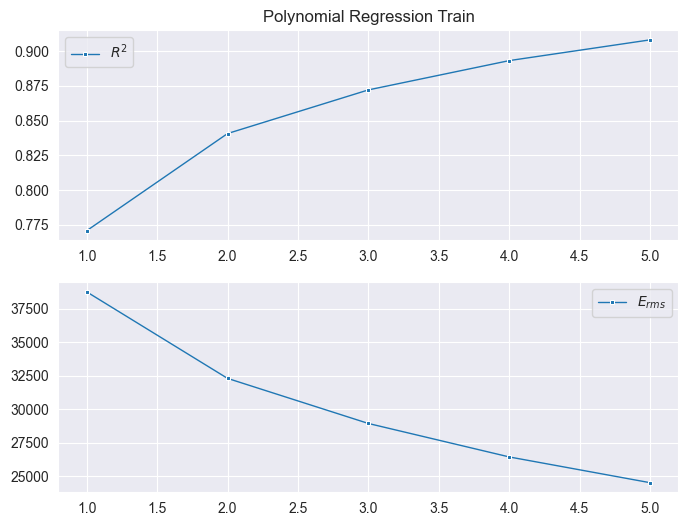

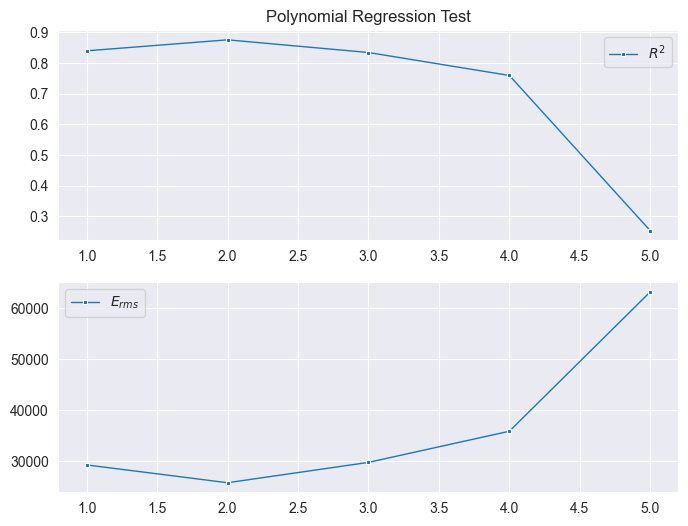

In [54]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
simple_plot_scores(x=results["d"], y=results["r2 train"], label="$R^2$", title="Polynomial Regression Train")
plt.subplot(2, 1, 2)
simple_plot_scores(x=results["d"], y=results["rms train"], label="$E_{rms}$", title="")
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
simple_plot_scores(x=results["d"], y=results["r2"], label="$R^2$", title="Polynomial Regression Test")
plt.subplot(2, 1, 2)
simple_plot_scores(x=results["d"], y=results["rms"], label="$E_{rms}$", title="")

### 6.2.3 Regressione polinomiale - Performance con miglior grado

Determiniamo la performance del modello sul testing set, usando il miglior grado:

In [55]:
best_degree = d  # 3
X_train_fs_pca, X_test_fs_pca = apply_fs_and_pca(dataset, k_fs=10, k_pca=4, scaled=True)
X_poly_train_fs_pca, X_poly_test_fs_pca = polynomial_transformation(X_train_fs_pca, X_test_fs_pca, d=best_degree)
r2_poly_train, rms_poly_train, r2_poly_test, rms_poly_test, y_pred_poly = performance_test(LinearRegression(), dataset,
                                                                                           x_train_new=X_poly_train_fs_pca,
                                                                                           x_test_new=X_poly_test_fs_pca,
                                                                                           scaled=True)
print(
    f"Polynomial Regression best degree ({best_degree})-> r2 train: {r2_poly_train} - rms train: {rms_poly_train} --- r2 mean: {r2_poly_test} - rms mean: {rms_poly_test} ")
res_poly = BestParameters(f"Polynomial Regression best degree {best_degree}", 220, {'degree': best_degree},
                          r2_poly_test, rms_poly_test, None)
parameters.append(res_poly)

Feature selezionate:  (1168, 10)
Feature ridotte da 104 con MI e PCA:  (1168, 4)
Polynomial Regression best degree (2)-> r2 train: 0.840637601294259 - rms train: 32304.474224693553 --- r2 mean: 0.8760239879409963 - rms mean: 25717.395815068376 


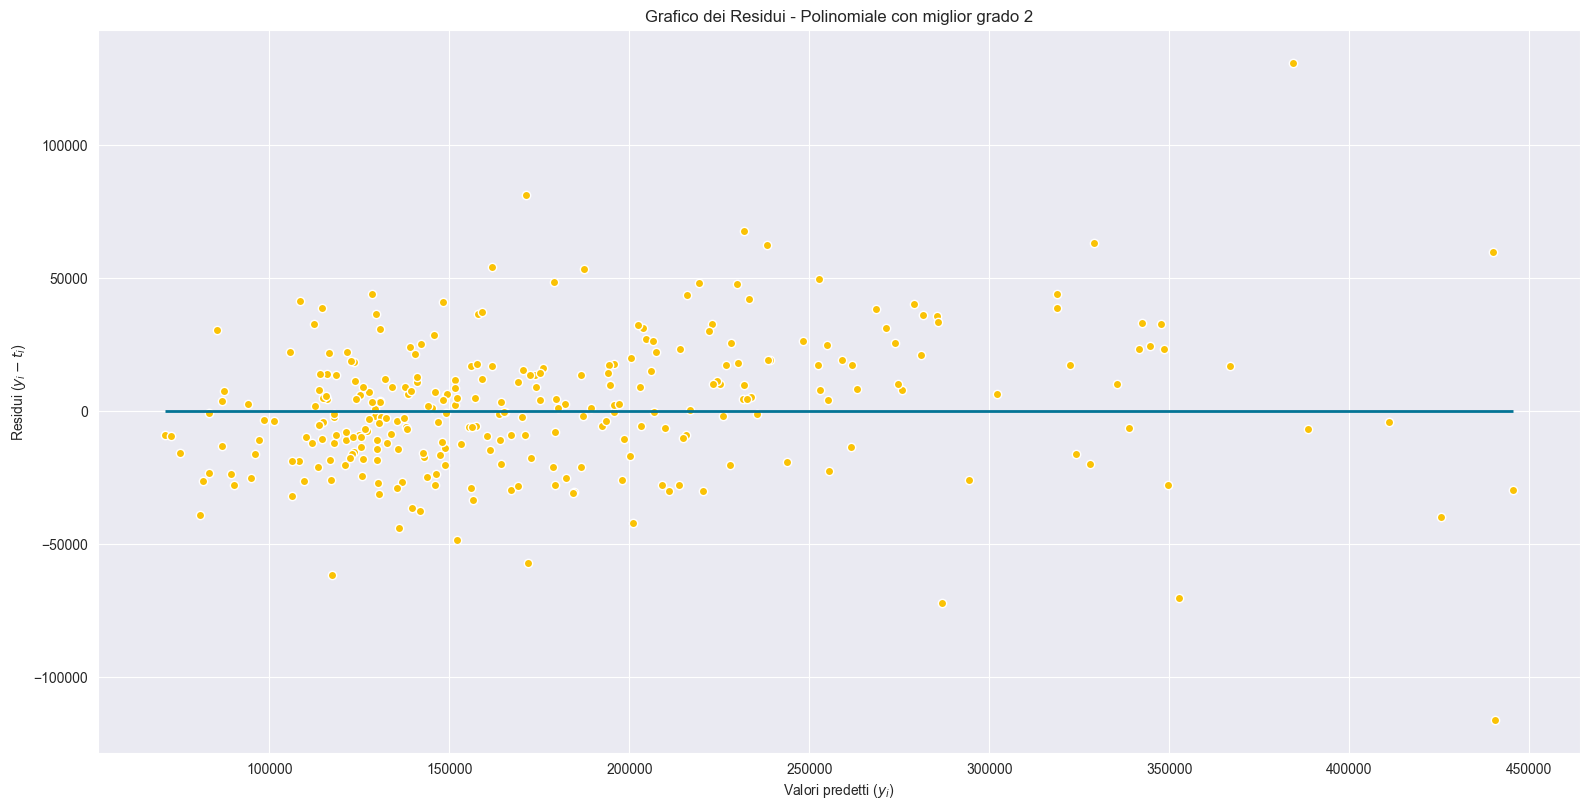

In [56]:
residual_plot(y_pred_poly, dataset.y_test, f'Polinomiale con miglior grado {d}')

In questo caso, la regressione polinomiale è peggiore rispetto alla lineare, anche se va ricordato che abbiamo ridotto molto la dimensionalità del dataset per poterlo applicare, usando FS e PCA.

## 6.3 Regressione Lasso
La **regressione Lasso** è un metodo di regressione lineare che incorpora una penalizzazione L1 (norma L1) per stimare i coefficienti dei predittori. Questo metodo è utilizzato per la selezione delle caratteristiche e la riduzione della dimensionalità, in quanto tende a produrre coefficienti di regressione sparsi, mettendo a zero i coefficienti meno importanti.

La funzione di costo della regressione Lasso è la Square Loss, mentre la regolarizzazione è data dal valore assoluto. In generale la funzione da minimizzare per Lasso è la seguente:

$$ E(\bold{w})=\frac{1}{2} \sum_{i=1}^n (t_i -\bold{w}^T \bold{x})^2 + \frac{\lambda}{2}\sum_{j=1}^m |w_j|$$

In particolare $\lambda$ è il coefficiente di regolarizzazione, che in scikit-learn corrisponde al valore $\alpha$.


### 6.3.1 Lasso Cross Validation

Usiamo la classe di libreria LassoCV per trovare automaticamente il miglior $\alpha$ per la regressione Lasso:

In [49]:
from sklearn.linear_model import LassoCV


def lasso_performance(dataset: Dataset, scaled=True) -> Tuple[Series, float, float, float]:
    if not scaled:
        return _lasso_performance(dataset.X_train, dataset.X_test, dataset.y_train, dataset.y_test)
    else:
        return _lasso_performance(dataset.X_train_normalized, dataset.X_test_normalized, dataset.y_train,
                                  dataset.y_test)


def _lasso_performance(X_train, X_test, y_train, y_test) -> Tuple[Series, float, float, float]:
    lasso_cv = LassoCV(cv=5, random_state=42)
    lasso_cv.fit(X_train, y_train)
    y_pred_lasso_train = lasso_cv.predict(X_train)
    y_pred_lasso = lasso_cv.predict(X_test)

    r2_lasso_train = r2_score(y_true=y_train, y_pred=y_pred_lasso_train)
    rms_lasso_train = np.sqrt(mean_squared_error(y_true=y_train, y_pred=y_pred_lasso_train))

    r2_lasso = r2_score(y_true=y_test, y_pred=y_pred_lasso)
    rms_lasso = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred_lasso))
    print(
        f"Lasso regression -> r2 train {r2_lasso_train} - rms train {rms_lasso_train} --- r2 test: {r2_lasso} rms_lasso test = {rms_lasso} - best alpha: {lasso_cv.alpha_}")
    return r2_lasso, rms_lasso, y_pred_lasso, lasso_cv.alpha_


print("Lasso without scaling")
r2_lasso, rms_lasso, y_pred_lasso, alpha_lasso = lasso_performance(dataset, scaled=False)
res_lasso = BestParameters(f"Lasso Regression no normalization", 220, {'alpha': alpha_lasso}, r2_lasso, rms_lasso, None)
parameters.append(res_lasso)

print("Lasso with scaling")
r2_lasso, rms_lasso, y_pred_lasso_scaling, alpha_lasso_scaling = lasso_performance(dataset, scaled=True)
res_lasso = BestParameters(f"Lasso Regression with normalization", 220, {'alpha': alpha_lasso_scaling}, r2_lasso,
                           rms_lasso, None)
parameters.append(res_lasso)


Lasso without scaling
Lasso regression -> r2 train 0.647158121238415 - rms train 48068.4159863049 --- r2 test: 0.6691613509257863 rms_lasso test = 42011.31516775625 - best alpha: 225756.80386755837
Lasso with scaling
Lasso regression -> r2 train 0.8899574410490569 - rms train 26844.17667615801 --- r2 test: 0.8808365799668254 rms_lasso test = 25213.2968797936 - best alpha: 1823.7048309264703


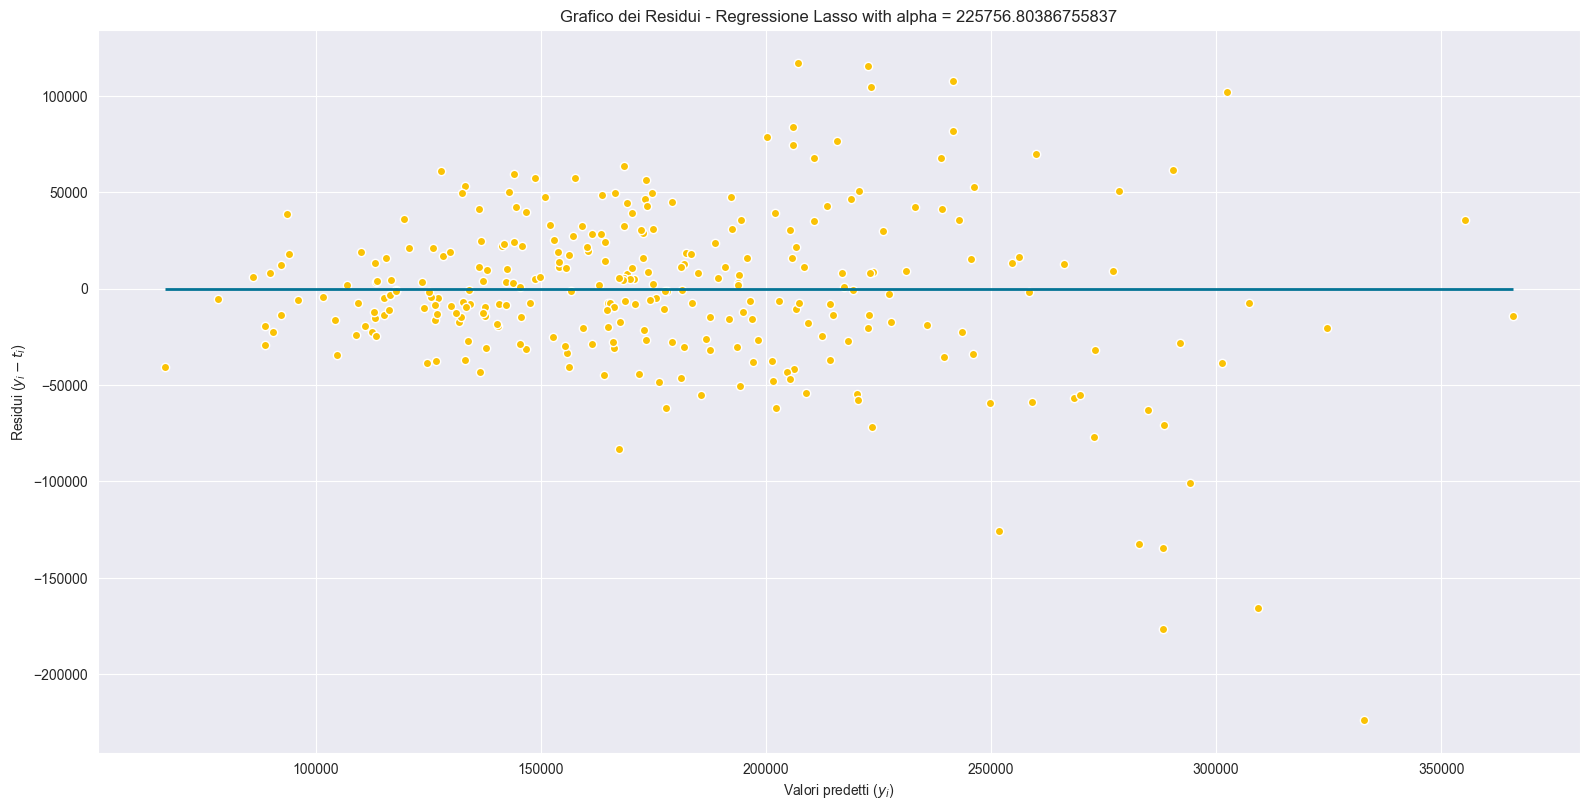

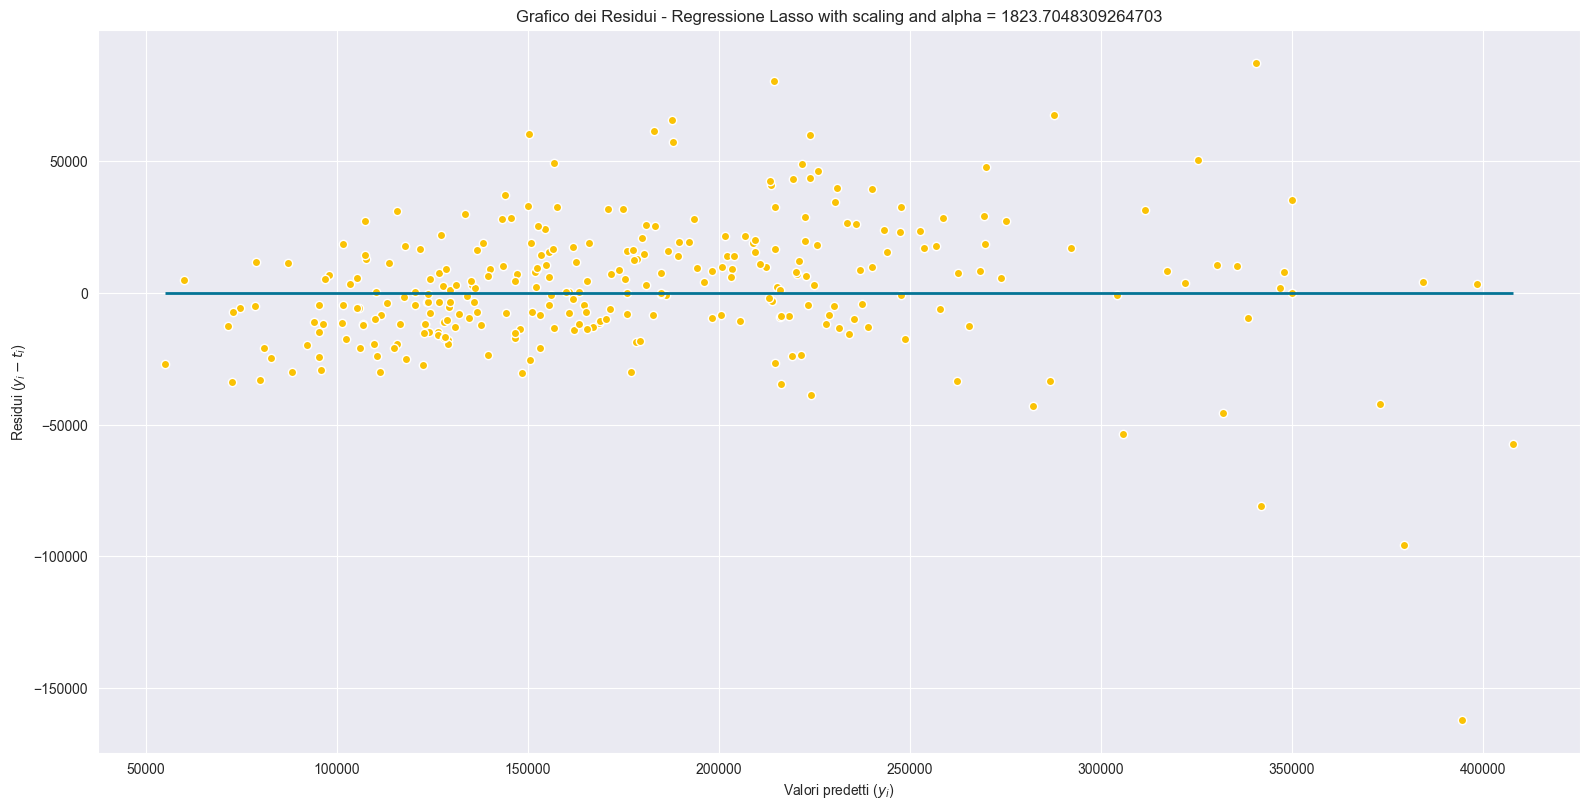

In [50]:
residual_plot(y_pred_lasso, dataset.y_test, 'Regressione Lasso with alpha = ' + str(alpha_lasso))
residual_plot(y_pred_lasso_scaling, dataset.y_test,
              'Regressione Lasso with scaling and alpha = ' + str(alpha_lasso_scaling))

### 6.3.2 Performance test con pca, con/senza feature selection
Valutiamo il modello con un dataset non normalizzato applicando pca e feature selection:

In [51]:
print("Lasso no normalized")
X_train_pca, X_test_pca, X_train_fs_pca, X_test_fs_pca = apply_fs_and_or_pca(dataset, k_fs=10, k_pca=4)

lasso_regression_pca_fs = Lasso(alpha=alpha_lasso)
score1_lasso, rms1_lasso, y_pred_lasso1 = run_regression_train_test("linear with PCA",
                                                                    lasso_regression_pca_fs,
                                                                    dataset, X_train_pca,
                                                                    X_test_pca, scaled=False)
lasso_regression_pca_fs = Lasso(alpha=alpha_lasso)
score2_lasso, rms2_lasso, y_pred_lasso2 = run_regression_train_test("linear with FS and PCA",
                                                                    lasso_regression_pca_fs,
                                                                    dataset,
                                                                    X_train_fs_pca, X_test_fs_pca, scaled=False)

res_lasso = BestParameters(f"Lasso Regression no normalization with pca", 220, {'alpha': alpha_lasso},
                           score1_lasso, rms1_lasso, None)
parameters.append(res_lasso)
res_lasso = BestParameters(f"Lasso Regression no normalization with pca e fs", 220, {'alpha': alpha_lasso},
                           score2_lasso, rms2_lasso, None)
parameters.append(res_lasso)

Lasso no normalized
Feature ridotte da (1168, 240) con PCA: (1168, 4)
Feature selezionate:  (1168, 10)
Feature ridotte da 104 con MI e PCA:  (1168, 4)
linear with PCA - r2: 0.6048500549076419 - rms: 50868.70843302252 - r2 test: 0.6727956777034819 - rms test: 41779.926725324854
linear with FS and PCA - r2: 0.5978165497634358 - rms: 51319.432560675676 - r2 test: 0.6616418519852386 - rms test: 42486.06190692634


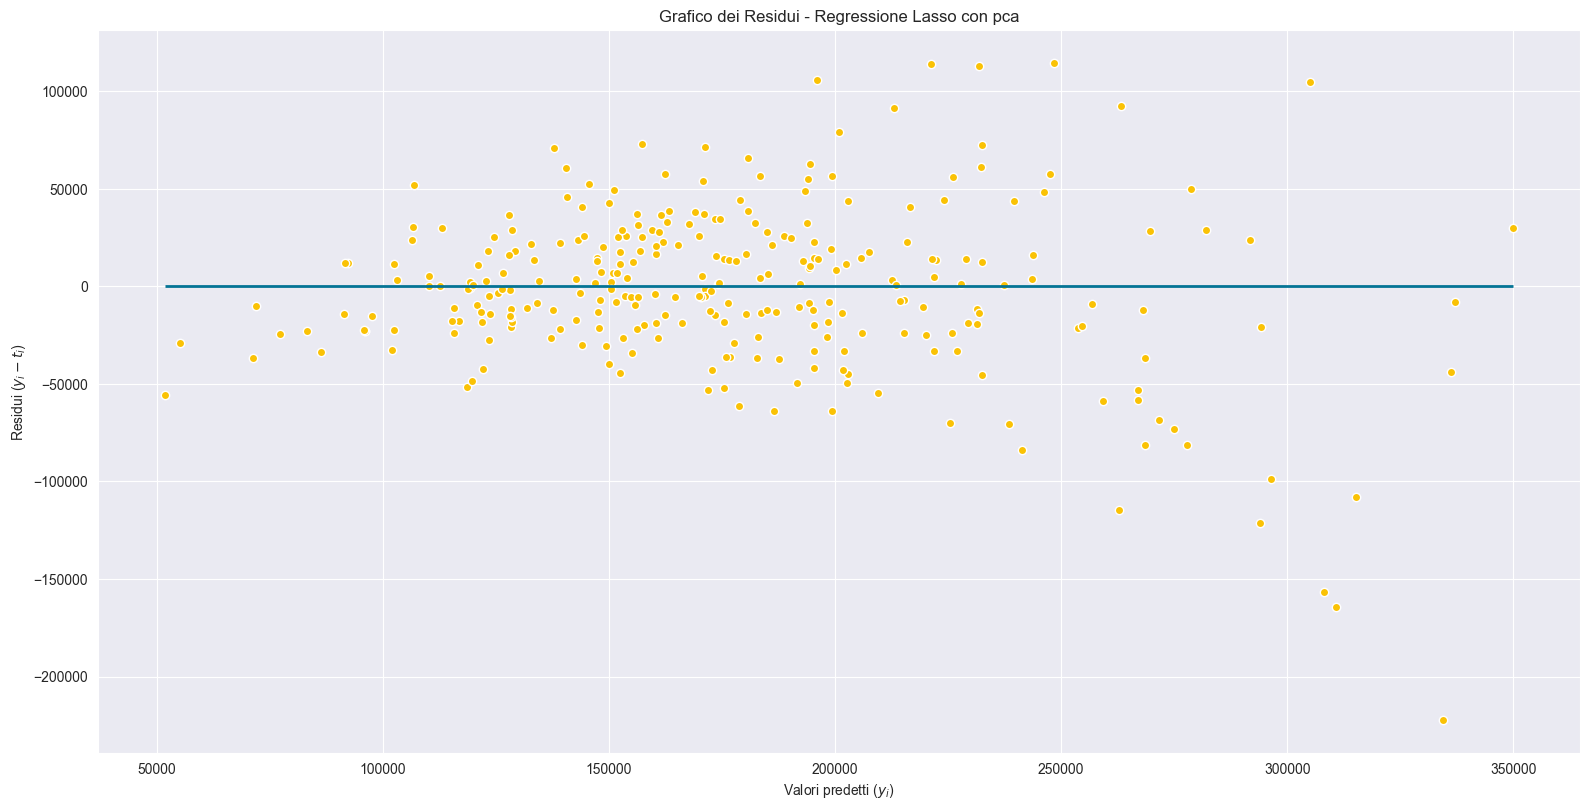

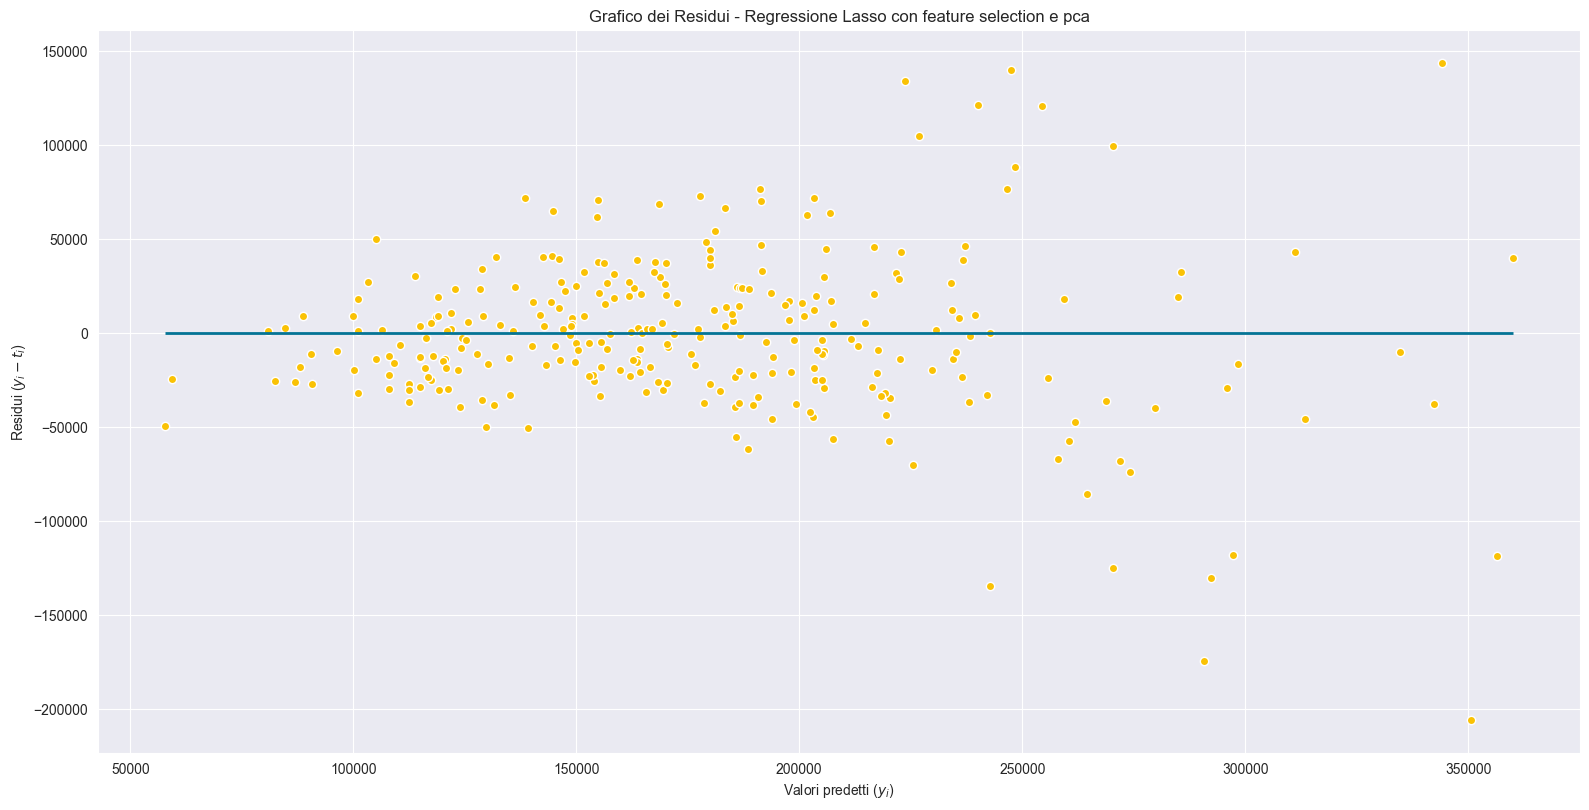

In [52]:
residual_plot(y_pred_lasso1, dataset.y_test, 'Regressione Lasso con pca')
residual_plot(y_pred_lasso2, dataset.y_test, 'Regressione Lasso con feature selection e pca')

In [53]:
X_train_pca, X_test_pca, X_train_fs_pca, X_test_fs_pca = apply_fs_and_or_pca(dataset, k_fs=10, k_pca=4, scaled=True)

lasso_regression_pca_fs = Lasso(alpha=alpha_lasso_scaling)
score3_lasso, rms3_lasso, y_pred_lasso3 = run_regression_train_test("linear normalized with PCA",
                                                                    lasso_regression_pca_fs,
                                                                    dataset, X_train_pca,
                                                                    X_test_pca, scaled=True)
lasso_regression_pca_fs = Lasso(alpha=alpha_lasso_scaling)
score4_lasso, rms4_lasso, y_pred_lasso4 = run_regression_train_test("linear normalized with FS and PCA",
                                                                    lasso_regression_pca_fs,
                                                                    dataset,
                                                                    X_train_fs_pca, X_test_fs_pca, scaled=True)

res_lasso = BestParameters(f"Lasso Regression with normalization with pca", 220, {'alpha': alpha_lasso_scaling},
                           score3_lasso, rms3_lasso, None)
parameters.append(res_lasso)
res_lasso = BestParameters(f"Lasso Regression with normalization with pca e fs", 220, {'alpha': alpha_lasso_scaling},
                           score4_lasso, rms4_lasso, None)
parameters.append(res_lasso)

Feature ridotte da (1168, 240) con PCA: (1168, 4)
Feature selezionate:  (1168, 10)
Feature ridotte da 104 con MI e PCA:  (1168, 4)
linear normalized with PCA - r2: 0.6774825390501251 - rms: 45956.43843321042 - r2 test: 0.6967729115597752 - rms test: 40220.008303940835
linear normalized with FS and PCA - r2: 0.7685171593578205 - rms: 38934.01120820874 - r2 test: 0.8368184218100321 - rms test: 29504.87115812229


Anche in questo caso la FS e PCA riducono le performance di almeno 10 punti percentuali per l'$R^2$, quindi non sono convenienti.

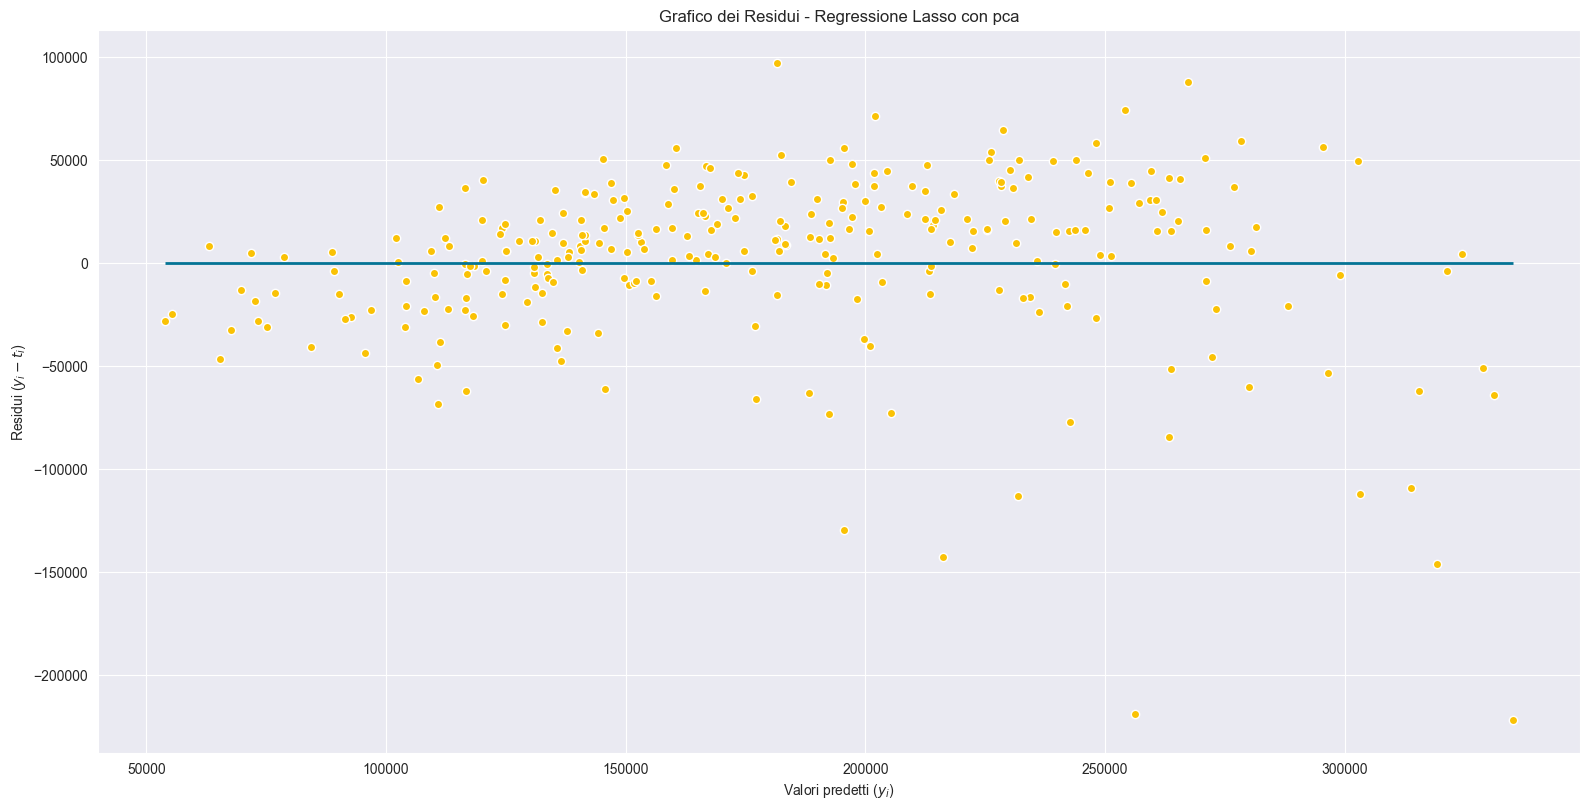

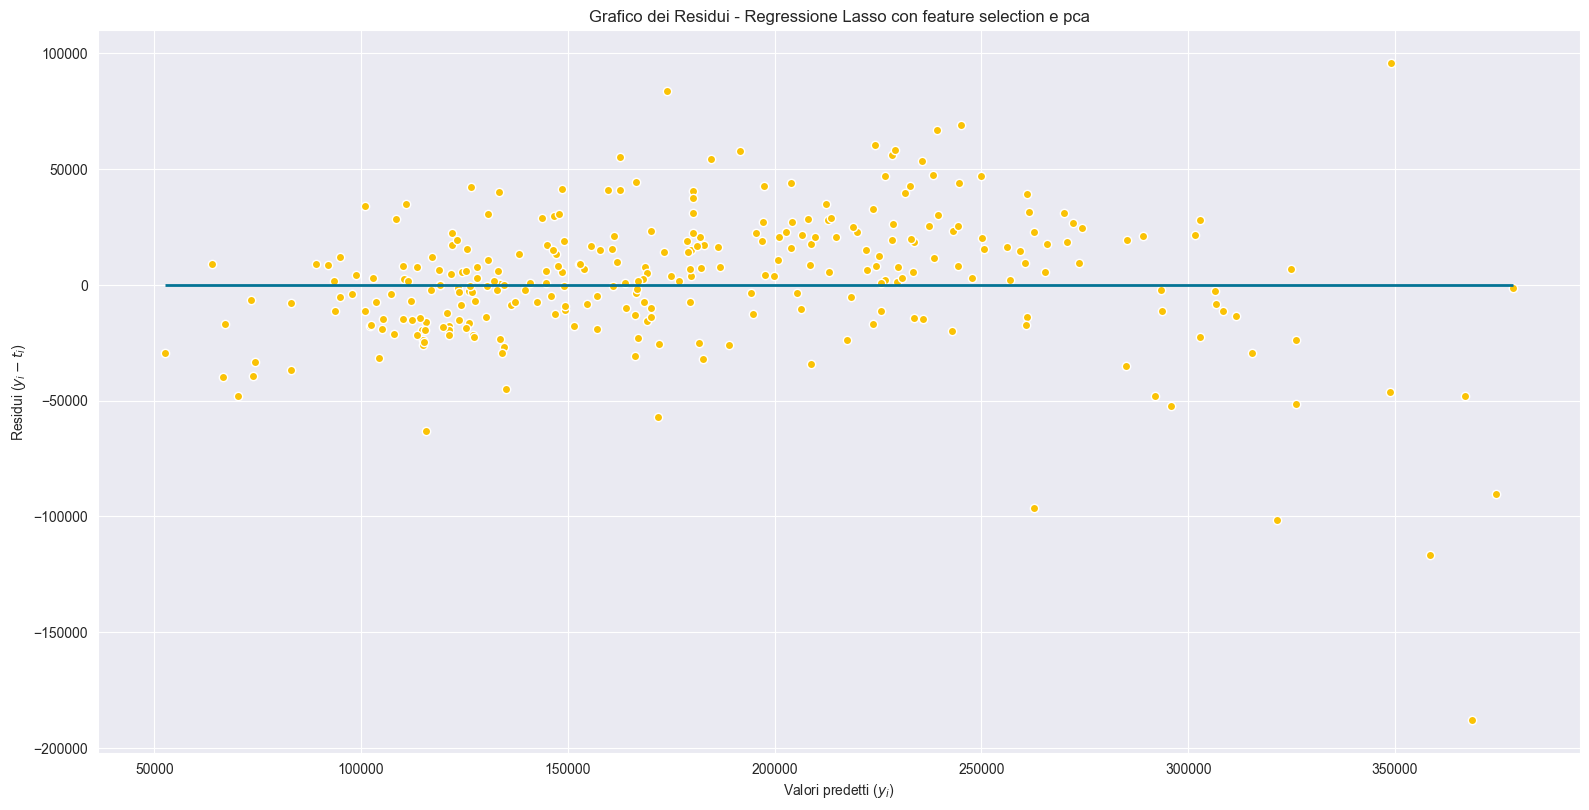

In [54]:
residual_plot(y_pred_lasso3, dataset.y_test, 'Regressione Lasso con pca')
residual_plot(y_pred_lasso4, dataset.y_test, 'Regressione Lasso con feature selection e pca')

## 6.4 Regressione Ridge lineare
La **Ridge Regression** è un metodo di regressione lineare che utilizza una funzione costo quadratica (Square Loss) e una regolarizzazione quadratica (anche denominata L2) per stimare i coefficienti della regressione lineare. Questo metodo è utilizzato per affrontare il problema dell'overfitting e stabilizzare le stime dei coefficienti. Quindi, potrebbe essere utile in quanto abbiamo pochi elementi nel dataset (1480). La funzione di costo da minimizzare per la regressione ridge è la seguente:

$$ E(\bold{w})=\frac{1}{2}\sum_{i=1}^n (t_i-\bold{w}^T\bold{x}_i)^2 + \frac{\lambda}{2}\bold{w}^T\bold{w}$$

L'iperparametro $\lambda$ è l'ammontare di regolarizzazione da applicare.

E' anche possibile applicare a ogni elemento 
$\bold{x}$ del dataset delle funzioni base $\bold{\phi(x)}$, ad esempio per ottenere una regressione ridge polinomiale.

Anche per la ridge regressione esiste una soluzione ottima dei parametri $\bold{w}^*$ in forma chiusa:

$$\bold{w}^*=(\lambda I +X^T X)^{-1}X^T \bold{t}$$

### 6.4.1 Ridge: Miglior valore di lambda usando cross validation
Troviamo tramite **RidgeCV** il miglior valore di **lambda**:

In [61]:
from sklearn.linear_model import RidgeCV


def ridge_performance(dataset: Dataset, scaled=True) -> Tuple[Series, float, float, float]:
    if not scaled:
        return _ridge_performance(dataset.X_train, dataset.X_test, dataset.y_train, dataset.y_test)
    else:
        return _ridge_performance(dataset.X_train_normalized, dataset.X_test_normalized, dataset.y_train,
                                  dataset.y_test)


def _ridge_performance(X_train, X_test, y_train, y_test) -> Tuple[Series, float, float, float]:
    cv = RidgeCV(cv=5)
    cv.fit(X_train, y_train)
    y_pred_train = cv.predict(X_train)
    y_pred = cv.predict(X_test)

    r2_train = r2_score(y_true=y_train, y_pred=y_pred_train)
    rms_train = np.sqrt(mean_squared_error(y_true=y_train, y_pred=y_pred_train))

    r2_test = r2_score(y_true=y_test, y_pred=y_pred)
    rms_test = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred))
    print(
        f"Ridge regression -> r2 train {r2_train} - rms train {rms_train} --- r2 test: {r2_test} rms_lasso test = {rms_test} - best alpha: {cv.alpha_}")
    return r2_test, rms_test, y_pred, cv.alpha_


print("Ridge without scaling")
r2_ridge, rms_ridge, y_pred_ridge, alpha_ridge = ridge_performance(dataset, scaled=False)
res_ridge = BestParameters(f"Ridge Regression no normalization", 220, {'alpha': alpha_ridge}, r2_ridge, rms_ridge, None)
parameters.append(res_ridge)

print("Ridge with scaling")
r2_ridge, rms_ridge, y_pred_ridge_scaling, alpha_ridge_scaling = ridge_performance(dataset, scaled=True)
res_ridge = BestParameters(f"Ridge Regression with normalization", 220, {'alpha': alpha_ridge_scaling}, r2_ridge,
                           rms_ridge, None)
parameters.append(res_ridge)

Ridge without scaling
Ridge regression -> r2 train 0.8823978962138039 - rms train 27750.914120359277 --- r2 test: 0.8820954106049717 rms_lasso test = 25079.76790371758 - best alpha: 10.0
Ridge with scaling
Ridge regression -> r2 train 0.920430418755982 - rms train 22826.70804589412 --- r2 test: 0.8620326411388579 rms_lasso test = 27129.78382715324 - best alpha: 10.0


La *regressione Ridge* è migliore senza scaling, mentre la *regressione Lasso* è migliore con scaling entrambe hanno r2=0.85, anche se Lasso ha un valore leggermente maggiore.

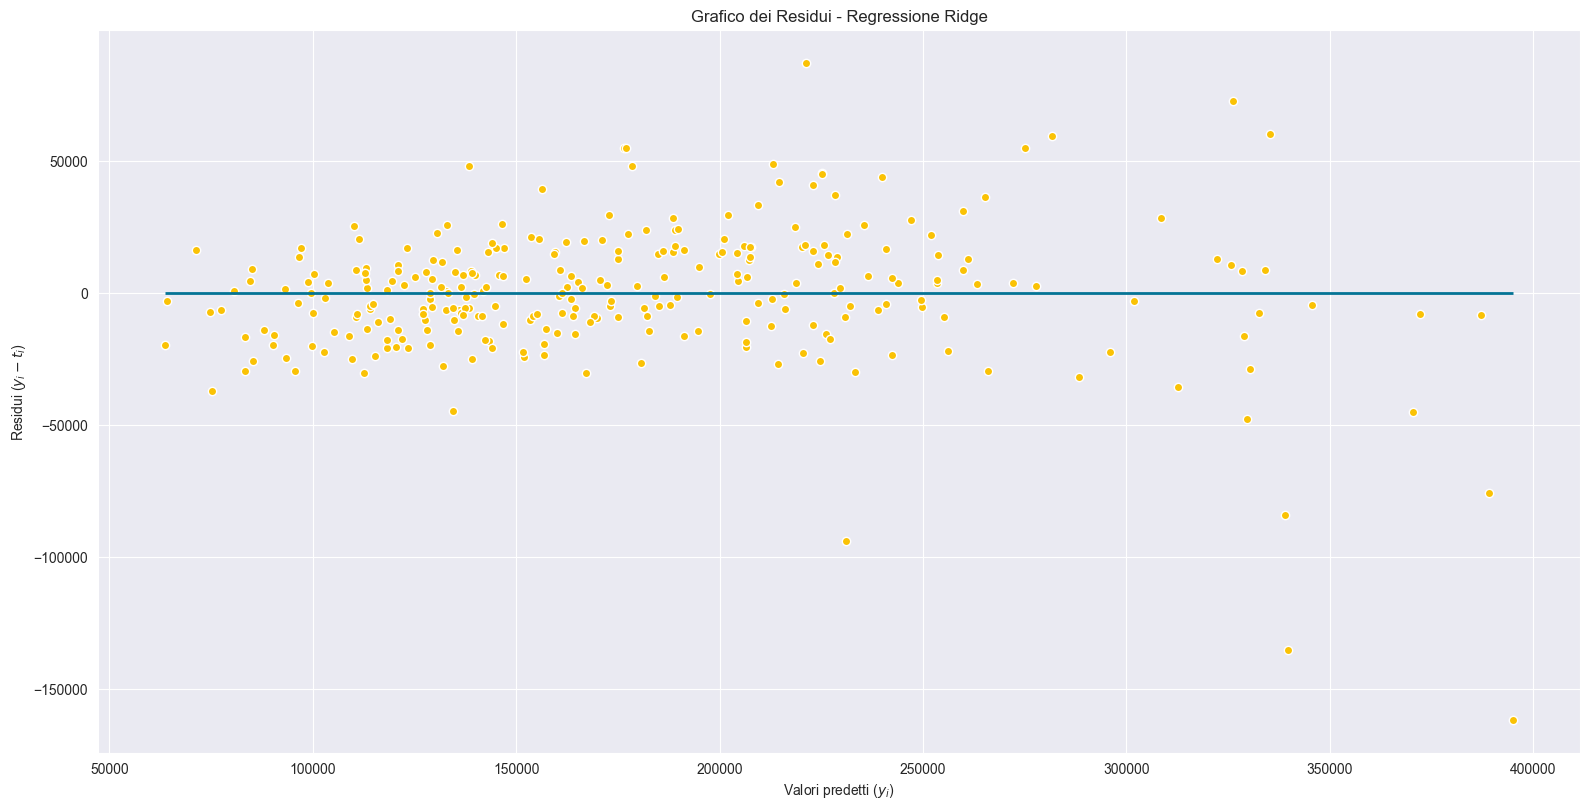

In [62]:
residual_plot(y_pred_ridge, dataset.y_test, 'Regressione Ridge')

### 6.4.2 Ridge polinomiale, con pca e feature selection
TrasformarMIAMO il dataset ridotto con fs e pca con le funzioni base polinomiali e verifichiamo se la regressione ridge polinomiale si comporta meglio rispetto a quella lineare.

In [63]:
degree = 3
X_train_fs_pca, X_test_fs_pca = apply_pca(dataset, k_pca=100, scaled=True)
X_poly_train_pca, X_poly_test_pca = polynomial_transformation(X_train_fs_pca, X_test_fs_pca, d=degree)
r2_ridge, rms_ridge, y_pred_poly_ridge, alpha_poly_ridge = _ridge_performance(X_train_fs_pca, X_test_fs_pca,
                                                                              dataset.y_train, dataset.y_test)

res_ridge = BestParameters(f"Ridge Regression Polynomial degree={degree}", 220, {'alpha': alpha_poly_ridge}, r2_ridge,
                           rms_ridge, None)
parameters.append(res_ridge)

Feature ridotte da (1168, 240) con PCA: (1168, 100)
Ridge regression -> r2 train 0.8495605553761116 - rms train 31387.057912603872 --- r2 test: 0.8388259550538179 rms_lasso test = 29322.818397129657 - best alpha: 10.0


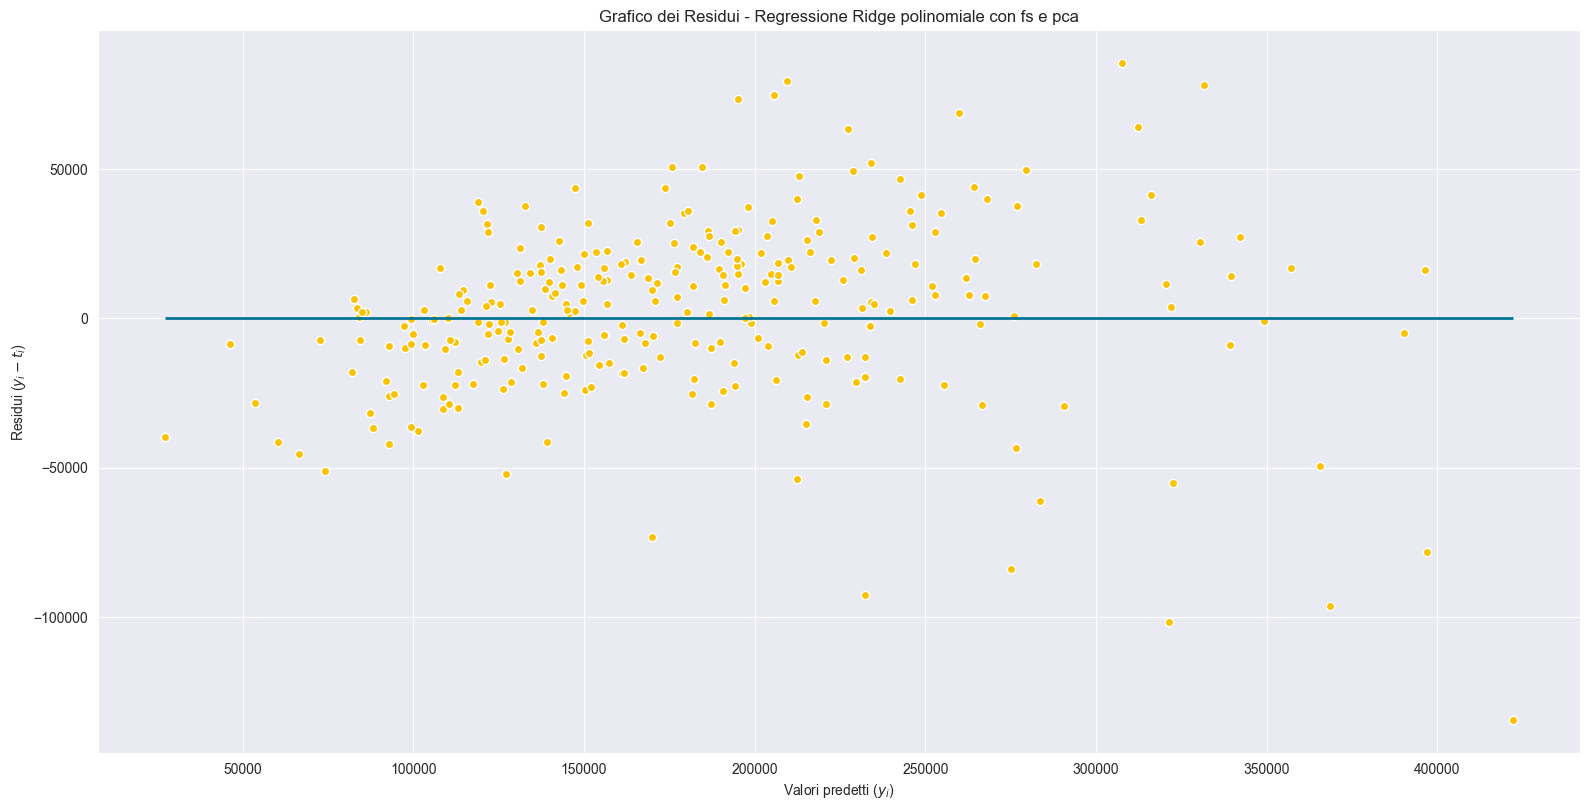

In [64]:
residual_plot(y_pred_poly_ridge, dataset.y_test, 'Regressione Ridge polinomiale con fs e pca')

Anche in questo caso, cerchiamo il migliore grado del polinomio e confrontiamo le metriche su training set e test set per visualizzare il grado dopo il quale si va in l'overfitting.

In [65]:
def best_ridge_poly_degree(dataset: Dataset, alpha=10.0, k_fs=10, k_pca=4, scaled=True):
    degrees = [1, 2, 3]
    if k_fs is None and k_pca is None:
        X_train_fs_pca = dataset.X_train_normalized if scaled else dataset.X_train
        X_test_fs_pca = dataset.X_test_normalized if scaled else dataset.X_test
    elif k_fs is None and k_pca is not None:
        X_train_fs_pca, X_test_fs_pca = apply_pca(dataset, k_pca=k_pca, scaled=scaled)
    elif k_fs is not None and k_pca is None:
        X_train_fs_pca, X_test_fs_pca = apply_fs(dataset, k_fs=k_fs, scaled=scaled)
    else:
        X_train_fs_pca, X_test_fs_pca = apply_fs_and_pca(dataset, k_fs=k_fs, k_pca=k_pca, scaled=scaled)
    best_r2 = 0.0
    best_rms = 0.0
    best_d = 0
    results = {"d": [], "r2": [], "rms": [], "r2 train": [], "rms train": []}
    for d in degrees:
        # qua non possiamo fare grid search perché il grado non è un parametro della linear regression, 
        # ma un iperparametro per trasformare il dataset iniziale
        X_poly_train_fs_pca, X_poly_test_fs_pca = polynomial_transformation(X_train_fs_pca, X_test_fs_pca, d=d)
        r2_train_poly, rms_train_poly, r2_test_poly, rms_test_poly, _ = performance_test(Ridge(alpha=alpha), dataset,
                                                                                         x_train_new=X_poly_train_fs_pca,
                                                                                         x_test_new=X_poly_test_fs_pca,
                                                                                         scaled=scaled)
        print(
            f"Polynomial Ridge Regression deg {d} -> r2 train = {r2_train_poly} - rms train = {rms_train_poly} --- r2 test = {r2_test_poly} rms test = {rms_test_poly}")
        results["d"].append(d)
        results["r2"].append(r2_test_poly)
        results["rms"].append(rms_test_poly)
        results["r2 train"].append(r2_train_poly)
        results["rms train"].append(rms_train_poly)
        if r2_test_poly > best_r2:
            best_r2 = r2_test_poly
            best_rms = rms_test_poly
            best_d = d
    return best_d, best_r2, best_rms, results


alpha_polyridge = 10.0
d_polyridge, r2_polyridge, rms_polyridge, res_polyridge = best_ridge_poly_degree(dataset, alpha=alpha_polyridge,
                                                                                 k_fs=None, k_pca=100, scaled=True)
print(
    f"Best degree for Polynomial Ridge regression: {d_polyridge} - best r2: {r2_polyridge} - best rms: {rms_polyridge}")
res_ridge = BestParameters(f"Polynomial Ridge Regression best degree={d_polyridge}", 220,
                           {'alpha': alpha_polyridge, 'degree': d_polyridge}, r2_polyridge, rms_polyridge, None)
parameters.append(res_ridge)

Feature ridotte da (1168, 240) con PCA: (1168, 100)
Polynomial Ridge Regression deg 1 -> r2 train = 0.8495099990091364 - rms train = 31392.331404303397 --- r2 test = 0.8372795621733033 rms test = 29463.152254874647
Polynomial Ridge Regression deg 2 -> r2 train = 0.9992801710457093 - rms train = 2171.122878531091 --- r2 test = 0.19973440521674724 rms test = 65339.413370953625
Polynomial Ridge Regression deg 3 -> r2 train = 0.9999998682542472 - rms train = 29.3723070533328 --- r2 test = 0.7289398899704644 rms test = 38026.90354561351
Best degree for Polynomial Ridge regression: 1 - best r2: 0.8372795621733033 - best rms: 29463.152254874647


Come miglior risultato si ottiene una regressione ridge lineare e non polinomiale.

## 6.5 Regressione ElasticNET
L'**Elastic-Net** è un metodo di regressione regolarizzato che combina linearmente le due penalità, *L1* e *L2*, dei metodi di regressione Lasso e Ridge.
- *'l1_ratio'*: determina la percentuale della nostra penalità L1 rispetto a $\alpha$. Quindi, per esempio, se $\alpha = 1$ e $L1_{ratio}$ = 0.4, la nostra penalità $L1$ sarà moltiplicata per 0.4 e la nostra penalità $L2$ sarà moltiplicata per $1 - L1_{ratio} = 0.6$

In questo caso abbiamo la regressione ridge se $L1_{ratio} = 0$ e la regressione lasso se $L1_{ratio} = 1$.

La proprietà più importante di Lasso è che produce pesi del modello sparsi, il che significa che i pesi possono essere impostati fino a 0.



### 6.5.1 ElasticNet Cross Validation
Valutiamo tramite **ElasticNetCV** le perfomance con il miglior **alpha** e il miglior **l1-ratio**:

In [66]:
from sklearn.linear_model import ElasticNetCV


def elasticnet_performance(dataset: Dataset, scaled=True) -> Tuple[Series, float, float, dict]:
    if not scaled:
        return _elasticnet_performance(dataset.X_train, dataset.X_test, dataset.y_train, dataset.y_test)
    else:
        return _elasticnet_performance(dataset.X_train_normalized, dataset.X_test_normalized, dataset.y_train,
                                  dataset.y_test)


def _elasticnet_performance(X_train, X_test, y_train, y_test) -> Tuple[Series, float, float, dict]:
    elasticnet_cv = ElasticNetCV(cv=5, random_state=42)
    elasticnet_cv.fit(X_train, y_train)
    y_pred_elasticnet_train = elasticnet_cv.predict(X_train)
    y_pred_elasticnet = elasticnet_cv.predict(X_test)

    r2_elasticnet_train = r2_score(y_true=y_train, y_pred=y_pred_elasticnet_train)
    rms_elasticnet_train = np.sqrt(mean_squared_error(y_true=y_train, y_pred=y_pred_elasticnet_train))

    r2_elasticnet = r2_score(y_true=y_test, y_pred=y_pred_elasticnet)
    rms_elasticnet = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred_elasticnet))
    print(
        f"ElasticNet regression -> r2 train {r2_elasticnet_train} - rms train {rms_elasticnet_train} --- r2 test: {r2_elasticnet} rms test = {rms_elasticnet} - best alpha: {elasticnet_cv.alpha_} - best l1-ratio: {elasticnet_cv.l1_ratio_}")
    params = {'alpha': elasticnet_cv.alpha_, 'l1_ratio': elasticnet_cv.l1_ratio_}
    return r2_elasticnet, rms_elasticnet, y_pred_elasticnet, params


print("ElasticNet without scaling")
r2_elasticnet, rms_elasticnet, y_pred_elasticnet, params_elasticnet = elasticnet_performance(dataset, scaled=False)
res_elasticnet = BestParameters(f"ElasticNet Regression no normalization", 220, params_elasticnet, r2_elasticnet, rms_elasticnet, None)
parameters.append(res_elasticnet)

print("ElasticNet with scaling")
r2_elasticnet, rms_elasticnet, y_pred_elasticnet_scaling, params_elasticnet_scaling = elasticnet_performance(dataset, scaled=True)
res_elasticnet = BestParameters(f"ElasticNet Regression with normalization", 220, params_elasticnet_scaling, r2_elasticnet, rms_elasticnet, None)
parameters.append(res_elasticnet)

ElasticNet without scaling
ElasticNet regression -> r2 train 0.5446903208253263 - rms train 54603.84050012264 --- r2 test: 0.5568762158143089 rms test = 48620.64192911798 - best alpha: 451513.6077351168 - best l1-ratio: 0.5
ElasticNet with scaling
ElasticNet regression -> r2 train 0.23322589344425793 - rms train 70860.37841987534 --- r2 test: 0.23560530934667379 rms test = 63858.246492805345 - best alpha: 128.06754655994453 - best l1-ratio: 0.5


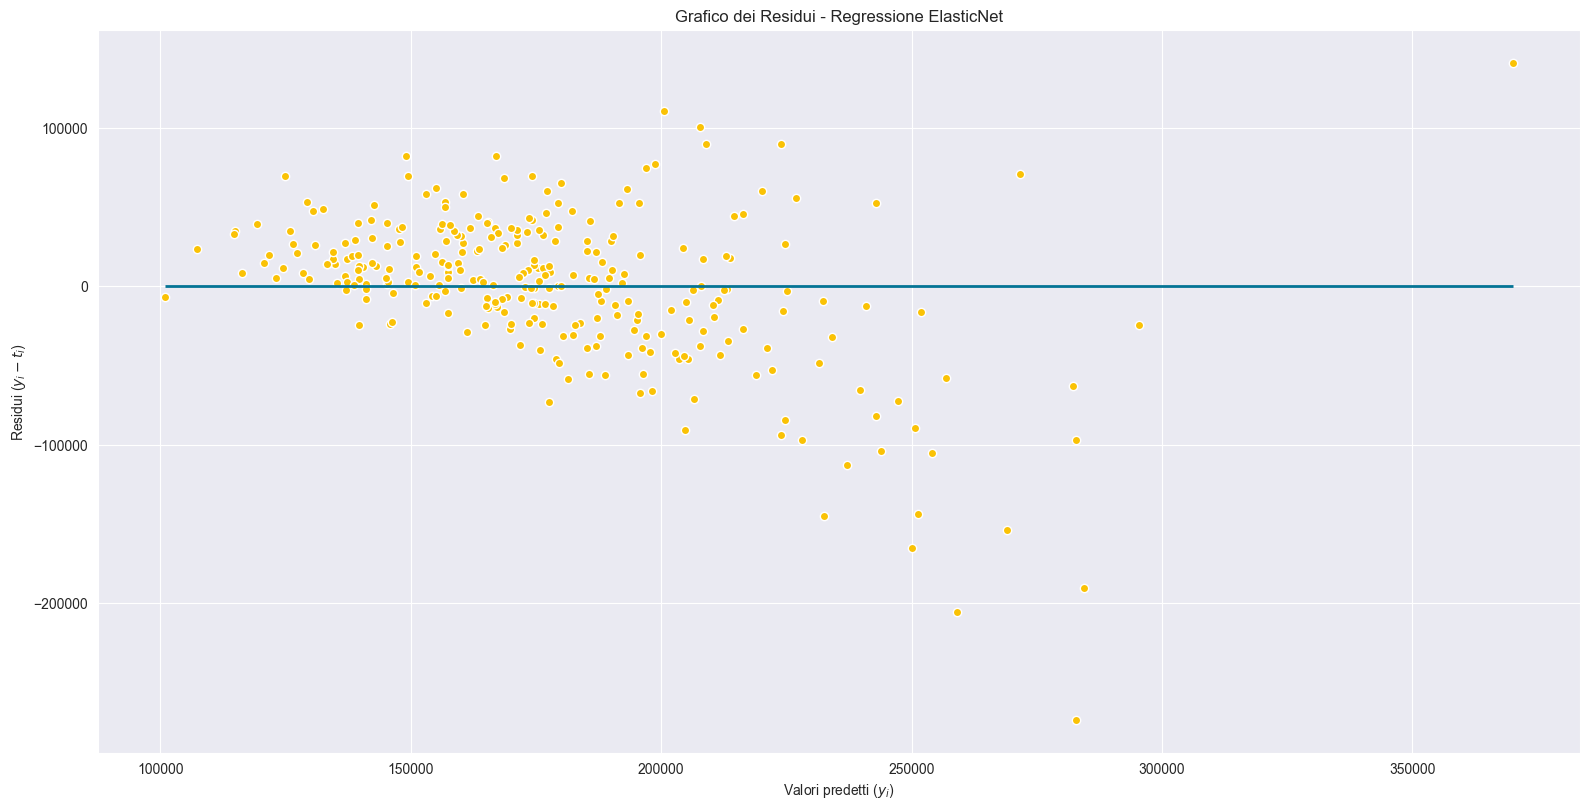

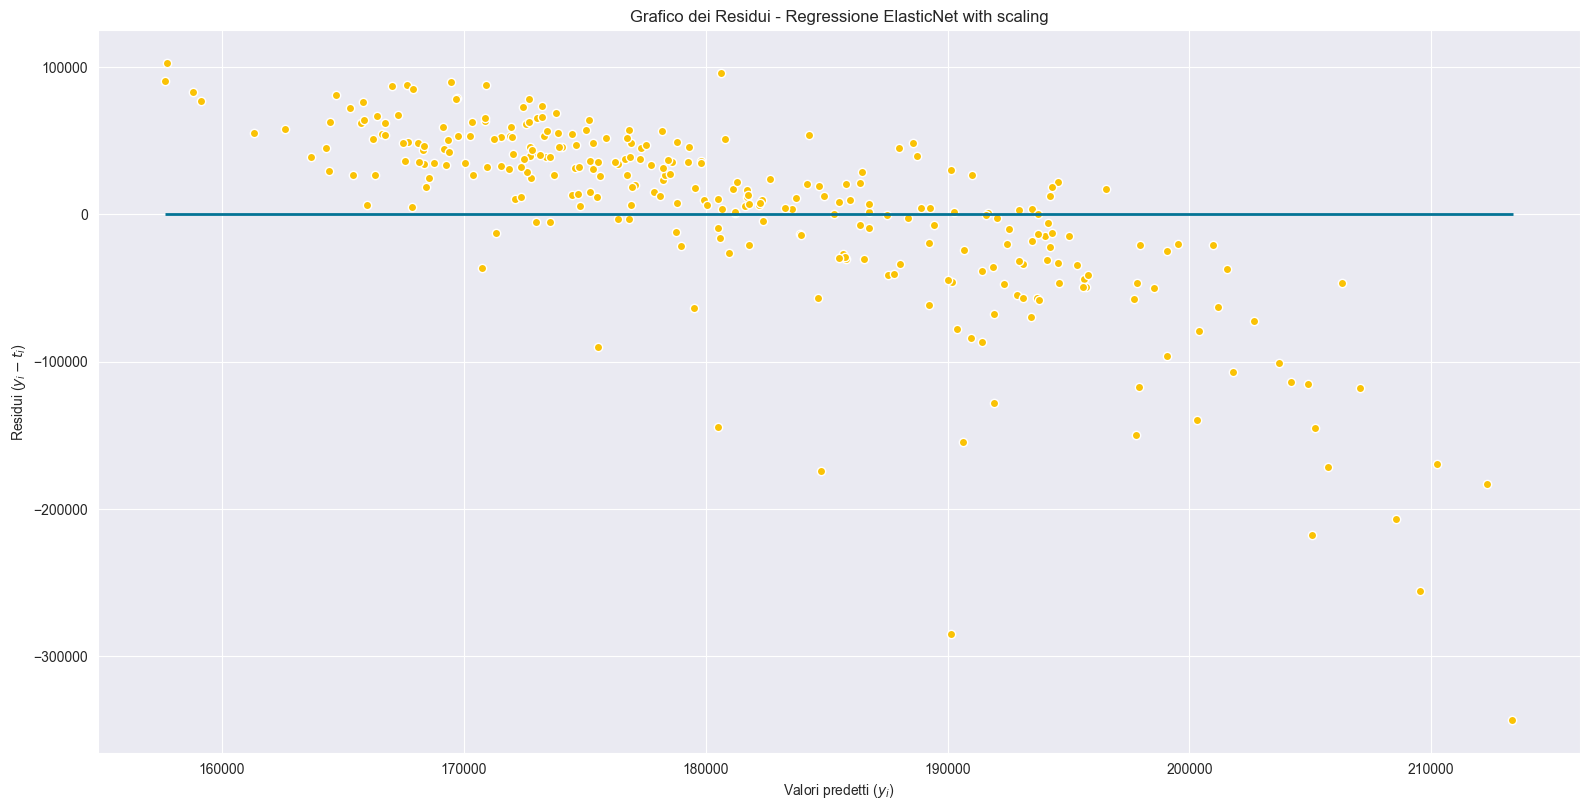

In [67]:
residual_plot(y_pred_elasticnet, dataset.y_test, 'Regressione ElasticNet')
residual_plot(y_pred_elasticnet_scaling, dataset.y_test, 'Regressione ElasticNet with scaling')

### 6.5.2 Performance test con pca, con/senza feature selection
Valutiamo il modello applicando sia **pca** e **feature selection**:

In [68]:
elastic_net_pca_fs = ElasticNet(alpha=params_elasticnet['alpha'], l1_ratio=params_elasticnet['l1_ratio'], random_state=42)

X_train_pca, X_test_pca, X_train_fs_pca, X_test_fs_pca = apply_fs_and_or_pca(dataset, k_fs=10, k_pca=4, scaled=False)
score1_elasticnet, rms1_elasticnet, y_pred_elastic_net1 = run_regression_train_test("ElasticNet normalized with PCA",
                                                                       elastic_net_pca_fs,
                                                                       dataset, X_train_pca,
                                                                       X_test_pca, scaled=False)

elastic_net_pca_fs = ElasticNet(alpha=params_elasticnet['alpha'], l1_ratio=params_elasticnet['l1_ratio'], random_state=42)
score2_elasticnet, rms2_elasticnet, y_pred_elastic_net2 = run_regression_train_test("ElasticNet normalized with FS and PCA",
                                                                       elastic_net_pca_fs,
                                                                       dataset,
                                                                       X_train_fs_pca, X_test_fs_pca, scaled=False)

res_elasticnet = BestParameters(f"ElasticNet Regression no normalization with pca", 220, params_elasticnet, score1_elasticnet, rms1_elasticnet, None)
parameters.append(res_elasticnet)
res_elasticnet = BestParameters(f"ElasticNet Regression no normalization with pca e fs", 220, params_elasticnet, score2_elasticnet, rms2_elasticnet, None)
parameters.append(res_elasticnet)

Feature ridotte da (1168, 240) con PCA: (1168, 4)
Feature selezionate:  (1168, 10)
Feature ridotte da 104 con MI e PCA:  (1168, 4)
ElasticNet normalized with PCA - r2: 0.5337137482310951 - rms: 55258.11339870607 - r2 test: 0.554951212898944 - rms test: 48726.13553280735
ElasticNet normalized with FS and PCA - r2: 0.5074845902690406 - rms: 56791.0187746899 - r2 test: 0.5432903042246178 - rms test: 49360.35492096844


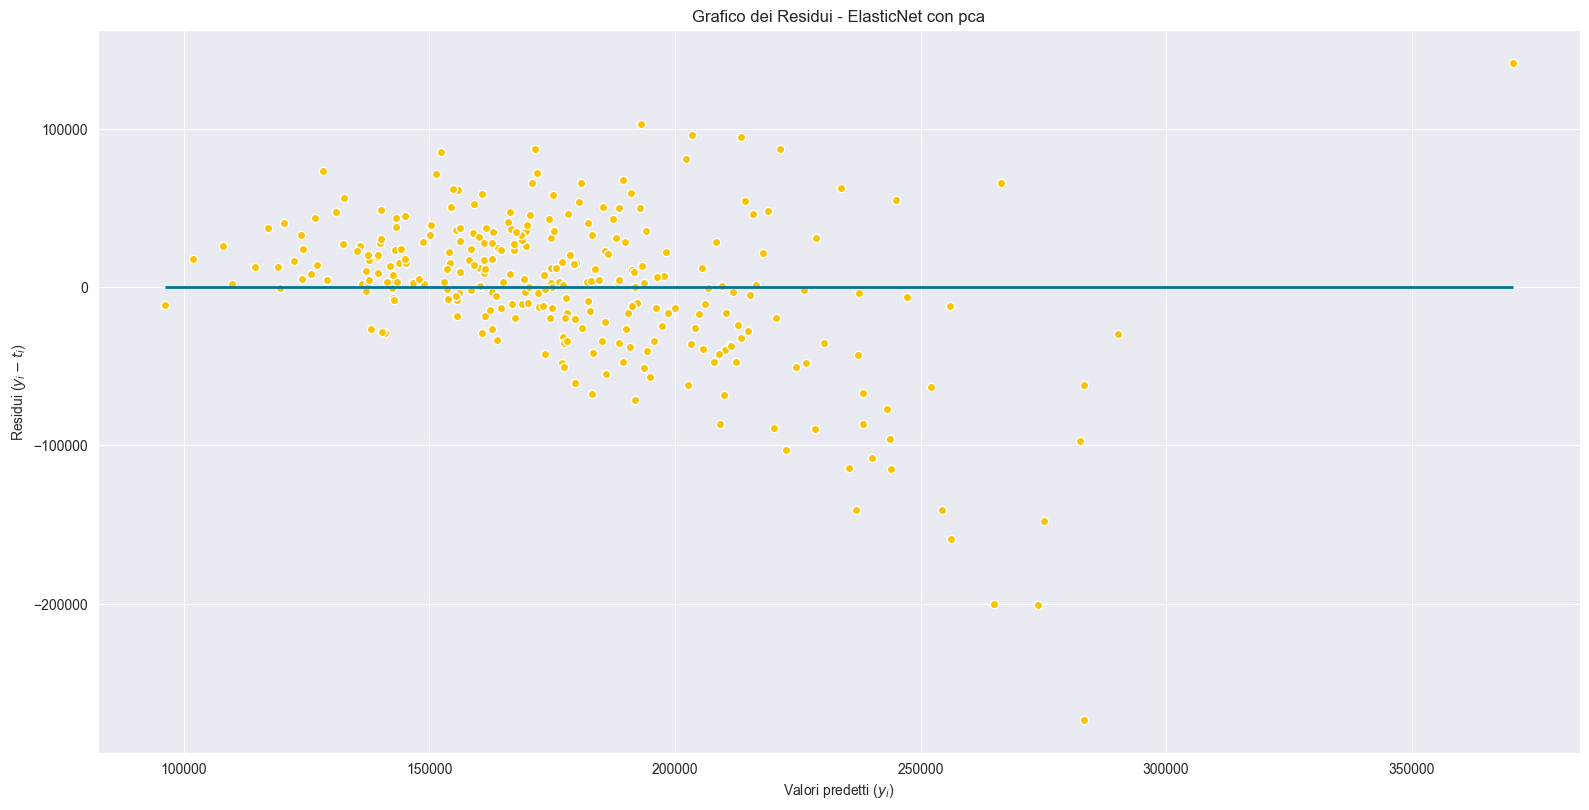

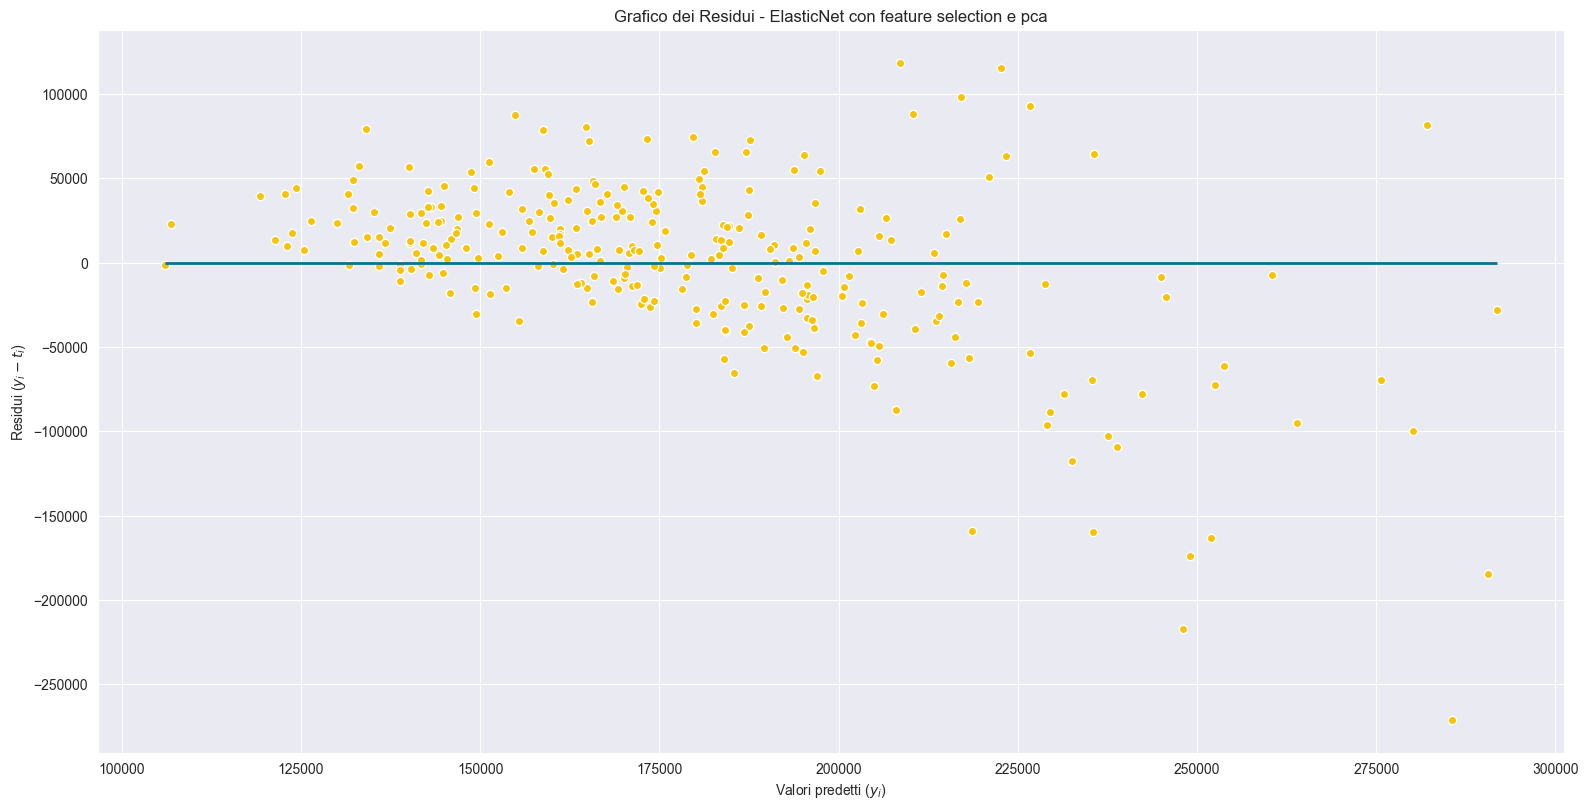

In [69]:
residual_plot(y_pred_elastic_net1, dataset.y_test, 'ElasticNet con pca')
residual_plot(y_pred_elastic_net2, dataset.y_test, 'ElasticNet con feature selection e pca')

## 6.6 Regressione SVR

Il **Support Vector Regression** (SVR) è un algoritmo di regressione basato sul concetto di Support Vector Machine (SVM). Mentre l'obiettivo principale di SVM è la classificazione, SVR viene utilizzato per la regressione, ovvero per prevedere un valore numerico continuo anziché una classe di appartenenza.

A differenza dei modelli di regressione lineare tradizionali che cercano di minimizzare gli errori medi quadratici, SVR si basa sul concetto di **massimizzare la "larghezza" di un intervallo**. L'obiettivo di SVR è quello di trovare l'iperpiano che meglio approssima i dati di training nel "tube" specificato. L'iperpiano ottimale viene individuato minimizzando una funzione di costo, che tiene conto sia dell'errore di regressione (la distanza tra i valori predetti e i valori reali) sia della complessità del modello (la larghezza del "tube" e il numero di punti che violano il "tube").

Parametri:
- **Cfloat**: default=1.0. Parametro di regolarizzazione. La forza della regolarizzazione è inversamente proporzionale a C. Deve essere strettamente positivo. La funzione costo è L2.
- **kernel**: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’. Specifica il tipo di funzione kernel da usare nell'algoritmo.
- **degree**: int, default=3. Grado del polinomio se il kernel è polinomiale. Deve essere non negativo. Viene ignorato da gli altri tipi di kernel diversi da 'poly'.
- **gamma**: {‘scale’, ‘auto’} or float, default=’scale’. Coefficiente Kernel per ‘rbf’, ‘poly’ and ‘sigmoid’.
    - se gamma='scale' (default) $gamma := 1 / (n_{features} \cdot X.var())$,
    - se ‘auto’, $gamma := 1 / n_{features}$
    - se float, $gamma \geq 0$.


In [89]:
from numpy import ndarray
from sklearn.model_selection import cross_validate


def svr_cv(X_train: DataFrame, y_train: Series, svm: SVR) -> tuple[Any, ndarray]:
    scores = cross_validate(svm, X_train, y_train, cv=10, scoring=('r2', 'neg_mean_squared_error'),
                            return_train_score=True)
    return scores['train_r2'].mean(), np.sqrt(scores['train_neg_mean_squared_error'].mean())

In [90]:
# classe per mantenere ordinati i parametri di SVR
class SVRParams:
    def __init__(self, C: float, kernel: str, poly_degree: int, gamma: str | float, max_iter: int) -> None:
        self.C = C
        self.kernel = kernel
        self.poly_degree = poly_degree
        self.gamma = gamma
        self.max_iter = max_iter

    def __str__(self):
        return f"C : {self.C:.2f}, kernel : {self.kernel}, poly_degree : {self.poly_degree}, gamma : {self.gamma:.2f}, max_iter : {self.max_iter}"

    def __repr__(self) -> str:
        return self.__str__()

    def default(self):
        return SVRParams(1, 'rbf', 0, 1, -1)

    def create_svr(self):
        return SVR(C=self.C, kernel=self.kernel, degree=self.poly_degree, gamma=self.gamma, max_iter=self.max_iter,
                   tol=0.01)

    def to_array(self, r2: float, rms: float, r2_test: float, rms_test: float):
        return [self.C, self.kernel, self.poly_degree, self.gamma, self.max_iter, r2, rms, r2_test, rms_test]

    def to_dict(self, r2: float, rms: float):
        return {"C": self.C, "kernel": self.kernel, "degree": poly_degree, "gamma": self.gamma,
                "max_iter": self.max_iter, "r2": r2, "rms": rms}


In [ ]:
def run_svr(params: SVRParams, folds: List[Fold], scores, curr_iter, total_iterations) -> tuple[
    float, float, DataFrame]:
    # creo il modello dai parametri scelti (mio metodo di utilita')
    svm = params.create_svr()
    r2_score_cv_sum = 0.0
    rms_score_cv_sum = 0.0
    r2_score_sum = 0.0
    rms_score_sum = 0.0
    for f in folds:
        dataset = Dataset(f.X_train, f.y_train, f.X_test, f.y_test)
        # valutazione con cross validation
        r2_score_cv, rms_score_cv = performance_cross_validation(svm, dataset, f.X_train_normalized_fs, scaled=True)
        r2_score_cv_sum += r2_score_cv
        rms_score_cv_sum += rms_score_cv
        # valutazione su testing
        r2_score_test, rms_score_test, _ = performance_test(svm, dataset, f.X_train_normalized_fs,
                                                            f.X_test_normalized_fs,
                                                            scaled=True)
        r2_score_sum += r2_score_test
        rms_score_sum += rms_score_test
    r2_score_cv = r2_score_cv_sum / len(folds)
    rms_score_cv = rms_score_cv_sum / len(folds)
    r2_score = r2_score_sum / len(folds)
    rms_score = rms_score_sum / len(folds)

    # aggiungo al dataframe i parametri appena usati e il punteggio.
    new_row_df = pd.DataFrame([params.to_array(r2_score_cv, rms_score_cv, r2_score, rms_score)],
                              columns=["C", "kernel", "poly_degree", "gamma", 'max_iter', 'r2', 'rms', 'r2_test',
                                       'rms_test'])
    scores = pd.concat([scores, new_row_df], axis=0)

    print(
        f"{curr_iter} of {total_iterations} - PARAMS [{params}] - R2: {r2_score_cv:.6f} - rms: {rms_score_cv} -  R2 Test: {r2_score:.6f} - rms test: {rms_score:.6f}")
    return r2_score, rms_score, scores


# metodo che trova i migliori parametri di SVR
def find_best_svr_params(folds: List[Fold], k_features=129) -> Tuple[
    pd.DataFrame, Tuple[SVRParams, float], float, float]:
    # questi sono i parametri su cui facciamo grid search
    C_values = [0.1, 0.5, 1, 1.5, 2]
    kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
    poly_degree_values = [2, 3]
    gamma_values = [0.1, 1, 4]
    max_iter = -1

    # assegno i tipi numpy e poi trasformo in dataframe
    dtypes = np.dtype(
        [
            ("C", float),
            ("kernel", str),
            ("poly_degree", int),
            ("gamma", float),
            ('max_iter', int),
            ('r2', float),
            ('rms', float),
            ('r2_test', float),
            ('rms_test', float)
        ]
    )
    # calcolo il numero di giri da fare in totale:
    total_iterations = (len(C_values) * len(gamma_values)) * (len(poly_degree_values) + len(kernel_values) - 1)
    curr_iter = 0

    # eseguiamo la feature selection su tutti i fold e manteniamola in memoria, per ridurre il tempo di esecuzione totale
    folds = do_fs_for_each_fold(folds, k_features)

    scores: pd.DataFrame[float, str, int, float, int, float, float, float, float] = pd.DataFrame(
        np.empty(0, dtype=dtypes))
    best_score_params = {}
    best_r2 = 0.0
    best_rms = 0.0
    # troviamo i migliori parametri
    for c in C_values:
        for kernel in kernel_values:
            for gamma in gamma_values:
                if kernel == 'poly':
                    for poly_degree in poly_degree_values:
                        curr_iter += 1
                        # metto insieme i parametri nella classe, per comodita'
                        params = SVRParams(c, kernel, poly_degree, gamma, max_iter)
                        r2_score, rms_score, scores = run_svr(params, folds, scores, curr_iter, total_iterations)
                        if r2_score > best_r2:
                            best_r2 = r2_score
                            best_rms = rms_score
                            best_score_params = params.to_dict(r2_score, rms_score)

                else:
                    curr_iter += 1
                    # metto insieme i parametri nella classe, per comodita'. Il degree e' sempre 0
                    params = SVRParams(c, kernel, 0, gamma, max_iter)
                    r2_score, rms_score, scores = run_svr(params, folds, scores, curr_iter, total_iterations)
                    if r2_score > best_r2:
                        best_r2 = r2_score
                        best_rms = rms_score
                        best_score_params = params.to_dict(r2_score, rms_score)

    return best_score_params, scores, best_r2, best_rms

In [ ]:
k = 129
best_score_params_svr, scores_svr, best_r2, best_rms, y_pred_svm = find_best_svr_params(folds, k_features=k)
print(f"The BESTEST model is: {best_score_params_svr}")

In [ ]:
residual_plot(y_pred_svm, dataset.y_test, 'SVR')

In [ ]:
# pars_svr = BestParameters("SVM Regression", k, 0.0, best_score_params_svr, best_r2, best_rms, None)
pars_svr = BestParameters("SVM Regression", 129, 0.0, best_score_params_svr, 0.6619067965961025, 45572.50279942541,
                          None)
parameters.append(pars_svr)

In [ ]:
# NON CANCELLARE - serve per non perdere tempo a rieseguire ogni volta
scores_svr = {
    'C': [0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.50, 0.50, 0.50,
          0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00,
          1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 1.50,
          1.50, 1.50, 1.50, 1.50, 1.50, 1.50, 2.00, 2.00, 2.00, 2.00, 2.00, 2.00, 2.00, 2.00, 2.00, 2.00, 2.00, 2.00,
          2.00, 2.00, 2.00],
    'kernel': ["linear", "linear", "linear", "poly", "poly", "poly", "poly", "poly", "poly", "rbf", "rbf", "rbf",
               "sigmoid", "sigmoid", "sigmoid", "linear", "linear", "linear", "poly", "poly", "poly", "poly", "poly",
               "poly", "rbf", "rbf", "rbf", "sigmoid", "sigmoid", "sigmoid", "linear", "linear", "linear", "poly",
               "poly", "poly", "poly", "poly", "poly", "rbf", "rbf", "rbf", "sigmoid", "sigmoid", "sigmoid", "linear",
               "linear", "linear", "poly", "poly", "poly", "poly", "poly", "poly", "rbf", "rbf", "rbf", "sigmoid",
               "sigmoid", "sigmoid", "linear", "linear", "linear", "poly", "poly", "poly", "poly", "poly", "poly",
               "rbf", "rbf", "rbf", "sigmoid", "sigmoid", "sigmoid"],
    'gamma': [0.10, 1.00, 4.00, 0.10, 0.10, 1.00, 1.00, 4.00, 4.00, 0.10, 1.00, 4.00, 0.10, 1.00, 4.00, 0.10, 1.00,
              4.00, 0.10, 0.10, 1.00, 1.00, 4.00, 4.00, 0.10, 1.00, 4.00, 0.10, 1.00, 4.00, 0.10, 1.00, 4.00, 0.10,
              0.10, 1.00, 1.00, 4.00, 4.00, 0.10, 1.00, 4.00, 0.10, 1.00, 4.00, 0.10, 1.00, 4.00, 0.10, 0.10, 1.00,
              1.00, 4.00, 4.00, 0.10, 1.00, 4.00, 0.10, 1.00, 4.00, 0.10, 1.00, 4.00, 0.10, 0.10, 1.00, 1.00, 4.00,
              4.00, 0.10, 1.00, 4.00, 0.10, 1.00, 4.00],
    'r2': [-0.030938, -0.030938, -0.030938, -0.047836, 0.008004, 0.188916, 0.988291, 0.835069, 0.999969, -0.051199,
           -0.051199, -0.051199, -0.050374, -0.050252, -0.050250, 0.043285, 0.043285, 0.043285, -0.034365, 0.156743,
           0.609197, 0.999291, 0.961535, 0.999986, -0.051190, -0.051192, -0.051192, -0.047049, -0.046451, -0.046445,
           0.124477, 0.124477, 0.124477, -0.018245, 0.282279, 0.767856, 0.999778, 0.981736, 0.999987, -0.051180,
           -0.051183, -0.051183, -0.042947, -0.041721, -0.041707, 0.190095, 0.190095, 0.190095, -0.003260, 0.377667,
           0.827049, 0.999869, 0.988697, 0.999987, -0.051169, -0.051174, -0.051174, -0.038829, -0.037049, -0.037023,
           0.249071, 0.249071, 0.249071, 0.011295, 0.456382, 0.860832, 0.999901, 0.992135, 0.999988, -0.051159,
           -0.051165, -0.051165, -0.034753, -0.032400, -0.032371],
    'rms': [80619.63493132466, 80619.63493132466, 80619.63493132466, 81277.59875909032, 79082.27430349591,
            71506.97516462737, 8553.074005422484, 32225.852382753692, 393.05728588008407, 81407.89032980999,
            81407.90260804487, 81407.90272725876, 81375.94168107965, 81371.2119628305, 81371.15960350385,
            77663.3533258768, 77663.3533258768, 77663.3533258768, 80753.4932088808, 72909.95483515914,
            49619.43772221328, 2081.7427431422343, 15542.9178571227, 227.0935414931767, 81407.56478577887,
            81407.62605801653, 81407.6266540685, 81247.05073924879, 81223.84420869769, 81223.61408810294,
            74295.13733933147, 74295.13733933147, 74295.13733933147, 80121.79435564153, 67257.98720701085,
            38234.88324368257, 1149.9621638688543, 10697.325613944915, 213.12600110524514, 81407.15746431677,
            81407.28037232796, 81407.28156438582, 81087.68409254527, 81039.97553918898, 81039.41207391894,
            71456.90795679056, 71456.90795679056, 71456.90795679056, 79530.257048455, 62624.535871147134,
            33000.1377203933, 866.4364201963305, 8406.641301118492, 211.1499497557921, 81406.75011589061,
            81406.93468869386, 81406.93647670886, 80927.486453443, 80858.1155983258, 80857.11754703017,
            68805.9774767959, 68805.9774767959, 68805.9774767959, 78951.41984000427, 58525.28794019341,
            29601.127374498563, 738.9366524720843, 7003.937103954352, 203.91914236272837, 81406.34272120155,
            81406.58900711211, 81406.59139103765, 80768.63470906632, 80676.7935808189, 80675.66943402504]
}

In [ ]:
# print(best_score_params_svr)
# 
best_score_params_svr = {'C': 2, 'kernel': 'poly', 'degree': 3, 'gamma': 1, 'max_iter': -1, 'r2': 0.6619067965961025,
                         'rms': 45572.50279942541}

In [ ]:
plt.figure(figsize=(16, 9))
plt.subplot(2, 2, 1)
simple_plot_scores(x=scores_svr["C"], y=scores_svr["r2"], label="$R^2$", title="SVM Regression - C vs r2")
plt.subplot(2, 2, 2)
simple_plot_scores(x=scores_svr["gamma"], y=scores_svr["r2"], label="$R^2$", title="SVM Regression - gamma vs r2")
plt.subplot(2, 2, 3)
simple_plot_scores(x=scores_svr["C"], y=scores_svr["rms"], label="$E_{rms}$", title="SVM Regression - C vs Erms")
plt.subplot(2, 2, 4)
simple_plot_scores(x=scores_svr["gamma"], y=scores_svr["rms"], label="$E_{rms}$",
                   title="SVM Regression - gamma vs Erms")
plt.tight_layout()  # fa in modo che ci sia spazio tra un plot e l'altro

Le performance del training e test sul modello coi migliori parametri.

In [ ]:
mean_r2 = 0.0
mean_rms = 0.0
svm_regression = SVRParams(pars_svr.other['C'], pars_svr.other['kernel'], pars_svr.other['degree'],
                           pars_svr.other['gamma'], pars_svr.other['max_iter']).create_svr()
for i in range(0, len(folds)):
    dataset = Dataset(folds[i].X_train, folds[i].y_train, folds[i].X_test, folds[i].y_test)
    r2_cv_svm, rms_cv_svm = performance_cross_validation(svm_regression, dataset)
    print(f"SVM Regression CV -> r2 = {r2_cv_svm} rms = {rms_cv_svm}")
    mean_r2 += r2_cv_svm
    mean_rms += rms_cv_svm
mean_r2 = mean_r2 / len(folds)
mean_rms = mean_rms / len(folds)
print(f"SVM Regression mean CV: r2 = {mean_r2} rms = {mean_rms}")

In [ ]:
mean_r2 = 0.0
mean_rms = 0.0
svm_regression = SVRParams(pars_svr.other['C'], pars_svr.other['kernel'], pars_svr.other['degree'],
                           pars_svr.other['gamma'], pars_svr.other['max_iter']).create_svr()
for i in range(0, len(folds)):
    dataset = Dataset(folds[i].X_train, folds[i].y_train, folds[i].X_test, folds[i].y_test)
    r2_svm, rms_svm, y_pred_svm = performance_test(svm_regression, dataset)
    print(f"SVM Regression Test -> r2 = {r2_svm} rms = {rms_svm}")
    mean_r2 += r2_svm
    mean_rms += rms_svm
mean_r2 = mean_r2 / len(folds)
mean_rms = mean_rms / len(folds)
print(f"SVM Regression mean Test: r2 = {mean_r2} rms = {mean_rms}")

### 6.6.1 RandomizedSearchCV

In [ ]:
params_svr = {
    'C': [0.1, 0.5, 1, 1.5, 2],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3],
    'gamma': [0.1, 1, 4]
}

print("SVR RandomizedSearch no normalization")
r2_rs_svr, best_param_svr = randomized_searchcv(SVR(), dataset, params_svr, scaled= False)
print(f"Miglior parametri: r2= {r2_rs_svr}, miglior parametri: {best_param_svr}")

print("SVR RandomizedSearch with normalization")
r2_rs_svr, best_param_svr_norm = randomized_searchcv(SVR(), dataset, params_svr)
print(f"Miglior parametri: r2= {r2_rs_svr}, miglior parametri: {best_param_svr_norm}")

SVR RandomizedSearch no normalization


### 6.6.2 Performance test

In [ ]:
print("SVR no normalization")
svr = SVR(C=best_param_svr['C'], kernel=best_param_svr['kernel'], gamma=best_param_svr['gamma'], degree=best_param_svr['degree'] )
r2_svr, rms_svr, r2_svr_test, rms_svr_test, y_pred_svr1 = performance_test(svr, dataset)
print(f"SVR -> r2: {r2_svr} - rms: {rms_svr} - r2 test: {r2_svr_test}, - rms test: {rms_svr_test}")
res_svr = BestParameters(f"SVR Regression no normalization", 220, best_param_svr, r2_svr_test, rms_svr_test, None)
parameters.append(res_svr)

print("SVR with normalization")
svr = SVR(C=best_param_svr_norm['C'], kernel=best_param_svr_norm['kernel'], gamma=best_param_svr_norm['gamma'], degree=best_param_svr_norm['degree'] )
r2_svr, rms_svr, r2_svr_test, rms_svr_test, y_pred_svr2 = performance_test(svr, dataset)
print(f"SVR -> r2: {r2_svr} - rms: {rms_svr} - r2 test: {r2_svr_test}, - rms test: {rms_svr_test}")
res_svr = BestParameters(f"SVR Regression with normalization", 220, best_param_svr_norm, r2_svr_test, rms_svr_test, None)
parameters.append(res_svr)

In [ ]:
residual_plot(y_pred_svr1, dataset.y_test, f'SVR: {best_param_svr}')
residual_plot(y_pred_svr2, dataset.y_test, f'SVR: {best_param_svr_norm}')

## 6.7 Regressione KNN
Il modello **K-nearest neighbors** è un metodo parametrico che cerca i K campioni più simili al punto di input di cui vogliamo stimare l'output (ovvero la variabile dipendente) e ne calcola la media.

I parametri sono:
- **n_neighbors**: indica il numero di vicini più vicini per la stima di un punto. Un valore alto porta a una decisione più stabile ma potenzialmente meno accurata. Al contrario, un valore basso di n_neighbors porta a decisioni più flessibili, ma più soggette al rumore nei dati.
- **weights**: indica il peso assegnato a ciascun vicino più prossimo. I possibili valori sono:
  - **'uniform'**, dove tutti i vicini hanno lo stesso peso;
  - **'distance'**, dove il peso di un vicino diminuisce all'aumentare della distanza dal punto di stima.
- **algorithm**: indica l'algoritmo utilizzato per trovare i vicini. I possibili valori sono:
    - **'ball_tree'**, che utilizza un albero di sfere per trovare i vicini più prossimi;
    - **'kd_tree'**, che utilizza un albero KD per trovare i vicini più prossimi;
    - **'brute'**, se il numero di punti è relativamente piccolo,  calcola esplicitamente le distanze tra tutti i punti e seleziona i vicini più prossimi.
- **p**: indica il tipo di distanza.
    - se p=1, utilizza la distanza di Manhattan;
    - se p=2, utilizza la distanza Euclidea;
    - se p arbitrario si utilizza la distanza Minkowski.


### 6.7.1 GridSearchCV

Considerare tutti i parametri per la valutazione del test porta ad avere un $r^2$ sul training pari a 1 un $r^2$ sul test molto scarso; questa è la conferma che il modello è in overfitting e non è in grado di generalizzare bene su nuovi dati di test.
Consideriamo solo **n_neighbors**:

In [39]:
params_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # Distance -> 1: Manhattan, 2: Euclidean, 3: Minkowski
}

params_knn1 = {
    'n_neighbors': [3, 5, 7, 9, 11]
}

print("KNN without normalization")
r2_gs_knn, best_param_knn = grid_search(KNeighborsRegressor(), dataset, params_knn1, scaled=False)
print(f"KNN regression -> r2: {r2_gs_knn} - best parameters: {best_param_knn}")

print("KNN with normalization")
r2_gs_knn_norm, best_param_knn_norm = grid_search(KNeighborsRegressor(), dataset, params_knn1)
print(f"KNN regression -> r2: {r2_gs_knn_norm} - best parameters: {best_param_knn_norm}")

KNN without normalization
KNN regression -> r2: 0.6250911927969938 - best parameters: {'n_neighbors': 7}
KNN with normalization
KNN regression -> r2: 0.6989689324729528 - best parameters: {'n_neighbors': 9}


### 6.7.2 Performance test

In [40]:
print("KNN no normalization")
knn_regression = KNeighborsRegressor(n_neighbors=best_param_knn['n_neighbors'])
r2_knn, rms_knn, r2_knn_test, rms_knn_test, y_pred_knn1 = performance_test(knn_regression, dataset)
print(f"KNN Regression -> r2: {r2_knn} - rms: {rms_knn} - r2 test: {r2_knn_test}, - rms test: {rms_knn_test}")
res_knn = BestParameters(f"KNN Regression no normalization", 220, best_param_knn, r2_knn_test, rms_knn_test, None)
parameters.append(res_knn)

print("KNN with normalization")
knn_regression = KNeighborsRegressor(n_neighbors=best_param_knn_norm['n_neighbors'])
r2_knn, rms_knn, r2_knn_test, rms_knn_test, y_pred_knn2 = performance_test(knn_regression, dataset)
print(f"KNN Regression -> r2: {r2_knn} - rms: {rms_knn} - r2 test: {r2_knn_test}, - rms test: {rms_knn_test}")
res_knn = BestParameters(f"KNN Regression with normalization", 220, best_param_knn_norm, r2_knn_test, rms_knn_test, None)
parameters.append(res_knn)

KNN no normalization
KNN Regression -> r2: 0.7248927584474134 - rms: 42444.435225406385 - r2 test: 0.6441454989413946, - rms test: 43570.68519102627
KNN with normalization
KNN Regression -> r2: 0.6973746465625497 - rms: 44516.64259635042 - r2 test: 0.6228381288953388, - rms test: 44856.15551591859


In [ ]:
residual_plot(y_pred_knn1, dataset.y_test, f'KNN Regression: {best_param_knn}')
residual_plot(y_pred_knn2, dataset.y_test, f'KNN Regression: {best_param_knn_norm}')

### 6.7.3 Performance test con pca, con/senza feature selection
Valutiamo il modello con dataset non normalizzato con pca e feature selection:

In [44]:
print("KNN no normalization")
knn_pca_fs = KNeighborsRegressor(n_neighbors=best_param_knn['n_neighbors'])
X_train_pca, X_test_pca, X_train_fs_pca, X_test_fs_pca = apply_fs_and_or_pca(dataset, k_fs=10, k_pca=4)
score1_knn, rms1_knn, y_pred_knn1 = run_regression_train_test("knn with PCA", knn_pca_fs, dataset, X_train_pca,
                                                       X_test_pca, scaled=False)

knn_pca_fs = KNeighborsRegressor(n_neighbors=best_param_knn['n_neighbors'])
score2_knn, rms2_knn, y_pred_knn2 = run_regression_train_test("knn with FS and PCA", knn_pca_fs, dataset,
                                                       X_train_fs_pca, X_test_fs_pca, scaled=False)

res_knn = BestParameters(f"KNN Regression no normalization with pca", 220, best_param_knn, score1_knn, rms1_knn, None)
parameters.append(res_knn)
res_knn = BestParameters(f"KNN Regression no normalization with pca e fs", 220, best_param_knn, score2_knn, rms2_knn, None)
parameters.append(res_knn)

KNN no normalization
Feature ridotte da (1168, 240) con PCA: (1168, 4)
Feature selezionate:  (1168, 10)
Feature ridotte da 104 con MI e PCA:  (1168, 4)
knn with PCA - r2: 0.7173179989531486 - rms: 43024.79665677855 - r2 test: 0.6267257566635671 - rms test: 44624.377399311794
knn with FS and PCA - r2: 0.7220452511546174 - rms: 42663.53106362591 - r2 test: 0.6740477174353167 - rms test: 41699.91515223828


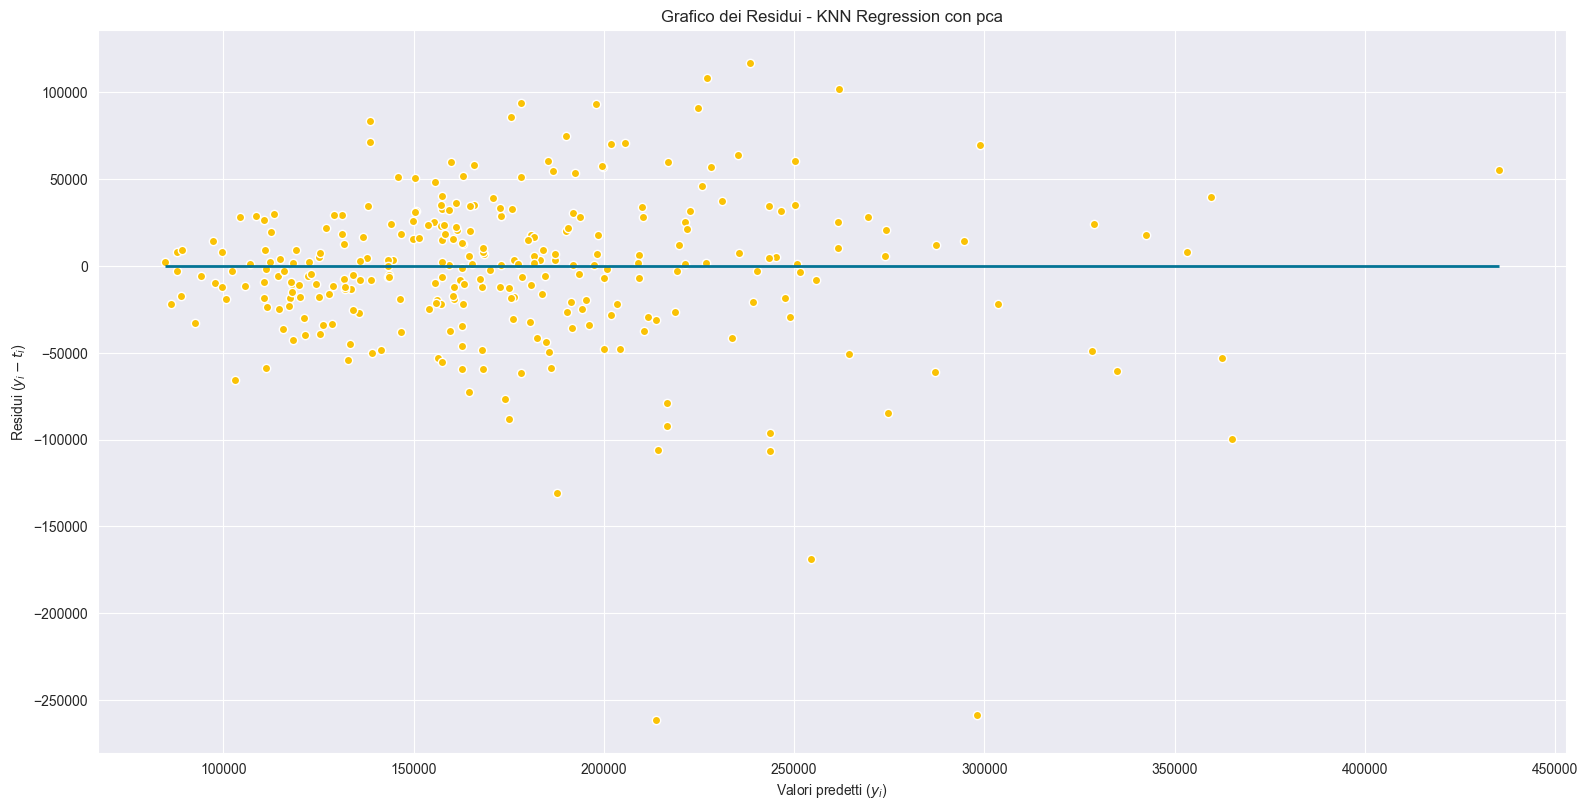

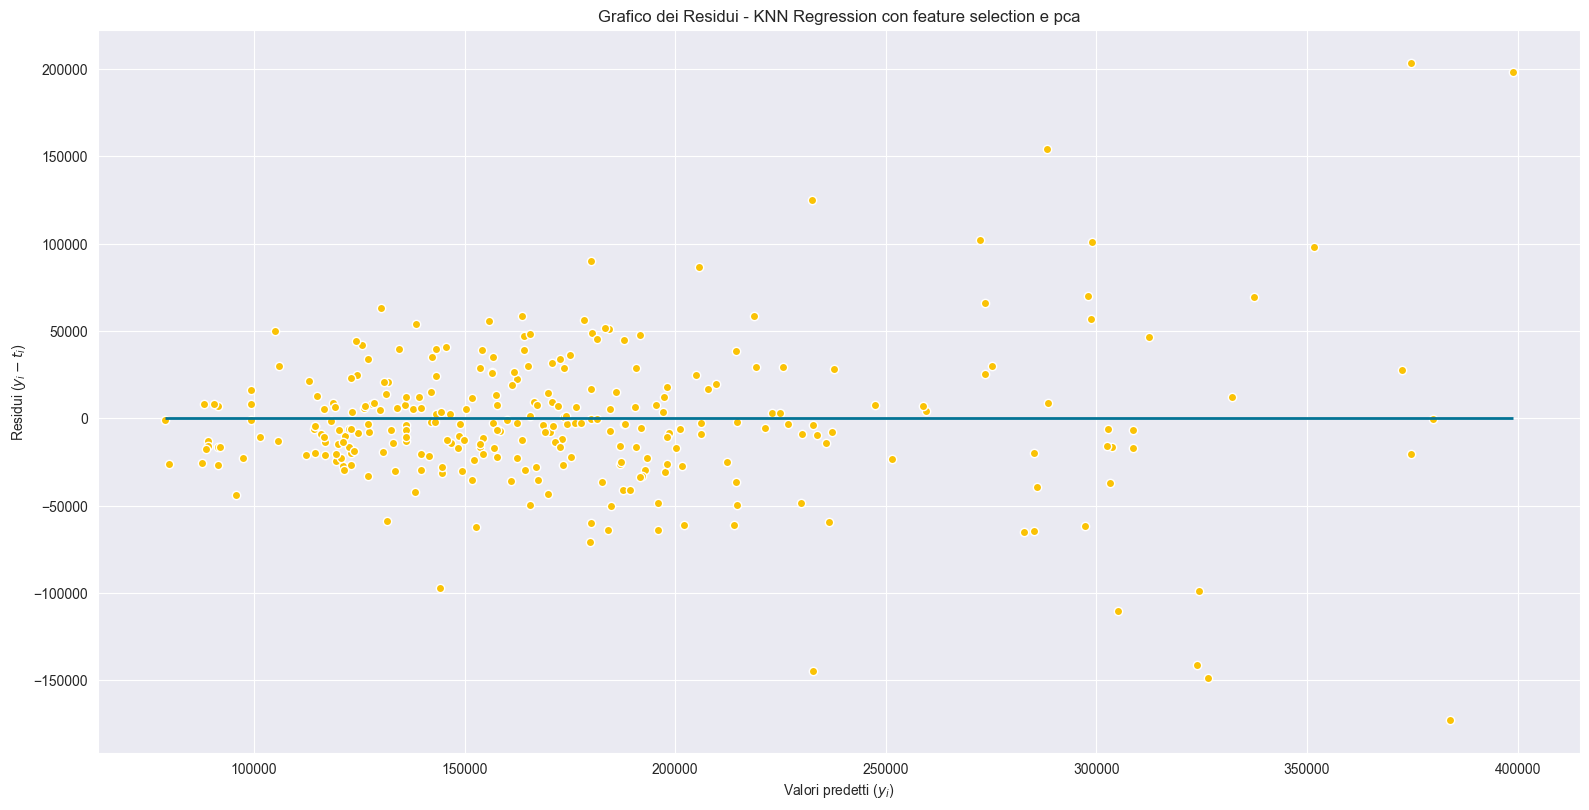

In [46]:
residual_plot(y_pred_knn1, dataset.y_test, 'KNN Regression con pca')
residual_plot(y_pred_knn2, dataset.y_test, 'KNN Regression con feature selection e pca')

Valutiamo il modello con dataset normalizzato con pca e feature selection:

In [64]:
print("KNN with normalization")
knn_pca_fs = KNeighborsRegressor(n_neighbors=best_param_knn_norm['n_neighbors'])
X_train_pca, X_test_pca, X_train_fs_pca, X_test_fs_pca = apply_fs_and_or_pca(dataset, k_fs=10, k_pca=4, scaled=True)
score3_knn, rms3_knn, y_pred_knn3 = run_regression_train_test("knn with PCA", knn_pca_fs, dataset, X_train_pca,
                                                       X_test_pca)

knn_pca_fs = KNeighborsRegressor(n_neighbors=best_param_knn_norm['n_neighbors'])
score4_knn, rms4_knn, y_pred_knn4 = run_regression_train_test("knn with FS and PCA", knn_pca_fs, dataset,
                                                       X_train_fs_pca, X_test_fs_pca)

res_knn = BestParameters(f"KNN Regression normalization with pca", 220, best_param_knn_norm, score3_knn, rms3_knn, None)
parameters.append(res_knn)
res_knn = BestParameters(f"KNN Regression normalization with pca e fs", 220, best_param_knn_norm, score4_knn, rms4_knn, None)
parameters.append(res_knn)

KNN with normalization
Feature ridotte da (1168, 240) con PCA: (1168, 4)
Feature selezionate:  (1168, 10)
Feature ridotte da 104 con MI e PCA:  (1168, 4)
knn with PCA - r2: 0.8252329620300816 - rms: 33829.80627464616 - r2 test: 0.7764826382789065 - rms test: 34531.36843940697
knn with FS and PCA - r2: 0.8497750520463604 - rms: 31364.674085967014 - r2 test: 0.8578595281464276 - rms test: 27537.02598446011


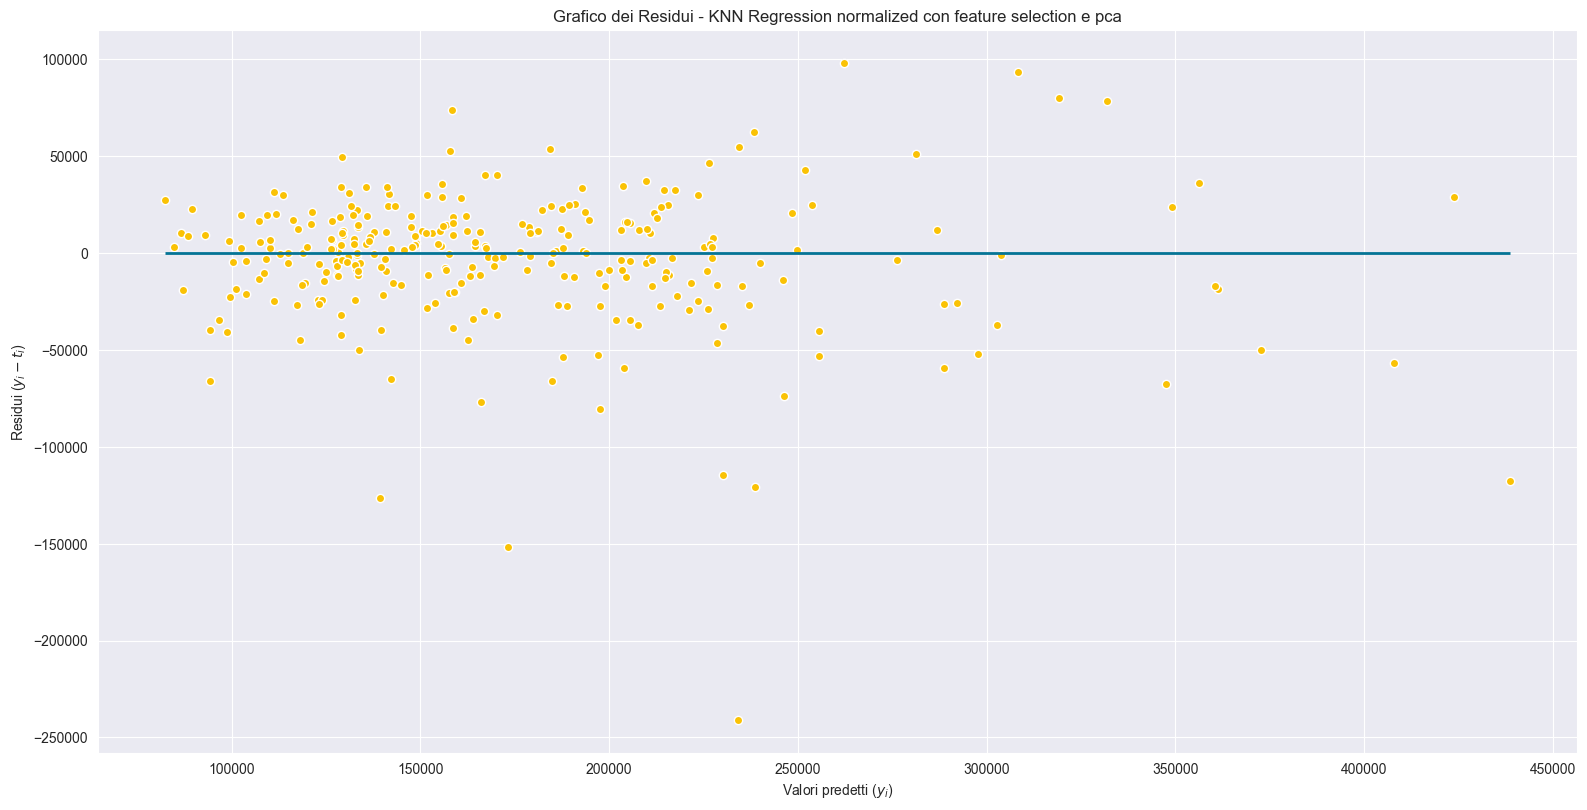

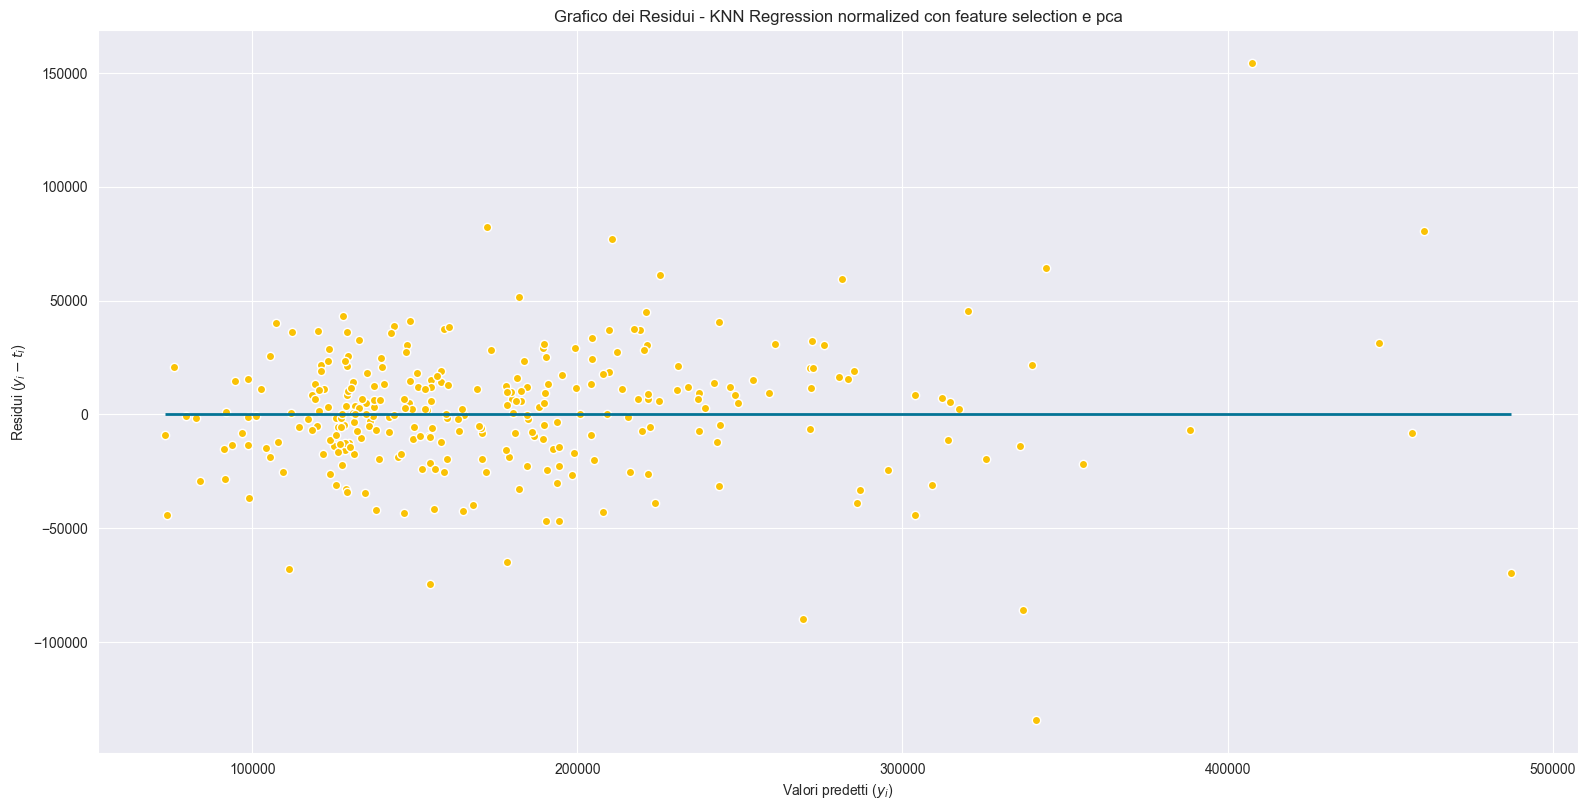

In [47]:
residual_plot(y_pred_knn3, dataset.y_test, 'KNN Regression normalized con feature selection e pca')
residual_plot(y_pred_knn4, dataset.y_test, 'KNN Regression normalized con feature selection e pca')

## 6.7 Regressione Kernel (Nadaraya Watson)
Come KNN, anche la Kernel Regression di Nadaraya Watson è un **metodo parametrico**, in cui la predizione avviene facendo riferimento direttamente agli elementi del training set, senza la necessità di addestrare un modello.
La **Regressione Kernel** è una tecnica di apprendimento automatico utilizzata per la regressione, che si basa sul concetto di Support Vector Machine (SVM) esteso alla previsione di valori continui anziché alla classificazione. La regressione kernel è particolarmente efficace per modellare relazioni non lineari tra le variabili di input e di output.

A differenza della regressione lineare tradizionale, che si basa su una combinazione lineare delle variabili di input, la regressione kernel utilizza una funzione kernel per trasformare le variabili di input in uno spazio di dimensione superiore, dove è più probabile che esista una relazione lineare tra le variabili trasformate e l'output.

Innanzitutto dobbiamo definire una funzione kernel $\kappa_h (x)$ con due caratteristiche:
- non nulla solo in un itervallo intorno allo $0$ di ampiezza $h$ (_banda del kernel_)
- massima in $0$

Per eseguire la regressione kernel Nadaraya-Watson abbiamo bisogno di questa libreria:

In [ ]:
% pip install scikit-fda

In [ ]:
from skfda.misc.hat_matrix import (
    KNeighborsHatMatrix,
    LocalLinearRegressionHatMatrix,
    NadarayaWatsonHatMatrix,
)
from skfda.ml.regression._kernel_regression import KernelRegression

### 6.7.1 NadarayaWatsonHatMatrix
La **Nadaraya-Watson Hat Matrix** è una matrice utilizzata nell'estimazione non parametrica dei modelli di regressione. Questa matrice è spesso usata in combinazione con il kernel di Nadaraya-Watson per stimare la variabile dipendente in un problema di regressione.

In [ ]:
def get_bandwidth(scaled=True):
    if scaled:
        bandwidth = np.logspace(-2, 0,
                                num=20)  # 100 numeri da 10^-2=0.01 a 1=10^0. Questo funziona meglio se scaled=True
    else:
        bandwidth = np.logspace(0, 3, 20)  # numeri da 10^0 a 10^5 # questo funziona meglio se scaled=False
    return bandwidth

#### 6.7.1.1 Performance con pca, con/senza feature selection

In [ ]:
# bandwidth = [0.1, 0.5, 1.0, 1.5]
# TODO: non capisco perché questo codice non funziona mentre qullo sotto sì... cosa cambia?
# kernel_regr = KernelRegression(kernel_estimator=NadarayaWatsonHatMatrix()),
# params_krnw = {'kernel_estimator__bandwidth': bandwidth} # Nota: usiamo __ per distinguere il parametro del kernel_estimator
# gs_kernel_regr = GridSearchCV(kernel_regr, params_krnw) # , scoring="r2", return_train_score=True)
# gs_kernel_regr.fit(dataset.X_train, dataset.y_train)
# r2_gs_krnw = gs_kernel_regr.best_score_

scaled = True  # meglio scaled (r2 = 0.73)
bandwidth = get_bandwidth(scaled=scaled)

nw2 = GridSearchCV(
    KernelRegression(kernel_estimator=NadarayaWatsonHatMatrix()),
    param_grid={'kernel_estimator__bandwidth': bandwidth},
)

X_train_pca, X_test_pca = apply_pca(dataset, k_pca=4, scaled=scaled)
X_train_pca = X_train_pca.to_numpy()
nw2.fit(X_train_pca, dataset.y_train)

print(
    'Best Nadaraya-Watson bandwidth:',
    nw2.best_params_['kernel_estimator__bandwidth'],
    nw2.best_score_
)

#### 6.7.1.2 Predizione sul miglior modello

In [ ]:
# gridSearchCV, dopo il fit, permette di usare direttamente il miglior modello con predict.
y_pred_nw = nw2.predict(X_test_pca.to_numpy())  # a quanto pare i DataFrame non gli piacciono
nw_res = r2_score(y_pred_nw, dataset.y_test.to_numpy())
print('Score NW:', nw_res)
res_nw = BestParameters(f"NadarayaWatsonHatMatrix", 220, nw2.best_params_, nw_res, 0.0, None)
parameters.append(res_knn)

In [ ]:
residual_plot(y_pred_nw, dataset.y_test, 'Kernel Regression con pca e fs')

### 6.7.2 KNeighborsHatMatrix

#### 6.7.2.1 Performance con pca, con/senza feature selection

In [ ]:
n_neighbors = np.array(range(1, 20))

hm = GridSearchCV(
    KernelRegression(kernel_estimator=KNeighborsHatMatrix()),
    param_grid={'kernel_estimator__n_neighbors': n_neighbors},
)
X_train_pca, X_test_pca = apply_fs_and_pca(dataset, k_fs=100, k_pca=10, scaled=False)
hm.fit(X_train_pca.to_numpy(), dataset.y_train)

print("KNeighborsHatMatrix without normalization")
print('Best Nadaraya-Watson parameters:', hm.best_params_['kernel_estimator__n_neighbors'], hm.best_score_, "\n")

hm1 = GridSearchCV(
    KernelRegression(kernel_estimator=KNeighborsHatMatrix()),
    param_grid={'kernel_estimator__n_neighbors': n_neighbors},
)
X_train_pca1, X_test_pca1 = apply_fs_and_pca(dataset, k_fs=100, k_pca=10, scaled=True)
hm1.fit(X_train_pca1.to_numpy(), dataset.y_train)

print("KNeighborsHatMatrix with normalization")
print('Best Nadaraya-Watson parameters:', hm1.best_params_['kernel_estimator__n_neighbors'], hm1.best_score_)

In [ ]:
n_neighbors = np.array(range(1, 20))

hm2 = GridSearchCV(
    KernelRegression(kernel_estimator=KNeighborsHatMatrix()),
    param_grid={'kernel_estimator__n_neighbors': n_neighbors},
)
X_train_pca2, X_test_pca2 = apply_fs_and_pca(dataset, k_fs=10, k_pca=4, scaled=False)
hm2.fit(X_train_pca2.to_numpy(), dataset.y_train)

print("KNeighborsHatMatrix without normalization")
print('Best Nadaraya-Watson parameters:', hm2.best_params_['kernel_estimator__n_neighbors'], hm2.best_score_, "\n")

hm3 = GridSearchCV(
    KernelRegression(kernel_estimator=KNeighborsHatMatrix()),
    param_grid={'kernel_estimator__n_neighbors': n_neighbors},
)
X_train_pca3, X_test_pca3 = apply_fs_and_pca(dataset, k_fs=10, k_pca=4, scaled=True)
hm3.fit(X_train_pca3.to_numpy(), dataset.y_train)

print("KNeighborsHatMatrix with normalization")
print('Best Nadaraya-Watson parameters:', hm3.best_params_['kernel_estimator__n_neighbors'], hm3.best_score_)

#### 6.7.2.2 Predizione sul miglior modello

In [ ]:
y_pred_hm = hm1.predict(X_test_pca1.to_numpy())
hm_res = r2_score(y_pred_hm, dataset.y_test.to_numpy())
print('Score NW:', hm_res)
res_hm = BestParameters(f"KNeighborsHatMatrix", 220, hm1.best_params_, hm_res, 0.0, None)
parameters.append(res_knn)

In [ ]:
residual_plot(y_pred_hm, dataset.y_test, 'Kernel Regression con pca e fs')

### 6.7.3 LocalLinearRegressionHatMatrix

#### 6.7.3.1 Performance con pca, con/senza feature selection

In [ ]:
from scipy.fft import fft

bandwidth = np.logspace(0.3, 1, num=100)

llr = GridSearchCV(
    KernelRegression(kernel_estimator=LocalLinearRegressionHatMatrix()),
    param_grid={'kernel_estimator__bandwidth': bandwidth},
)

X_train_pca, X_test_pca = apply_fs_and_pca(dataset, k_fs=100, k_pca=30, scaled=False)
# applico Fourier (fast fourier transform)
X_train_pca = fft(X_train_pca.to_numpy())
llr.fit(X_train_pca, dataset.y_train)

print("LocalLinearRegressionHatMatrix without normalization")
print('Best Nadaraya-Watson parameters:', llr.best_params_['kernel_estimator__bandwidth'], llr.best_score_, "\n")

llr1 = GridSearchCV(
    KernelRegression(kernel_estimator=LocalLinearRegressionHatMatrix()),
    param_grid={'kernel_estimator__bandwidth': bandwidth},
)

X_train_pca1, X_test_pca1 = apply_fs_and_pca(dataset, k_fs=100, k_pca=30, scaled=True)
# applico Fourier
X_train_pca1 = fft(X_train_pca1.to_numpy())
llr1.fit(X_train_pca1, dataset.y_train)

print("LocalLinearRegressionHatMatrix with normalization")
print('Best Nadaraya-Watson parameters:', llr1.best_params_['kernel_estimator__bandwidth'], llr1.best_score_)

In [ ]:
from scipy.fft import fft

bandwidth = np.logspace(0.3, 1, num=100)

llr2 = GridSearchCV(
    KernelRegression(kernel_estimator=LocalLinearRegressionHatMatrix()),
    param_grid={'kernel_estimator__bandwidth': bandwidth},
)
X_train_pca2, X_test_pca2 = apply_fs_and_pca(dataset, k_fs=10, k_pca=4, scaled=False)
# applico Fourier
X_train_pca2 = fft(X_train_pca2.to_numpy())
llr2.fit(X_train_pca2, dataset.y_train)

print("LocalLinearRegressionHatMatrix without normalization")
print('Best Nadaraya-Watson parameters:', llr2.best_params_['kernel_estimator__bandwidth'], llr2.best_score_)

llr3 = GridSearchCV(
    KernelRegression(kernel_estimator=LocalLinearRegressionHatMatrix()),
    param_grid={'kernel_estimator__bandwidth': bandwidth},
)

X_train_pca3, X_test_pca3 = apply_fs_and_pca(dataset, k_fs=10, k_pca=4, scaled=True)
# applico Fourier
X_train_pca3 = fft(X_train_pca3.to_numpy())
llr3.fit(X_train_pca3, dataset.y_train)

print("LocalLinearRegressionHatMatrix with normalization")
print('Best Nadaraya-Watson parameters:', llr3.best_params_['kernel_estimator__bandwidth'], llr3.best_score_)

#### 6.7.3.2 Predizione sul miglior modello

In [ ]:
y_pred_llr = llr3.predict(X_test_pca3.to_numpy())  # a quanto pare i DataFrame non gli piacciono
llr_res = r2_score(y_pred_llr, dataset.y_test.to_numpy())
print('Score NW:', llr_res)
res_hm = BestParameters(f"LocalLinearRegressionHatMatrix()", 220, llr3.best_params_, llr_res, 0.0, None)
parameters.append(res_knn)

In [ ]:
residual_plot(y_pred_llr, dataset.y_test, 'Kernel Regression con pca e fs')

## 6.8 Decision Tree
**Decision Tree** è un modello parametrico che rappresenta un albero di decisione in cui ogni nodo interno rappresenta una decisione basata su una caratteristica (feature), e ogni foglia rappresenta il valore di regressione previsto.

Il modello di regressione ad albero di decisione cerca di dividere il set di dati in gruppi omogenei rispetto al valore di regressione. Ciò avviene suddividendo ricorsivamente il set di dati in base alle caratteristiche finché non viene raggiunto un criterio di terminazione, come ad esempio la profondità massima dell'albero o il numero minimo di campioni in una foglia.

Parametri:
- **max_depth**: specifica la profondità massima dell'albero;
- **min_samples_split**: numero minimo di campioni richiesti per suddividere un nodo;
- **min_samples_leaf**: numero minimo di campioni richiesti in una foglia;
- **max_features**: numero massimo di feature considerate per la suddivisione di un nodo.

### 6.8.1 GridSearch

In [55]:
from sklearn.tree import DecisionTreeRegressor

params_decision_tree = {
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'max_features': [None, 'sqrt', 'log2']
}

r2_gs_decision_tree, best_param_decision_tree = grid_search(DecisionTreeRegressor(), dataset, params_decision_tree, scaled=False)
print(
    f"Decision Tree regression without normalization-> r2: {r2_gs_decision_tree} - best parameters: {best_param_decision_tree}")

r2_gs_decision_tree_norm, best_param_decision_tree_norm = grid_search(DecisionTreeRegressor(), dataset,
                                                                      params_decision_tree)
print(
    f"Decision Tree regression with normalization-> r2: {r2_gs_decision_tree_norm} - best parameters: {best_param_decision_tree_norm}")

Decision Tree regression without normalization-> r2: 0.6954616971139977 - best parameters: {'max_depth': 7, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 2}
Decision Tree regression with normalization-> r2: 0.6953783825681908 - best parameters: {'max_depth': 7, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 6}


### 6.8.3 Performance test
Valutiamo il modell con un dataset non normalizzato:

In [57]:
print("Decision Tree no normalized")
decision_tree = DecisionTreeRegressor(max_depth=best_param_decision_tree['max_depth'],
                                      min_samples_leaf=best_param_decision_tree['min_samples_leaf'],
                                      min_samples_split=best_param_decision_tree['min_samples_split'],
                                      max_features=best_param_decision_tree['max_features'])
r2_decision_tree, rms_decision_tree, r2_test_decision_tree, rms_test_decision_tree, y_pred_decision_tree = performance_test(decision_tree, dataset)
print(f"Decision Tree Regression -> r2 mean: {r2_decision_tree} - rms mean: {rms_decision_tree} - r2 test: {r2_test_decision_tree} - rms test: {rms_test_decision_tree}")
res_decision_tree = BestParameters(f"Decision Tree no normalized", 220, best_param_decision_tree, r2_test_decision_tree, rms_test_decision_tree, None)
parameters.append(res_decision_tree)

Decision Tree no normalized
Decision Tree Regression -> r2 mean: 0.9168134787812028 - rms mean: 23339.751589147163 - r2 test: 0.7620579189944292 - rms test: 35628.19213898645


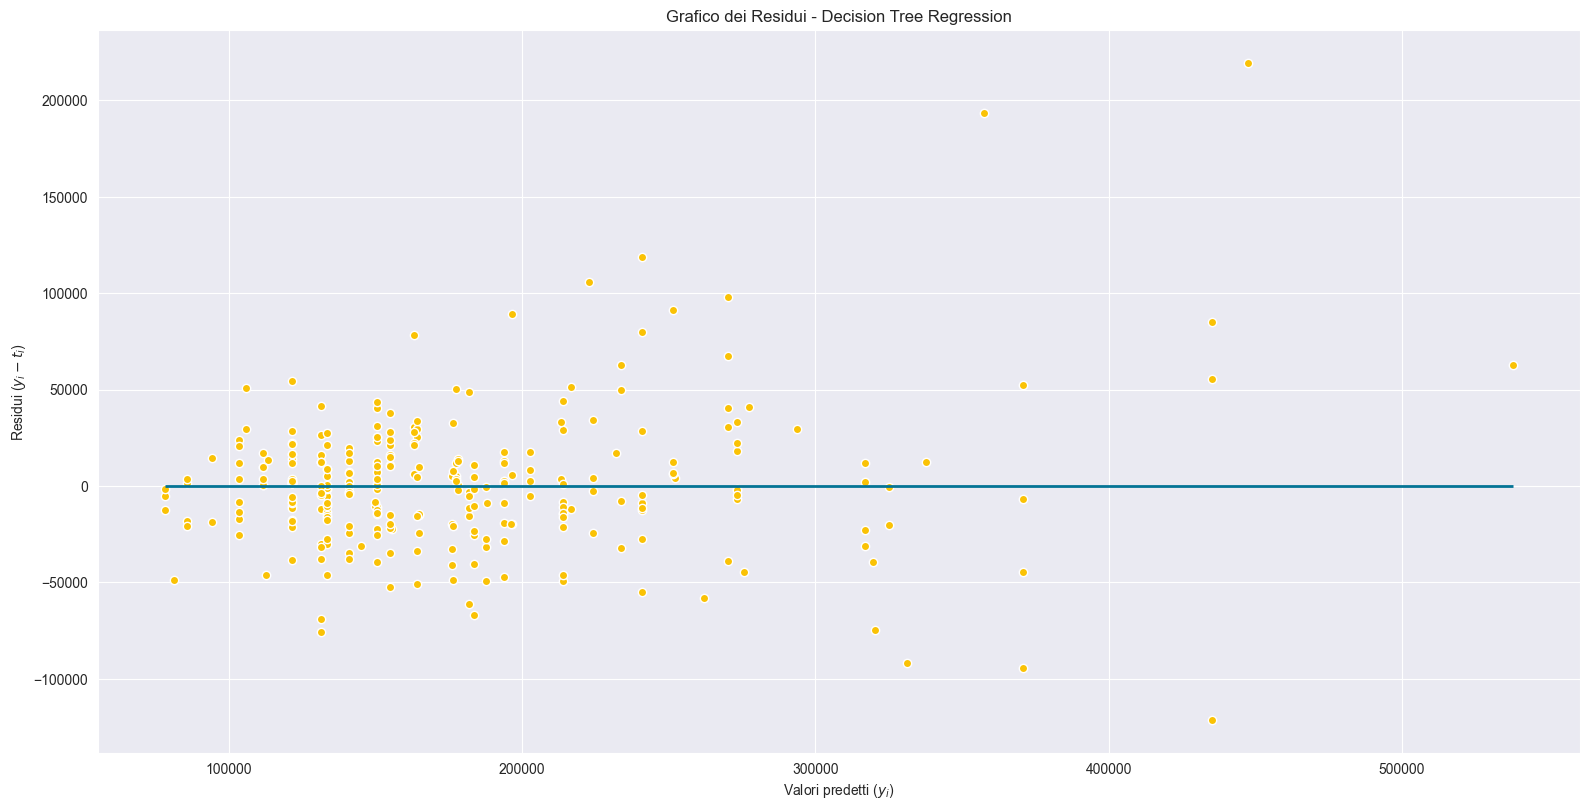

In [58]:
residual_plot(y_pred_decision_tree, dataset.y_test, 'Decision Tree Regression')

Valutiamo il modello normalizzato:

In [60]:
print("Decision Tree normalized")
decision_tree = DecisionTreeRegressor(max_depth=best_param_decision_tree_norm['max_depth'],
                                      min_samples_leaf=best_param_decision_tree_norm['min_samples_leaf'],
                                      min_samples_split=best_param_decision_tree_norm['min_samples_split'],
                                      max_features=best_param_decision_tree_norm['max_features'])
r2_decision_tree, rms_decision_tree, r2_test_decision_tree, rms_test_decision_tree, y_pred_decision_tree2 = performance_test(decision_tree, dataset, scaled=True)
print(f"Decision Tree Regression -> r2 mean: {r2_decision_tree} - rms mean: {rms_decision_tree} - r2 test: {r2_test_decision_tree} - rms test: {rms_test_decision_tree}")
res_decision_tree = BestParameters(f"Decision Tree normalized", 220, best_param_decision_tree_norm, r2_test_decision_tree, rms_test_decision_tree, None)
parameters.append(res_decision_tree)

Decision Tree normalized
Decision Tree Regression -> r2 mean: 0.9168134787812028 - rms mean: 23339.751589147163 - r2 test: 0.7410394699907508 - rms test: 37168.492372584595


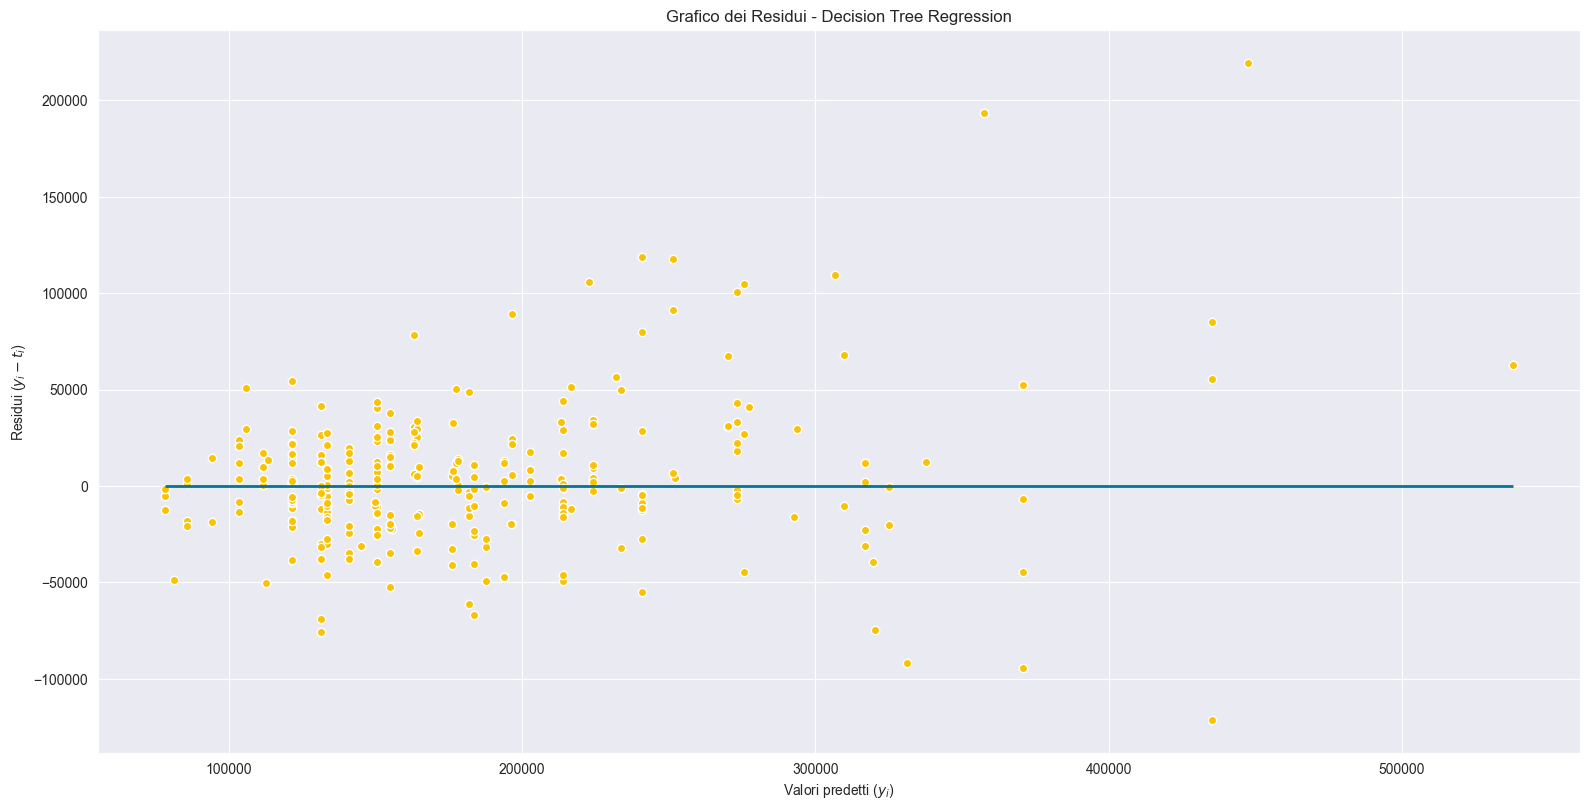

In [61]:
residual_plot(y_pred_decision_tree2, dataset.y_test, 'Decision Tree Regression')

### 6.8.4 Performance test con pca e fs
Valutiamo il modello con un dataset non normalizzato:

In [65]:
print("Decision Tree")
decision_tree = DecisionTreeRegressor(max_depth=best_param_decision_tree['max_depth'],
                                      min_samples_leaf=best_param_decision_tree['min_samples_leaf'],
                                      min_samples_split=best_param_decision_tree['min_samples_split'],
                                      max_features=best_param_decision_tree['max_features'])

X_train_pca, X_test_pca, X_train_fs_pca, X_test_fs_pca = apply_fs_and_or_pca(dataset, k_fs=10, k_pca=4, scaled=False)
score1_decision_tree, rms1_decision_tree, y_pred_decision_tree1 = run_regression_train_test("Decision Tree with PCA", decision_tree,
                                                                           dataset, X_train_pca,
                                                                           X_test_pca, scaled=False)

decision_tree = DecisionTreeRegressor(max_depth=best_param_decision_tree['max_depth'],
                                      min_samples_leaf=best_param_decision_tree['min_samples_leaf'],
                                      min_samples_split=best_param_decision_tree['min_samples_split'],
                                      max_features=best_param_decision_tree['max_features'])
score2_decision_tree, rms2_decision_tree, y_pred_decision_tree2 = run_regression_train_test("Decision Tree with FS and PCA",
                                                                           decision_tree, dataset,
                                                                           X_train_fs_pca, X_test_fs_pca, scaled=False)

res_decision_tree = BestParameters(f"Decision Tree with pca", 220, best_param_decision_tree, score1_decision_tree, rms1_decision_tree, None)
parameters.append(res_decision_tree)
res_decision_tree = BestParameters(f"Decision Tree with pca e fs", 220, best_param_decision_tree, score2_decision_tree, rms2_decision_tree, None)
parameters.append(res_decision_tree)

Decision Tree
Feature ridotte da (1168, 240) con PCA: (1168, 4)
Feature selezionate:  (1168, 10)
Feature ridotte da 104 con MI e PCA:  (1168, 4)
Decision Tree with PCA - r2: 0.8202933330299691 - rms: 34304.55915918373 - r2 test: 0.6147252091632547 - rms test: 45336.026621519646
Decision Tree with FS and PCA - r2: 0.9263180547777067 - rms: 21965.96510731746 - r2 test: 0.8413027480535564 - rms test: 29096.641370222085


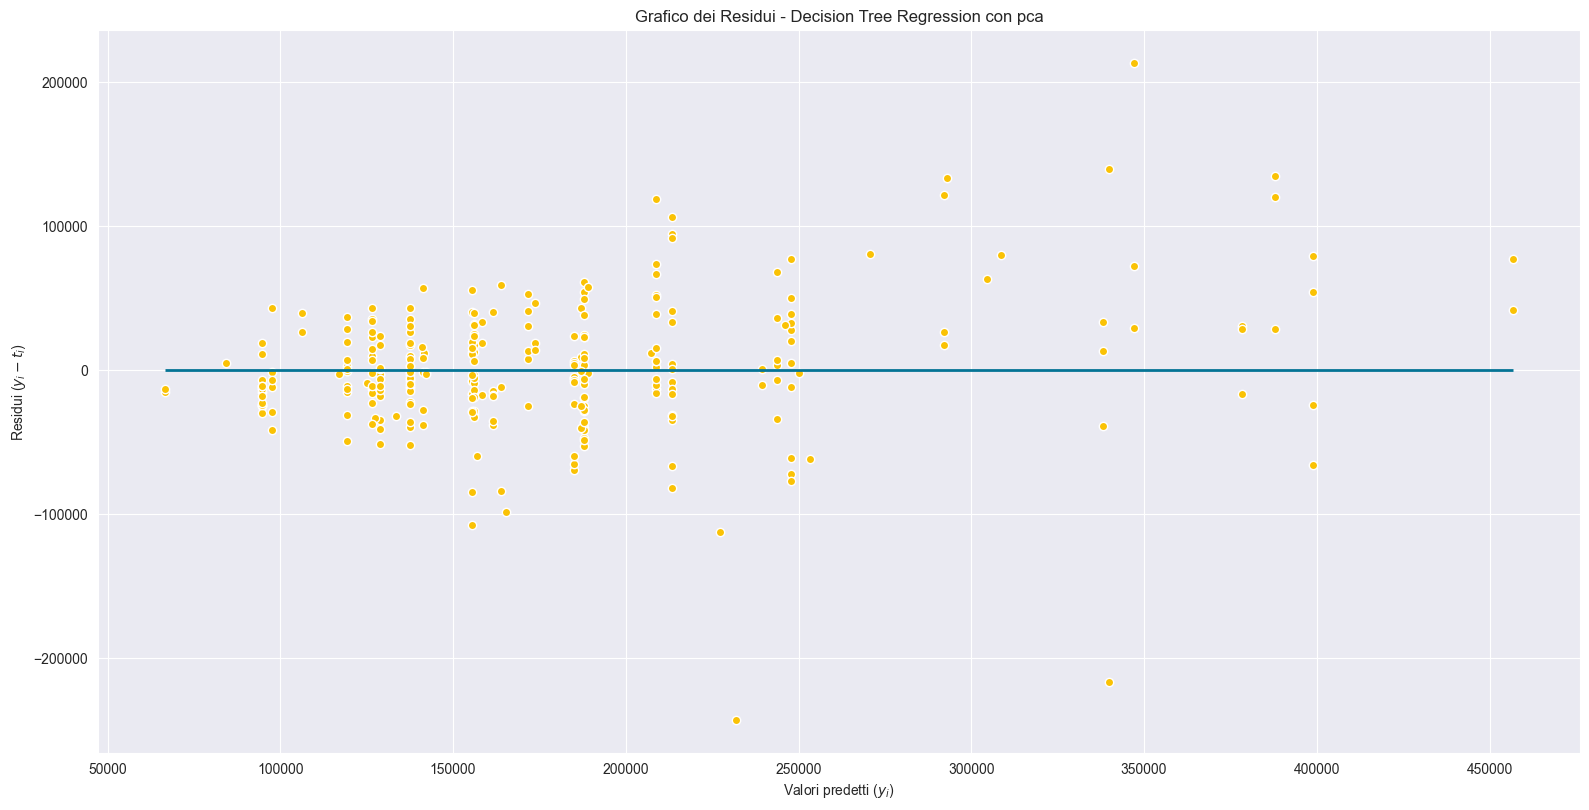

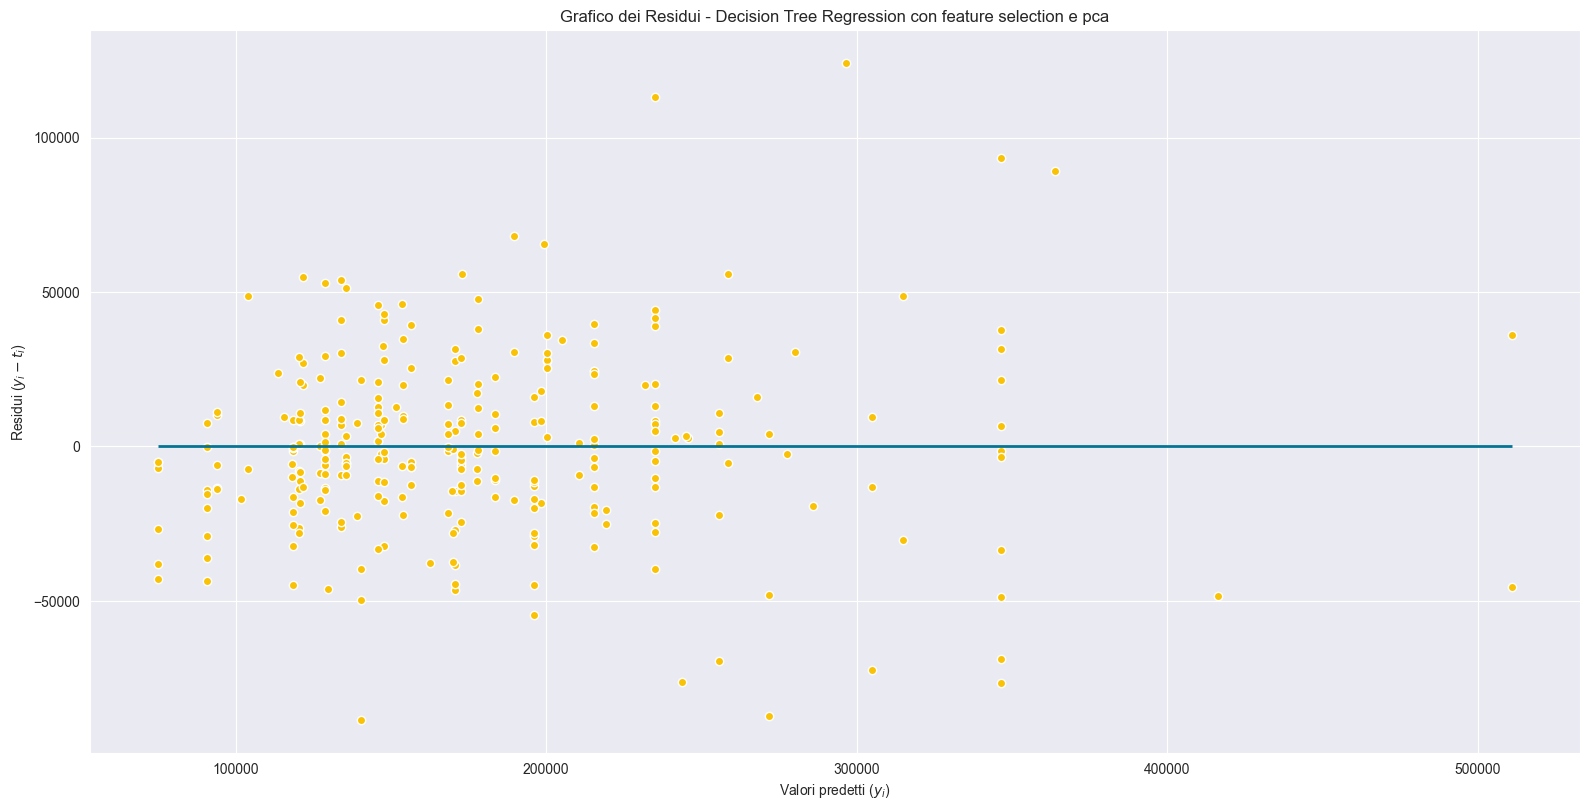

In [66]:
residual_plot(y_pred_decision_tree1, dataset.y_test, 'Decision Tree Regression con pca')
residual_plot(y_pred_decision_tree2, dataset.y_test, 'Decision Tree Regression con feature selection e pca')

Valutiamo il modello con un dataset normalizzato con pca e feature selection:

In [67]:
print("Decision Tree with normalization")
decision_tree = DecisionTreeRegressor(max_depth=best_param_decision_tree_norm['max_depth'],
                                      min_samples_leaf=best_param_decision_tree_norm['min_samples_leaf'],
                                      min_samples_split=best_param_decision_tree_norm['min_samples_split'],
                                      max_features=best_param_decision_tree_norm['max_features'])

X_train_pca, X_test_pca, X_train_fs_pca, X_test_fs_pca = apply_fs_and_or_pca(dataset, k_fs=10, k_pca=4, scaled=True)
score3_decision_tree, rms3_decision_tree, y_pred_decision_tree3 = run_regression_train_test("Decision Tree normalized with PCA", decision_tree,
                                                                           dataset, X_train_pca,
                                                                           X_test_pca)

decision_tree = DecisionTreeRegressor(max_depth=best_param_decision_tree_norm['max_depth'],
                                      min_samples_leaf=best_param_decision_tree_norm['min_samples_leaf'],
                                      min_samples_split=best_param_decision_tree_norm['min_samples_split'],
                                      max_features=best_param_decision_tree_norm['max_features'])
score4_decision_tree, rms4_decision_tree, y_pred_decision_tree4 = run_regression_train_test("Decision Tree normalized with FS and PCA",
                                                                           decision_tree, dataset,
                                                                           X_train_fs_pca, X_test_fs_pca)

res_decision_tree = BestParameters(f"Decision Tree normalized with pca", 220, best_param_decision_tree_norm, score3_decision_tree, rms3_decision_tree, None)
parameters.append(res_decision_tree)
res_decision_tree = BestParameters(f"Decision Tree normalized  with pca e fs", 220, best_param_decision_tree_norm, score4_decision_tree, rms4_decision_tree, None)
parameters.append(res_decision_tree)

Decision Tree with normalization
Feature ridotte da (1168, 240) con PCA: (1168, 4)
Feature selezionate:  (1168, 10)
Feature ridotte da 104 con MI e PCA:  (1168, 4)
Decision Tree normalized with PCA - r2: 0.8894415280570479 - rms: 26907.029926725507 - r2 test: 0.6877171503015861 - rms test: 40816.16762934833
Decision Tree normalized with FS and PCA - r2: 0.9101269660940561 - rms: 24259.64544393712 - r2 test: 0.7314819620480266 - rms test: 37848.17042056255


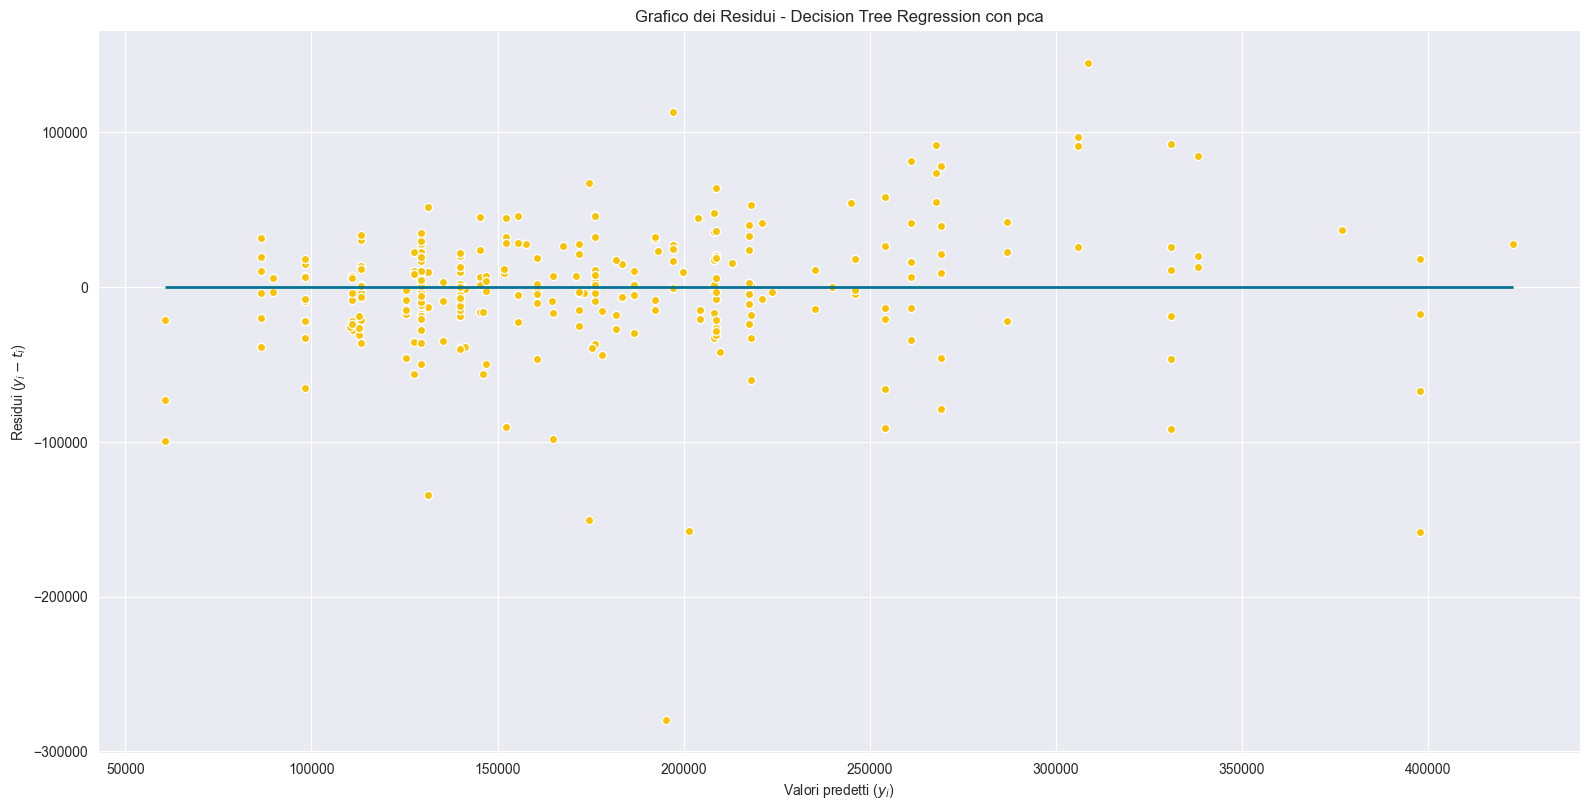

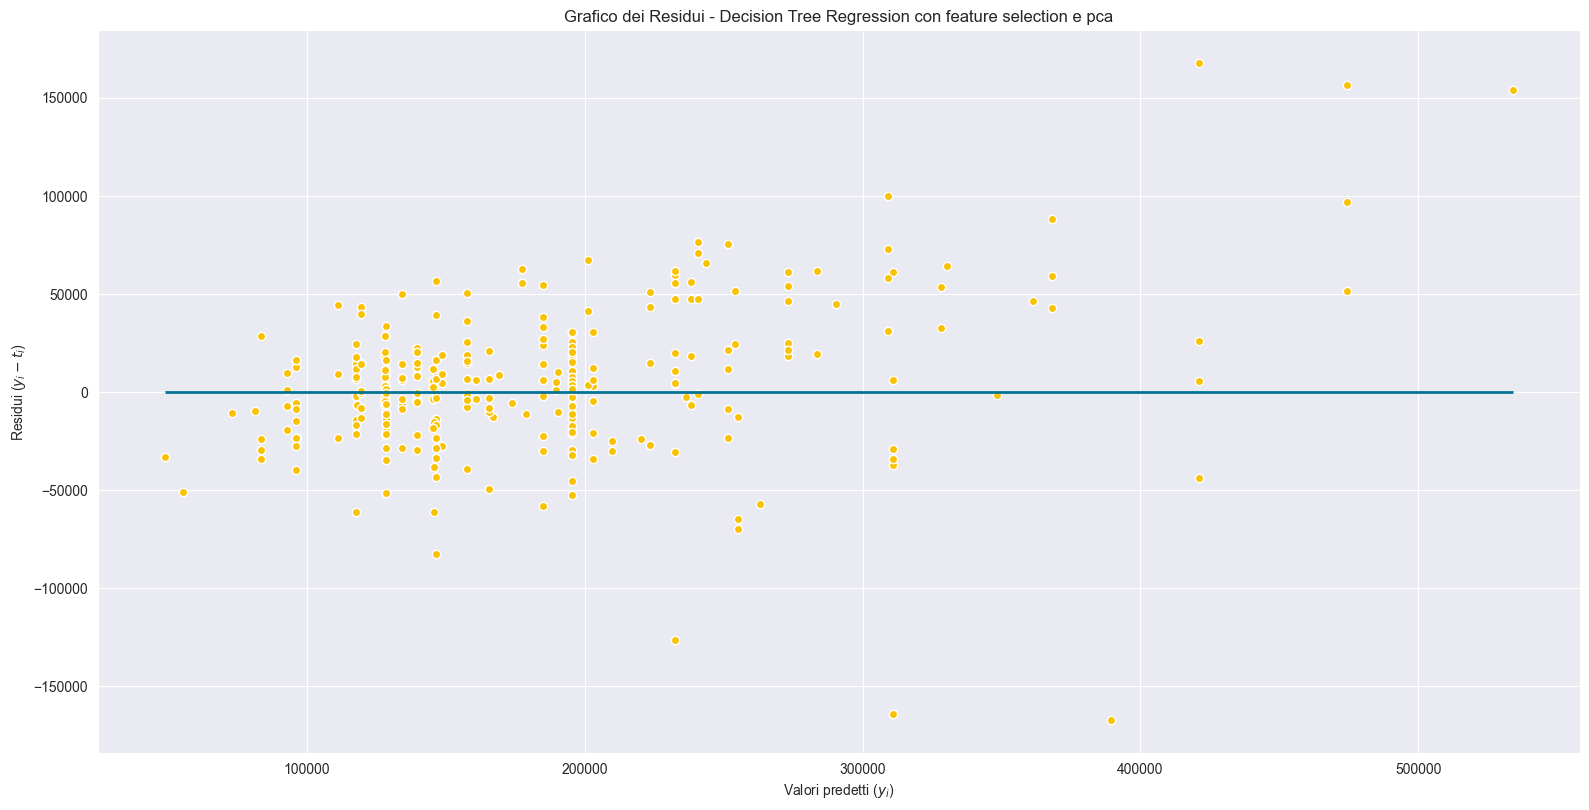

In [68]:
residual_plot(y_pred_decision_tree3, dataset.y_test, 'Decision Tree Regression con pca')
residual_plot(y_pred_decision_tree4, dataset.y_test, 'Decision Tree Regression con feature selection e pca')

## 6.9 Reti neurali

Definiamo una classe con dati in tensori pytorch:

In [ ]:
import torch
import torch.optim as optim
import tqdm
import copy


class DatasetNN():
    def __init__(self, dataset: Dataset):
        # Conversione dei dati in tensori PyTorch
        self.dataset = dataset
        self.X_train = torch.tensor(dataset.X_train.to_numpy(), dtype=torch.float32)
        self.y_train = torch.tensor(dataset.y_train.to_numpy(), dtype=torch.float32).reshape(-1,
                                                                                             1)  # .to(torch.float64)
        self.X_test = torch.tensor(dataset.X_test.to_numpy(), dtype=torch.float32)
        self.y_test = torch.tensor(dataset.y_test.to_numpy(), dtype=torch.float32).reshape(-1, 1)  # .to(torch.float64)
        self.X_train_normalized = torch.tensor(dataset.X_train_normalized.to_numpy(), dtype=torch.float32)
        self.X_test_normalized = torch.tensor(dataset.X_test_normalized.to_numpy(), dtype=torch.float32)
        self.numFeatures = self.X_train.data.shape[1]
        self.numFeatures_fs_pca = None
        self.numRow = self.X_train.shape[0]
        self.X_train_fs_pca = None
        self.X_test_fs_pca = None
        self.X_train_pca = None
        self.X_test_pca = None

    def do_fs_pca(self, k_fs, k_pca, scaled=True):
        X_train_fs_pca, X_test_fs_pca = apply_fs_and_pca(self.dataset, k_fs, k_pca, scaled=scaled)
        self.X_train_fs_pca = torch.tensor(X_train_fs_pca.to_numpy(), dtype=torch.float32)
        self.X_test_fs_pca = torch.tensor(X_test_fs_pca.to_numpy(), dtype=torch.float32)
        self.numFeatures_fs_pca = k_pca  # aggiorniamo le feature al valore finale con fs+pca

    def do_pca(self, k_pca, scaled=True):
        X_train_pca, X_test_pca = apply_pca(self.dataset, k_pca, scaled=scaled)
        self.X_train_pca = torch.tensor(X_train_pca.to_numpy(), dtype=torch.float32)
        self.X_test_pca = torch.tensor(X_test_pca.to_numpy(), dtype=torch.float32)
        self.numFeatures_fs_pca = k_pca  # aggiorniamo le feature al valore finale con pca


datasetNN = DatasetNN(dataset)

Definiamo una classe che faciliti la creazione della rete neurale.

In [ ]:
from torch import nn
from torchinfo import summary


# il primo layer della rete neurale deve avere tanti neuroni quante sono le features
class FirstLayer:
    def __init__(self, input_features, second_layer_neurons):
        self.model = nn.Linear(input_features, second_layer_neurons)

    def get(self):
        return self.model


class NeuralNet:
    def __init__(self, datasetNN: DatasetNN, first_layer_hidden_units: int, model: nn.Module, k_fs=50, k_pca=10):
        self.datasetNN = datasetNN
        if k_fs > k_pca and k_fs < datasetNN.numFeatures:
            self.datasetNN.do_fs_pca(k_fs=k_fs, k_pca=k_pca)
        else:
            print("Non eseguo feature selection ne' pca")
        self.first_layer = FirstLayer(self.datasetNN.numFeatures_fs_pca, first_layer_hidden_units)
        self.model = nn.Sequential(self.first_layer.get()).append(model)

    def parameters(self):
        return self.model.parameters()

    def summary(self):
        print(summary(self.model, input_size=(self.datasetNN.numRow, self.datasetNN.numFeatures)))

    def train_fs_pca(self, n_epochs: int, optimizer: optim.Adam, loss_fn: nn.MSELoss, batch_start, batch_size):
        return self._network_train(n_epochs, optimizer, loss_fn, self.datasetNN.X_train_fs_pca, self.datasetNN.y_train,
                                   self.datasetNN.X_test_fs_pca, self.datasetNN.y_test, batch_start, batch_size)

    def train(self, n_epochs: int, optimizer: optim.Adam, loss_fn: nn.MSELoss, batch_start, batch_size):
        return self._network_train(n_epochs, optimizer, loss_fn, self.datasetNN.X_train_normalized,
                                   self.datasetNN.y_train, self.datasetNN.X_test_normalized, self.datasetNN.y_test,
                                   batch_start, batch_size)

    def _network_train(self, n_epochs: int, optimizer: optim.Adam, loss_fn: nn.MSELoss, X_train, y_train, X_test,
                       y_test, batch_start, batch_size) -> Tuple[Dict[str, Any], List[float], float, float, float]:
        self.model.to('cpu')
        # Hold the best model
        best_mse = np.inf  # init to infinity
        best_weights = None
        best_r2 = -np.inf
        history: List[float] = []
        history_r2: List[float] = []

        # training loop
        for epoch in range(n_epochs):
            self.model.train()  # attiva la modalità training
            with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
                bar.set_description(f"Epoch {epoch}")
                for start in bar:
                    # take a batch
                    X_batch = X_train[start:start + batch_size]
                    y_batch = y_train[start:start + batch_size]
                    # print(X_batch.shape, y_batch.shape)

                    # forward pass
                    y_pred = self.model(X_batch)
                    # serve per avere la stessa dim tra y_pred_hat e y_train. Alternativa y_train = y_train.unsqueeze(-1)
                    # y_pred = y_pred.squeeze(-1)
                    loss = loss_fn(y_pred, y_batch)

                    # backward pass
                    optimizer.zero_grad()
                    loss.backward()
                    # update weights
                    optimizer.step()
                    # print progress
                    bar.set_postfix(mse=float(loss))
            # evaluate accuracy at end of each epoch
            self.model.eval()  # modalità valutazione
            y_pred = self.model(X_test)  #.squeeze(-1)
            mse = loss_fn(y_pred, y_test)
            mse = float(mse)

            r2score = R2Score()
            r2 = r2score(y_pred, y_test)
            history.append(mse)
            history_r2.append(r2)
            if mse < best_mse:
                best_mse = mse
                best_r2 = r2
                best_weights = copy.deepcopy(self.model.state_dict())
        return best_weights, history, history_r2, best_mse, best_r2

### 6.9.1 Iperparametri della rete neurale
Creiamo una classe che definisce gli iperparametri della rete neurale, in particolare:

- modello della rete neurale
- ottimizzatore tra Adam, AdaGrad, RMSprop e Adadelta
- funzione loss
- numero di feature per feature selection e pca
- numero di epoche
- dimensione del batch
- learning rate: Possiamo aumentare il learning rate per velocizzare l'addestramento, oppure diminuirlo per addestrare più a fondo.
E' buona norma usare una via di mezzo. Parti da 0.001 e poi man mano moltiplica per 3 (e arrotondando .9 a 1), finché i tempi sono abbastanza brevi e le performance abbastanza buone.

In [ ]:
from enum import Enum


class OptimizerEnum(Enum):
    Adam = 0  # efficiente in termini di memoria, tanti learning rate, non diventa infinitamente piccolo.
    AdaGrad = 1  # tanti learning rate, uno per parametro, tiene conto della storia precedente. Ha problemi di vanishing learning rate
    RMSprop = 2  # tanti learning rate, tiene conto solo della storia recente, il learning rate non decresce indefinitamente
    Adadelta = 3  # non necessita un learning rate iniziale, tanti learning rate, non decrescono indefinitamente


class LossEnum(Enum):
    SquareLoss = 0
    AbsoluteLoss = 1
    HuberLoss = 2


class NetIperparameters:

    def __init__(self, datasetNN: DatasetNN, model: nn.Sequential, first_hidden_units: int, optimizer: OptimizerEnum,
                 learning_rate=0.0001, loss=LossEnum.SquareLoss, num_epochs=500, batch_size=73, k_fs=50, k_pca=20):
        self.neural_net = NeuralNet(datasetNN, first_hidden_units, model, k_fs=k_fs, k_pca=k_pca)
        self.learning_rate = learning_rate
        self.parameters = self.neural_net.parameters()
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.k_fs = k_fs
        self.k_pca = k_pca
        self.optimizer_name = optimizer.name
        match optimizer:
            case OptimizerEnum.Adam:
                self.optimizer = optim.Adam(self.parameters, lr=self.learning_rate)
            case OptimizerEnum.AdaGrad:
                self.optimizer = optim.Adagrad(self.parameters, lr=self.learning_rate)
            case OptimizerEnum.RMSprop:
                self.optimizer = optim.RMSprop(self.parameters, lr=self.learning_rate)
            case OptimizerEnum.Adadelta:
                self.optimizer = optim.Adadelta(self.parameters)
        match loss:
            case LossEnum.SquareLoss:
                self.loss = nn.MSELoss()
            case LossEnum.AbsoluteLoss:
                self.loss = nn.L1Loss()
            case LossEnum.HuberLoss:
                self.loss = nn.HuberLoss()

    def train_and_evaluate(self):
        initialFeatures = self.neural_net.datasetNN.numFeatures
        featuresAfterFSPCA = self.neural_net.datasetNN.numFeatures_fs_pca
        print(f"Numero features iniziali: {initialFeatures}")
        print(f"Numero features dopo fs e pca: {featuresAfterFSPCA}")
        print(self.to_string())
        batch_start = torch.arange(0, len(self.neural_net.datasetNN.X_train_normalized), self.batch_size)
        if initialFeatures > featuresAfterFSPCA:
            best_weights, history, history_r2, best_mse, best_r2 = self.neural_net.train_fs_pca(self.num_epochs,
                                                                                                self.optimizer,
                                                                                                self.loss, batch_start,
                                                                                                self.batch_size)
        else:
            best_weights, history, history_r2, best_mse, best_r2 = self.neural_net.train(self.num_epochs,
                                                                                         self.optimizer, self.loss,
                                                                                         batch_start, self.batch_size)
        print("MSE: %.2f" % best_mse)
        print("RMSE: %.2f" % np.sqrt(best_mse))
        print("R2: %.2f" % best_r2)
        plt.plot(history)
        plt.xlabel("epochs")
        plt.ylabel("mse")
        plt.show()

    def to_string(self):
        return f"optimizer: {self.optimizer_name} learning_rate: {self.learning_rate} loss_func: {self.loss} num_epochs: {self.num_epochs} batch_size: {self.batch_size} k_fs: {self.k_fs} k_pca: {self.k_pca}"

    def __str__(self):
        return self.to_string()

    def __repr__(self):
        return self.to_string()


In [ ]:
from torchmetrics import R2Score


class History:
    """Accumulates values in a dictionary of sequences."""

    def __init__(self, keys: List[str]):
        self.data: Dict[str, List[float]] = {}
        self.keys: List[str] = keys
        for k in self.keys:
            self.data[k] = []

    def add(self, *args: Any):
        for k, a in zip(self.keys, args):
            self.data[k].append(a)

    def sums(self) -> Dict[str, float]:
        """
        Ho un dizionario di chiavi e liste di float. Questo metodo produce
        un nuovo dizionario con la stessa chiave e gli elementi della sequenza sommati
        """
        return {k: sum(self.data[k]) for k in self.keys}

    def merge(self, d: dict[str, List[float]]):
        """
        Unisce il dizionario di questo oggetto con il dizionario passato in input
        :param d: un dizionario con chiave string e lista di valori float
        """
        for k in self.keys:
            self.data[k].extend(d[k])

    def __getitem__(self, k: str) -> List[float]:
        """
        Restituisce la lista relativa alla chiave k
        :param k:
        :return:
        """
        return self.data[k]


def evaluate_r2(y_pred, y_train):
    """Compute the r2 for a model on a dataset."""
    if isinstance(y_pred, torch.nn.Module):  # se è una rete neurale
        # Set the model to eval mode
        y_pred.eval()
    h_test = History(['r2_train', 'predictions'])  # r2, no. of predictions
    with torch.no_grad():  # Gradients must not be computed
        #X = X.flatten(start_dim=1, end_dim=-1)
        r2score = R2Score()
        h_test.add(r2score(y_pred, y_train), len(y_train))
        s = h_test.sums()
    return s['r2_train'] / s['predictions']


def train_epoch(model: torch.nn.Module, x_train: DataFrame, y_train: Series, loss_func, optimizer):
    if isinstance(model, torch.nn.Module):
        model.train()  # Set the model to training mode
    h_epoch = History(['mse', 'r2', 'n_examples'])  # Training loss, r2, no. of examples

    #X=X.flatten(start_dim=1, end_dim=-1)
    # Compute predictions
    y_pred_hat = model(x_train)
    # serve per avere la stessa dim tra y_pred_hat e y_train. Alternativa y_train = y_train.unsqueeze(-1)
    y_pred_hat = y_pred_hat.squeeze(-1)
    # Compute loss
    loss = loss_func(y_pred_hat, y_train)
    optimizer.zero_grad()
    # Compute gradients
    loss.backward()
    # Update parameters
    optimizer.step()
    # print progress
    h_epoch.add(float(loss), evaluate_r2(y_pred_hat, y_train), len(y_train))
    # Return training loss and training accuracy
    s = h_epoch.sums()
    n_examples = s['n_examples']
    print("n_examples:", n_examples, "mse: ", s['mse'], "r2: ", s['r2'])
    return s['mse'] / n_examples, s['r2'] / n_examples, h_epoch


def train(net, dataset: DatasetNN, loss_func, num_epochs: int, updater, report=False):
    h_batch = History(['mse', 'r2', 'n_examples'])
    h_train = History(['training_loss', 'training_r2',
                       'test_r2'])  # Avg. training loss rms, avg. training r2, test r2

    for epoch in range(num_epochs):
        print(f'Epoch #{epoch + 1}')
        # train model for one epoch
        train_mse, train_r2, h_epoch = train_epoch(net, dataset.X_train_normalized, dataset.y_train, loss_func, updater)
        # evaluate accuracy on test set
        test_acc = 0.0  #evaluate_r2(net, dataset.X_test_normalized)
        if report:
            print(f' Min Square error {train_mse:3.4f}, Training set r2 {train_r2:1.4f}, Test set r2 {test_acc:1.4f}')
        else:
            print('\n')
        h_train.add(train_mse, train_r2, test_acc)
        h_batch.merge(h_epoch.data)
    return h_train, h_batch


def predict(model, loaders):
    preds_train = []
    y_train = []
    preds_test = []
    y_test = []
    if isinstance(model, torch.nn.Module):
        model.eval()
    with torch.no_grad():
        for X, y in loaders['train']:
            #X = X.flatten(start_dim=1, end_dim=-1)
            preds = (torch.max(model(X), 1)[1]).numpy()
            preds_train.extend(preds)
            y_train.extend(y.numpy())
        for X, y in loaders['test']:
            #X = X.flatten(start_dim=1, end_dim=-1)
            preds = (torch.max(model(X), 1)[1]).numpy()
            preds_test.extend(preds)
            y_test.extend(y.numpy())
    return preds_train, y_train, preds_test, y_test


### 6.9.2 Training della rete

#### k_fs: 50, k_pca: 20, optimizer: Adam, loss: MSE, learning_rate: 0.0001, num_epochs: 500, batch_size: 73

In [ ]:
first_hidden_layer = 500
# scegli se fare FS e/o PCA
model = nn.Sequential(
    nn.ReLU(),
    nn.Linear(first_hidden_layer, 300),
    nn.ReLU(),
    nn.Linear(300, 1)
)
net_params = NetIperparameters(datasetNN, model, learning_rate=0.01, first_hidden_units=first_hidden_layer,
                               optimizer=OptimizerEnum.Adam, num_epochs=50)
net_params.train_and_evaluate()


#### k_fs: 50, k_pca: 20, optimizer: Adam, loss: MSE, learning_rate: 0.001, num_epochs: 500, batch_size: 73

In [ ]:
first_hidden_layer = 500
# scegli se fare FS e/o PCA
model = nn.Sequential(
    nn.ReLU(),
    nn.Linear(first_hidden_layer, 300),
    nn.ReLU(),
    nn.Linear(300, 1)
)
net_params = NetIperparameters(datasetNN, model, first_hidden_units=first_hidden_layer, optimizer=OptimizerEnum.Adam,
                               learning_rate=0.001)
net_params.train_and_evaluate()

#### k_fs: 50, k_pca: 20, optimizer: Adam, loss: MSE, learning_rate: 0.001, num_epochs: 100, batch_size: 73

In [ ]:
first_hidden_layer = 500
# scegli se fare FS e/o PCA
model = nn.Sequential(
    nn.ReLU(),
    nn.Linear(first_hidden_layer, 300),
    nn.ReLU(),
    nn.Linear(300, 1)
)
net_params = NetIperparameters(datasetNN, model, first_hidden_units=first_hidden_layer, optimizer=OptimizerEnum.Adam,
                               learning_rate=0.005, num_epochs=100)
net_params.train_and_evaluate()

#### k_fs: 50, k_pca: 20, optimizer: Adam, loss: MSE, learning_rate: 0.001, num_epochs: 50, batch_size: 73

In [ ]:
first_hidden_layer = 500
# scegli se fare FS e/o PCA
model = nn.Sequential(
    nn.ReLU(),
    nn.Linear(first_hidden_layer, 300),
    nn.ReLU(),
    nn.Linear(300, 1)
)
net_params = NetIperparameters(datasetNN, model, first_hidden_units=first_hidden_layer, optimizer=OptimizerEnum.Adam,
                               learning_rate=0.001, num_epochs=50)
net_params.train_and_evaluate()

#### k_fs: 50, k_pca: 20, optimizer: Adam, loss: MSE, learning_rate: 0.01, num_epochs: 10, batch_size: 73

In [ ]:
first_hidden_layer = 500
# scegli se fare FS e/o PCA
model = nn.Sequential(
    nn.ReLU(),
    nn.Linear(first_hidden_layer, 300),
    nn.ReLU(),
    nn.Linear(300, 1)
)
net_params = NetIperparameters(datasetNN, model, first_hidden_units=first_hidden_layer, optimizer=OptimizerEnum.Adam,
                               learning_rate=0.05, num_epochs=10)
net_params.train_and_evaluate()

#### k_fs: 50, k_pca: 20, optimizer: Adagrad, loss: MSE, learning_rate: 0.01, num_epochs: 10, batch_size: 73

In [ ]:
first_hidden_layer = 500
# scegli se fare FS e/o PCA
model = nn.Sequential(
    nn.ReLU(),
    nn.Linear(first_hidden_layer, 300),
    nn.ReLU(),
    nn.Linear(300, 1)
)
net_params = NetIperparameters(datasetNN, model, first_hidden_units=first_hidden_layer, optimizer=OptimizerEnum.AdaGrad,
                               learning_rate=0.03, num_epochs=100)
net_params.train_and_evaluate()

#### k_fs: 50, k_pca: 20, optimizer: RMSprop, loss: MSE, learning_rate: 0.01, num_epochs: 5, batch_size: 73

In [ ]:
first_hidden_layer = 500
# scegli se fare FS e/o PCA
model = nn.Sequential(
    nn.ReLU(),
    nn.Linear(first_hidden_layer, 300),
    nn.ReLU(),
    nn.Linear(300, 1)
)
net_params = NetIperparameters(datasetNN, model, first_hidden_units=first_hidden_layer, optimizer=OptimizerEnum.RMSprop,
                               learning_rate=0.01, num_epochs=5)
net_params.train_and_evaluate()

#### k_fs: 90, k_pca: 80, optimizer: RMSprop, loss: MSE, learning_rate: 0.001, num_epochs: 50, batch_size: 73

In [ ]:
first_hidden_layer = 500
# scegli se fare FS e/o PCA
model = nn.Sequential(
    nn.ReLU(),
    nn.Linear(first_hidden_layer, 300),
    nn.ReLU(),
    nn.Linear(300, 1)
)
net_params = NetIperparameters(datasetNN, model, first_hidden_units=first_hidden_layer, optimizer=OptimizerEnum.RMSprop,
                               learning_rate=0.003, num_epochs=50, k_fs=90, k_pca=80)
net_params.train_and_evaluate()

#### k_fs: 200, k_pca: 190, optimizer: RMSprop, loss: MSE, learning_rate: 0.001, num_epochs: 50, batch_size: 73

In [ ]:
first_hidden_layer = 500
# scegli se fare FS e/o PCA
model = nn.Sequential(
    nn.ReLU(),
    nn.Linear(first_hidden_layer, 300),
    nn.ReLU(),
    nn.Linear(300, 1)
)
net_params = NetIperparameters(datasetNN, model, first_hidden_units=first_hidden_layer, optimizer=OptimizerEnum.RMSprop,
                               learning_rate=0.003, num_epochs=50, k_fs=200, k_pca=190)
net_params.train_and_evaluate()

#### k_fs: 200, k_pca: 190, optimizer: Adam, loss: MSE, learning_rate: 0.001, num_epochs: 50, batch_size: 73

In [ ]:
first_hidden_layer = 500
# scegli se fare FS e/o PCA
model = nn.Sequential(
    nn.ReLU(),
    nn.Linear(first_hidden_layer, 300),
    nn.ReLU(),
    nn.Linear(300, 1)
)
net_params = NetIperparameters(datasetNN, model, first_hidden_units=first_hidden_layer, optimizer=OptimizerEnum.Adam,
                               learning_rate=0.04, num_epochs=20, k_fs=200, k_pca=190)
net_params.train_and_evaluate()

#### k_fs: 80, k_pca: 60, optimizer: Adagrad, loss: MSE, learning_rate: 0.1, num_epochs: 10, batch_size: 73

In [ ]:
first_hidden_layer = 500
# scegli se fare FS e/o PCA
model = nn.Sequential(
    nn.ReLU(),
    nn.Linear(first_hidden_layer, 300),
    nn.ReLU(),
    nn.Linear(300, 1)
)
net_params = NetIperparameters(datasetNN, model, first_hidden_units=first_hidden_layer, optimizer=OptimizerEnum.AdaGrad,
                               learning_rate=0.04, num_epochs=20, k_fs=80, k_pca=60)
net_params.train_and_evaluate()

#### k_fs: 80, k_pca: 60, optimizer: Adadela, loss: MSE, learning_rate: 0.0001, num_epochs: 5, batch_size: 73

In [ ]:
first_hidden_layer = 500
# scegli se fare FS e/o PCA
model = nn.Sequential(
    nn.ReLU(),
    nn.Linear(first_hidden_layer, 300),
    nn.ReLU(),
    nn.Linear(300, 1)
)
net_params = NetIperparameters(datasetNN, model, first_hidden_units=first_hidden_layer,
                               optimizer=OptimizerEnum.Adadelta, learning_rate=0.001, num_epochs=20, k_fs=80, k_pca=60)
net_params.train_and_evaluate()

#### k_fs: 200, k_pca: 180, optimizer: Adadelta, loss: MSE, num_epochs: 5, batch_size: 73

In [ ]:
first_hidden_layer = 500
# scegli se fare FS e/o PCA
model = nn.Sequential(
    nn.ReLU(),
    nn.Linear(first_hidden_layer, 300),
    nn.ReLU(),
    nn.Linear(300, 1)
)
net_params = NetIperparameters(datasetNN, model, first_hidden_units=first_hidden_layer,
                               optimizer=OptimizerEnum.Adadelta, num_epochs=10, k_fs=200, k_pca=180)
net_params.train_and_evaluate()

#### k_fs: 241, k_pca: 241, optimizer: Adadelta, loss: MSE, num_epochs: 3, batch_size: 73

In [ ]:
first_hidden_layer = 500
# scegli se fare FS e/o PCA
model = nn.Sequential(
    nn.ReLU(),
    nn.Linear(first_hidden_layer, 300),
    nn.ReLU(),
    nn.Linear(300, 1)
)
net_params = NetIperparameters(datasetNN, model, first_hidden_units=first_hidden_layer, learning_rate=0.01,
                               optimizer=OptimizerEnum.Adadelta, num_epochs=10, k_fs=241, k_pca=241)
net_params.train_and_evaluate()

## 6.10 Processi gaussiani
Usiamo la classe GaussianProcessRegressor per effettuare una regressione con processo gaussiano, prima senza rumore e poi aggiungendo un rumore gaussiano. Anche questo è un metodo non parametrico.

I parametri del costruttore della classe sono:
- kernel: un'istanza di un kernel per la matrice di covarianza.
- alpha: la varianza da assegnare alla diagonale della matrice di covarianza della distribuzione a priori


In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF

# definiamo i parametri del kernel
tau = 0.1
sigma_f = 5

# definiamo la funzione kernel per la matrice di covarianza
kernel = ConstantKernel(constant_value=sigma_f, constant_value_bounds=(1e-2, 1e2)) * RBF(length_scale=1,
                                                                                         length_scale_bounds=(
                                                                                             1e-2, 1e2))

# TODO: fai senza deviazione standard dell'errore normale:
sigma_n = 0.4
# definiamo l'oggetto GaussianProcessRegressor
gp = GaussianProcessRegressor(kernel=kernel, alpha=sigma_n ** 2, n_restarts_optimizer=10)

In [ ]:
# addestriamo in base ai dati usando la stima di massima verosimiglianza dei parametri
gp.fit(dataset.X_train_normalized, dataset.y_train)
# facciamo la predizione sul test set
y_pred = gp.predict(dataset.X_test_normalized)

In [ ]:
# Genera i campioni della distribuzione a posteriori
y_test_samples = gp.sample_y(dataset.X_test_normalized, n_samples=dataset.X_test_normalized.shape[0])
# calcola la media del campione:
y_pred_avg = np.apply_over_axes(func=np.mean, a=y_test_samples, axes=1).squeeze()
# calcola la deviazione standard del campione:
y_pred_stdv = np.apply_over_axes(func=np.std, a=y_test_samples, axes=1).squeeze()

print(y_pred_avg, y_pred_stdv)

In [ ]:
r2_score(dataset.y_test, y_pred_avg)

# 7 Bagging and Boosting
**Bagging** e **boosting** sono entrambe tecniche di ensemble utilizzate per migliorare le prestazioni dei modelli di apprendimento automatico mediante l'aggregazione di più modelli deboli (weak learner).

**Bagging** utilizza un approccio di campionamento bootstrap per creare diversi sottoinsiemi di addestramento dal dataset di addestramento originale.

**Boosting** si basa sull'idea di addestrare una sequenza di modelli deboli, in cui ogni modello viene addestrato per correggere gli errori del modello precedente.

## 7.1 Bagging
I modelli di **bagging** per la regressione sono basati sull'aggregazione di diversi modelli deboli (o base learner) per ottenere una previsione più accurata

### 7.1.1 Random Forest
**Random Forest** combina l'output di più alberi di decisione, addestrati su sottoinsiemi casuali del set di dati di addestramento, per effettuare previsioni. Inoltre, durante la creazione di ciascun albero, solo un sottoinsieme casuale delle caratteristiche viene considerato per la suddivisione dei nodi, il che aiuta a rendere i singoli alberi meno correlati tra loro.

Random Forest rispetto a Decision Tree:
- riduce l'overfitting grazie all'aggregazione di diversi alberi;
- riduce la varianza combinando diversi alberi;
- offre prestazioni migliori soprattutto quando i dati sono complessi o rumorosi.

Parametri:
- **n_estimators**: numero di alberi decisionali da creare. Un valore più alto aumenta la complessità del modello e può portare a prestazioni migliori, ma richiede anche più tempo di calcolo (e aumenta il rischio di overfitting).
- **max_depth**: indica la massima profondità di ogni albero decisionale. Un valore più alto di max_depth permette al modello di creare alberi più complessi;
- **min_samples_split**: specifica il numero minimo di campioni richiesti per suddividere un nodo interno dell'albero. Se il numero di campioni in un nodo è inferiore a min_samples_split, il nodo non viene suddiviso ulteriormente; aumentare il valore di min_samples_split può impedire la suddivisione di nodi con un numero troppo basso di campioni;
- **min_samples_leaf**: specifica il numero minimo di campioni richiesti in una foglia dell'albero. Se una suddivisione di un nodo genererebbe foglie con un numero inferiore a min_samples_leaf, quella suddivisione non viene effettuata; aumentare il valore di min_samples_leaf può aiutare a evitare foglie con un numero molto basso di campioni.
- **max_features**: specifica il numero massimo di caratteristiche da considerare durante la ricerca della migliore suddivisione in ogni nodo dell'albero.

Un valore alto di **min_samples_split, min_samples_leaf** aiuta ad evitare overfitting, mentre, un valore alto di **max_dept** porta ad aumentarlo.

#### 7.1.1.1 GridSearch

In [ ]:
params_random_forest = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2']
}

r2_gs_random_forest, best_param_random_forest = grid_search(RandomForestRegressor(), dataset, params_random_forest,
                                                            scaled=False)
print(
    f"Random Forest regression without normalization -> r2: {r2_gs_random_forest} - best parameters: {best_param_random_forest}")

r2_gs_random_forest_norm, best_param_random_forest_norm = grid_search(RandomForestRegressor(), dataset,
                                                                      params_random_forest, scaled=True)
print(
    f"Random Forest regression with normalization -> r2: {r2_gs_random_forest_norm} - best parameters: {best_param_random_forest_norm}")

#### 7.1.1.2 Performance training

In [ ]:
random_forest = RandomForestRegressor(n_estimators=best_param_random_forest['n_estimators'],
                                      max_depth=best_param_random_forest['max_depth'],
                                      min_samples_leaf=best_param_random_forest['min_samples_leaf'],
                                      min_samples_split=best_param_random_forest['min_samples_split'],
                                      max_features=best_param_random_forest['max_features'])

r2_cv_random_forest, rms_cv_random_forest = performance_cross_validation(random_forest, dataset, scaled=True)
print(f"Random Forest Regression -> r2 = {r2_cv_random_forest} rms = {rms_cv_random_forest}")

#### 7.1.1.3 Performance test

In [ ]:
random_forest = RandomForestRegressor(n_estimators=best_param_random_forest['n_estimators'],
                                      max_depth=best_param_random_forest['max_depth'],
                                      min_samples_leaf=best_param_random_forest['min_samples_leaf'],
                                      min_samples_split=best_param_random_forest['min_samples_split'],
                                      max_features=best_param_random_forest['max_features'])

r2_random_forest, rms_random_forest, y_pred_random_forest = performance_test(random_forest, dataset, scaled=True)
print(f"Random Forest Regression -> r2 mean: {r2_random_forest} - rms mean: {rms_random_forest} ")

In [ ]:
residual_plot(y_pred_random_forest, dataset.y_test, 'Random Forest Regression')

#### 7.1.1.4 Performance test con pca e fs

In [ ]:
random_forest = RandomForestRegressor(n_estimators=best_param_random_forest['n_estimators'],
                                      max_depth=best_param_random_forest['max_depth'],
                                      min_samples_leaf=best_param_random_forest['min_samples_leaf'],
                                      min_samples_split=best_param_random_forest['min_samples_split'],
                                      max_features=best_param_random_forest['max_features'])

X_train_pca, X_test_pca, X_train_fs_pca, X_test_fs_pca = apply_fs_and_or_pca(dataset, k_fs=10, k_pca=4, scaled=False)
score1_random_forest, _, y_pred_random_forest1 = run_regression_train_test("Random Forest with PCA", random_forest,
                                                                           dataset, X_train_pca,
                                                                           X_test_pca, scaled=False)
score2_random_forest, _, y_pred_random_forest2 = run_regression_train_test("Random Forest with FS and PCA",
                                                                           random_forest, dataset,
                                                                           X_train_fs_pca, X_test_fs_pca, scaled=False)

In [ ]:
residual_plot(y_pred_random_forest1, dataset.y_test, 'Random Forest con pca')
residual_plot(y_pred_random_forest2, dataset.y_test, 'Random Forest con feature selection e pca')

### 7.1.2 Bagging Regressor
È un modello di bagging generico per la regressione che può essere utilizzato con diversi algoritmi di regressione come base learner. Ad esempio, si può utilizzare DecisionTreeRegressor come base learner per BaggingRegressor.

Parametri:
- **base_estimator**: specifica l'algoritmo di regressione da utilizzare come modello base. Di default, viene utilizzato DecisionTreeRegressor;
- **n_estimators**: specifica il numero di modelli base (stimatori) da aggregare nel bagging. Un numero maggiore di stimatori può ridurre la varianza, ma aumenta il costo computazionale;
- **max_samples** (opzionale): specifica la frazione o il numero di campioni da selezionare casualmente per ciascun stimatore durante l'addestramento;
- **max_features** (opzionale): specifica la frazione o il numero di feature da selezionare casualmente per ciascun stimatore durante l'addestramento.

#### 7.1.2.1 GridSearch

In [ ]:
from sklearn.ensemble import BaggingRegressor

params_bagging_regressor = {
    'n_estimators': [10, 20, 30],
    'max_samples': [0.5, 0.7, 0.9],
    'max_features': [0.5, 0.7, 0.9]
}
bagging = BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=42)
r2_gs_bagging_regressor, best_param_bagging_regressor = grid_search(bagging, dataset, params_bagging_regressor,
                                                                    scaled=False)
print(
    f"Bagging Regressorwithout normalization -> r2: {r2_gs_bagging_regressor} - best parameters: {best_param_bagging_regressor}")

bagging = BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=42)
r2_gs_bagging_regressor_norm, best_param_bagging_regressor_norm = grid_search(bagging, dataset,
                                                                              params_bagging_regressor, scaled=True)
print(
    f"Bagging Regressorwith normalization -> r2: {r2_gs_bagging_regressor_norm} - best parameters: {best_param_bagging_regressor_norm}")

#### 7.1.2.2 Performance training

In [ ]:
bagging_regressor = BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=42,
                                     n_estimators=best_param_bagging_regressor['n_estimators'],
                                     max_samples=best_param_bagging_regressor['max_samples'],
                                     max_features=best_param_bagging_regressor['max_features'])

r2_cv_bagging_regressor, rms_cv_bagging_regressor = performance_cross_validation(bagging_regressor, dataset,
                                                                                 scaled=True)
print(f"Bagging Regressor -> r2 = {r2_cv_bagging_regressor} rms = {rms_cv_bagging_regressor}")

#### 7.1.2.3 Performance test

In [ ]:
bagging_regressor = BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=42,
                                     n_estimators=best_param_bagging_regressor['n_estimators'],
                                     max_samples=best_param_bagging_regressor['max_samples'],
                                     max_features=best_param_bagging_regressor['max_features'])

r2_bagging_regressor, rms_bagging_regressor, y_pred_bagging_regressor = performance_test(bagging_regressor, dataset,
                                                                                         scaled=True)
print(f"Bagging Regressor -> r2 mean: {r2_bagging_regressor} - rms mean: {rms_bagging_regressor} ")

#### 7.1.2.4 Performance test con pca e con/senza feature selection

In [ ]:
bagging_regressor = BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=42,
                                     n_estimators=best_param_bagging_regressor['n_estimators'],
                                     max_samples=best_param_bagging_regressor['max_samples'],
                                     max_features=best_param_bagging_regressor['max_features'])

X_train_pca, X_test_pca, X_train_fs_pca, X_test_fs_pca = apply_fs_and_or_pca(dataset, k_fs=10, k_pca=4, scaled=False)
score1_bagging_regressor, _, y_pred_bagging_regressor1 = run_regression_train_test("Bagging Regressor with PCA",
                                                                                   bagging_regressor,
                                                                                   dataset, X_train_pca,
                                                                                   X_test_pca, scaled=False)
score2_bagging_regressor, _, y_pred_bagging_regressor2 = run_regression_train_test("Bagging Regressor with FS and PCA",
                                                                                   bagging_regressor, dataset,
                                                                                   X_train_fs_pca, X_test_fs_pca,
                                                                                   scaled=False)

In [ ]:
residual_plot(y_pred_bagging_regressor1, dataset.y_test, 'Bagging Regressor con pca')
residual_plot(y_pred_bagging_regressor2, dataset.y_test, 'Bagging Regressor con feature selection e pca')

## 7.2 Boosting
Il **boosting** è una tecnica di apprendimento automatico che combina diversi modelli deboli per creare un modello più potente e adattivo. A differenza di altri approcci di ensemble come il bagging, in cui i modelli vengono addestrati in modo indipendente e poi combinati, il boosting addestra i modelli in modo sequenziale, in cui ogni modello successivo cerca di correggere gli errori dei modelli precedenti.

### 7.2.1 Gradient Boosting
Il **gradient boosting** utilizza una tecnica di ottimizzazione del gradiente per addestrare i modelli successivi in modo che si concentrino sugli errori residui. L'idea chiave del gradient boosting è minimizzare una funzione di perdita attraverso l'aggiunta graduale di modelli che si concentrano sugli errori residui del modello precedente.

Parametri:
- **loss**: la funzione di perdita da utilizzare.
     - **squared_error**: si riferisce all'errore al quadrato per la regressione;
     - **absolute_error** si riferisce all'errore assoluto della regressione ed è una robusta funzione di perdita;
     - **huber** è una combinazione dei due;
     - **quantile** consente la regressione quantile (usa alfa per specificare il quantile).
- **n_estimators**: il numero di stimatori (alberi) da utilizzare;
- **learning_rate**: il tasso di apprendimento che controlla la contribuzione di ogni stimatore all'aggiornamento del modello. Un valore più piccolo richiede più stimatori per raggiungere la stessa capacità di un valore più grande;
- **max_depth**: la massima profondità degli alberi di regressione. Limitare la profondità può aiutare a controllare l'overfitting;
- **min_samples_split**: il numero minimo di campioni richiesti per suddividere un nodo interno;
- **min_samples_leaf**: il numero minimo di campioni richiesti in una foglia dell'albero;
- **max_features**: il numero di feature da considerare per la suddivisione migliore.

### 7.2.1 Gradient Boosting
Il **gradient boosting** utilizza una tecnica di ottimizzazione del gradiente per addestrare i modelli successivi in modo che si concentrino sugli errori residui. L'idea chiave del gradient boosting è minimizzare una funzione di perdita attraverso l'aggiunta graduale di modelli che si concentrano sugli errori residui del modello precedente.

#### 7.2.1.1 RandomizedSearchCV

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

params_gradient_boosting = {
    'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2']
}
gbr = GradientBoostingRegressor(random_state=42)
r2_gs_gradient_boosting, best_param_gradient_boosting = randomized_searchCV(gbr, dataset, params_gradient_boosting)
print(
    f"Gradient Boosting Regressor without normalization -> r2: {r2_gs_gradient_boosting} - best parameters: {best_param_gradient_boosting}")

gbr = GradientBoostingRegressor(random_state=42)
r2_gs_gradient_boosting_norm, best_param_gradient_boosting_norm = randomized_searchCV(gbr, dataset,
                                                                                      params_gradient_boosting,
                                                                                      scaled=True)
print(
    f"Gradient Boosting Regressor with normalization -> r2: {r2_gs_gradient_boosting_norm} - best parameters: {best_param_gradient_boosting_norm}")

#### 7.2.1.2 Performance training

In [ ]:
gradient_boosting = GradientBoostingRegressor(random_state=42,
                                              #n_estimators=best_param_gradient_boosting['n_estimators'],
                                              #learning_rate=best_param_gradient_boosting['learning_rate'],
                                              #max_depth=best_param_gradient_boosting['max_depth'],
                                              #min_samples_split=best_param_gradient_boosting['min_samples_split'],
                                              #min_samples_leaf=best_param_gradient_boosting['min_samples_leaf'],
                                              #max_features=best_param_gradient_boosting['max_features']
                                              )
r2_cv_gradient_boosting, rms_cv_gradient_boosting = performance_cross_validation(gradient_boosting, dataset)
print(f"Gradient Boosting Regressor -> r2 = {r2_cv_gradient_boosting} rms = {rms_cv_gradient_boosting}")

#### 7.2.1.3 Performance test

In [ ]:
gradient_boosting = GradientBoostingRegressor(random_state=42,
                                              #n_estimators=best_param_gradient_boosting['n_estimators'],
                                              #learning_rate=best_param_gradient_boosting['learning_rate'],
                                              #max_depth=best_param_gradient_boosting['max_depth'],
                                              #min_samples_split=best_param_gradient_boosting['min_samples_split'],
                                              #min_samples_leaf=best_param_gradient_boosting['min_samples_leaf'],
                                              #max_features=best_param_gradient_boosting['max_features']
                                              )
r2_gradient_boosting, rms_gradient_boosting, y_pred_gradient_boosting = performance_test(gradient_boosting, dataset)
print(f"Gradient Boosting Regressor -> r2 mean: {r2_gradient_boosting} - rms mean: {rms_gradient_boosting} ")

In [ ]:
residual_plot(y_pred_gradient_boosting, dataset.y_test, 'Gradient Boosting Regressor ')

#### 7.2.1.4 Performance test con pca, con/senza feature selection

In [ ]:
gradient_boosting = GradientBoostingRegressor(random_state=42,
                                              #n_estimators=best_param_gradient_boosting['n_estimators'],
                                              #learning_rate=best_param_gradient_boosting['learning_rate'],
                                              #max_depth=best_param_gradient_boosting['max_depth'],
                                              #min_samples_split=best_param_gradient_boosting['min_samples_split'],
                                              #min_samples_leaf=best_param_gradient_boosting['min_samples_leaf'],
                                              #max_features=best_param_gradient_boosting['max_features']
                                              )

X_train_pca, X_test_pca, X_train_fs_pca, X_test_fs_pca = apply_fs_and_or_pca(dataset, k_fs=10, k_pca=4, scaled=False)
score1_gradient_boosting, _, y_pred_gradient_boosting1 = run_regression_train_test(
    "Gradient Boosting Regressor with PCA", gradient_boosting,
    dataset, X_train_pca,
    X_test_pca, scaled=False)
score2_gradient_boosting, _, y_pred_gradient_boosting2 = run_regression_train_test(
    "Gradient Boosting Regressor with FS and PCA",
    gradient_boosting, dataset,
    X_train_fs_pca, X_test_fs_pca, scaled=False)

In [ ]:
residual_plot(y_pred_gradient_boosting1, dataset.y_test, 'Gradient Boosting Regressor con pca')
residual_plot(y_pred_gradient_boosting2, dataset.y_test, 'Gradient Boosting Regressor con feature selection e pca')

### 7.2.2 AdaBoost

Parametri:
- **base_estimator**: specifica il tipo di modello debole da utilizzare. Di solito, viene utilizzato un albero decisionale di profondità limitata come modello debole, ma è possibile specificare anche altri modelli deboli. Il valore predefinito è DecisionTreeRegressor(max_depth=1);
- **n_estimators**: il numero di modelli deboli da addestrare;
- **learning_rate**: il tasso di apprendimento controlla la velocità con cui AdaBoostRegressor adatta i pesi degli stimatori deboli;
- **loss**: la funzione di perdita utilizzata per misurare l'errore durante l'addestramento del modello. Le opzioni comuni includono:
  - **linear**: la regressione lineare, in cui l'errore viene misurato come la differenza tra i valori predetti e quelli reali;
  - **square**: l'errore quadratico, in cui l'errore viene misurato come il quadrato della differenza tra i valori predetti e quelli reali;
  - **exponential**: l'errore esponenziale, che dà maggiore importanza agli errori più grandi.

#### 7.2.2.1 GridSearch

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

params_adaboost = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.05, 0.01],
    'loss': ['linear', 'square', 'exponential']
}

r2_gs_adaboost, best_param_adaboost = grid_search(AdaBoostRegressor(), dataset, params_adaboost,
                                                  scaled=False)
print(
    f"AdaBoost regression without normalization -> r2: {r2_gs_adaboost} - best parameters: {best_param_adaboost}")

r2_gs_adaboost_norm, best_param_adaboost_norm = grid_search(AdaBoostRegressor(), dataset,
                                                            params_adaboost, scaled=True)
print(
    f"AdaBoost regression with normalization -> r2: {r2_gs_adaboost_norm} - best parameters: {best_param_adaboost_norm}")

#### 7.2.2.2 Performance training

In [ ]:
adaboost = AdaBoostRegressor(
    random_state=42,
    n_estimators=best_param_adaboost_norm['n_estimators'],
    learning_rate=best_param_adaboost_norm['learning_rate'],
    loss=best_param_adaboost_norm['loss'])

r2_cv_adaboost, rms_cv_adaboost = performance_cross_validation(adaboost, dataset, scaled=True)
print(f"AdaBoost Regressor -> r2 = {r2_cv_adaboost} rms = {rms_cv_adaboost}")

#### 7.2.2.3 Performance test

In [ ]:
adaboost = AdaBoostRegressor(
    random_state=42,
    n_estimators=best_param_adaboost_norm['n_estimators'],
    learning_rate=best_param_adaboost_norm['learning_rate'],
    loss=best_param_adaboost_norm['loss'])

r2_adaboost, rms_adaboost, y_pred_adaboost = performance_test(adaboost, dataset, scaled=True)
print(f"AdaBoost Regressor -> r2 mean: {r2_adaboost} - rms mean: {rms_adaboost} ")

In [ ]:
residual_plot(y_pred_adaboost, dataset.y_test, 'AdaBoost Regressor ')

#### 7.2.2.4 Performance test con pca, con/senza feature selection

In [ ]:
adaboost = AdaBoostRegressor(
    random_state=42,
    n_estimators=best_param_adaboost_norm['n_estimators'],
    learning_rate=best_param_adaboost_norm['learning_rate'],
    loss=best_param_adaboost_norm['loss'])

X_train_pca, X_test_pca, X_train_fs_pca, X_test_fs_pca = apply_fs_and_or_pca(dataset, k_fs=10, k_pca=4, scaled=True)

score1_adaboost, _, y_pred_adaboost1 = run_regression_train_test(
    "AdaBoost Regressor with PCA", adaboost,
    dataset, X_train_pca,
    X_test_pca, scaled=True)

score2_adaboost, _, y_pred_adaboost2 = run_regression_train_test(
    "AdaBoost Regressor with FS and PCA",
    adaboost, dataset,
    X_train_fs_pca, X_test_fs_pca, scaled=True)

In [ ]:
residual_plot(y_pred_adaboost1, dataset.y_test, 'AdaBoost Regressor con pca')
residual_plot(y_pred_adaboost2, dataset.y_test, 'AdaBoost Regressor con feature selection e pca')

# 8 Conclusione

In [ ]:
for param in parameters:
    if param.print_parameters() is not None:
        print(param.print_parameters())